<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

**Работу выполнил: Бендик Илья Станиславович**

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./train.csv')
#how_much_No_phone_service = data.loc[data['HasMultiplePhoneNumbers'] == 'No phone service']
#len(how_much_No_phone_service.index)

In [12]:
#how_much_No_internet_service = data.loc[data['HasTechSupportAccess'] == 'No internet service']
#len(how_much_No_internet_service.index)

1141

In [13]:
#both_No_phone_service_and_No_internet_service = data.loc[(data['HasMultiplePhoneNumbers'] == 'No phone service') & (data['HasTechSupportAccess'] == 'No internet service')]
#both_No_phone_service_and_No_internet_service.shape

(0, 20)

In [33]:
#data = data.replace('No internet service', np.nan)
#data = data.replace('No phone service', np.nan)
data = data.replace(' ', np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   float64
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

Как видим, в колонке "TotalSpent" есть 5282 - 5273 = 9 пустых ячеек

In [34]:
data = data.dropna()
data.shape

(5273, 20)

Теперь NaN или Null в нашем ДатаФрейме больше нет.

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

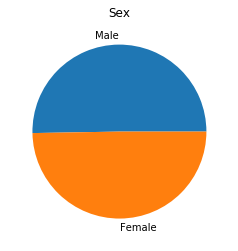

Male      2651
Female    2622
Name: Sex, dtype: int64


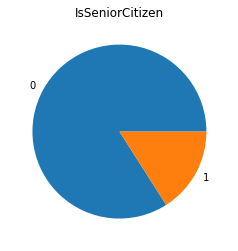

0    4431
1     842
Name: IsSeniorCitizen, dtype: int64


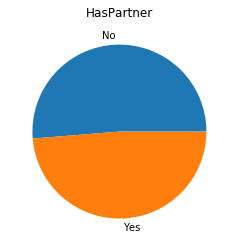

No     2704
Yes    2569
Name: HasPartner, dtype: int64


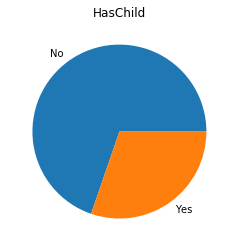

No     3676
Yes    1597
Name: HasChild, dtype: int64


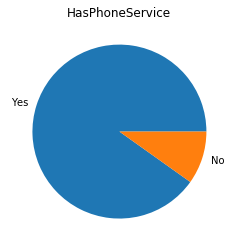

Yes    4754
No      519
Name: HasPhoneService, dtype: int64


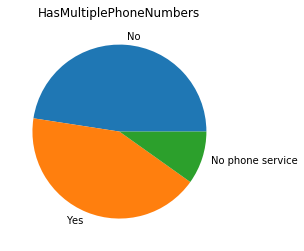

No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64


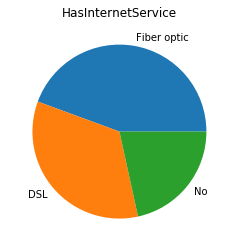

Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64


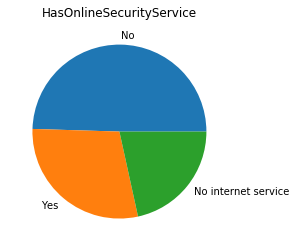

No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64


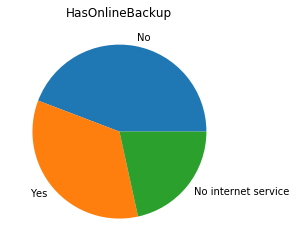

No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64


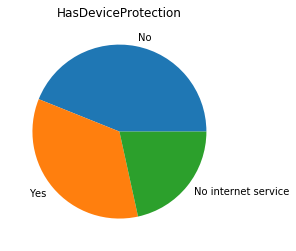

No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64


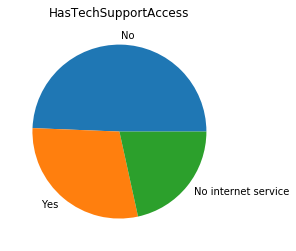

No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: int64


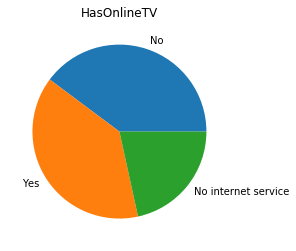

No                     2098
Yes                    2038
No internet service    1137
Name: HasOnlineTV, dtype: int64


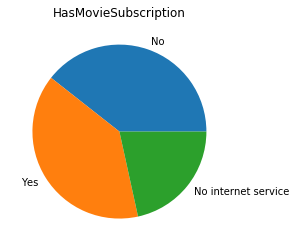

No                     2077
Yes                    2059
No internet service    1137
Name: HasMovieSubscription, dtype: int64


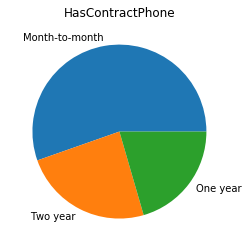

Month-to-month    2920
Two year          1272
One year          1081
Name: HasContractPhone, dtype: int64


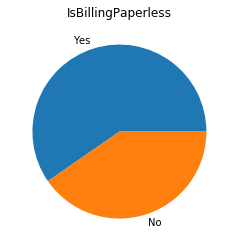

Yes    3145
No     2128
Name: IsBillingPaperless, dtype: int64


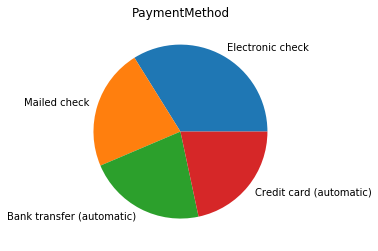

Electronic check             1786
Mailed check                 1188
Bank transfer (automatic)    1157
Credit card (automatic)      1142
Name: PaymentMethod, dtype: int64


In [7]:
data_cat = data[cat_cols]
for col in cat_cols:
    sub_cat = data_cat[col].value_counts()
    plt.pie(sub_cat, labels = list(sub_cat.keys()))
    plt.title(sub_cat.name)
    plt.show()
    print(sub_cat)

Несбалансированными являются классы IsSeniorCitizen, HasChild, HasPhoneService, HasMultiplePhoneNumbers.

<function matplotlib.pyplot.show(*args, **kw)>

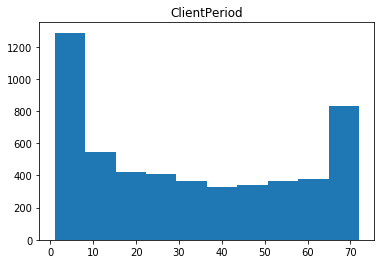

In [8]:
plt.hist(data['ClientPeriod'])
plt.title('ClientPeriod')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

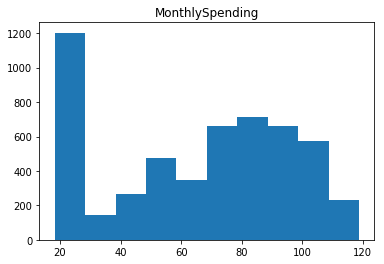

In [9]:
plt.hist(data['MonthlySpending'])
plt.title('MonthlySpending')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

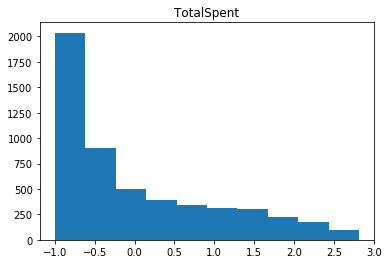

In [35]:
plt.hist(data['TotalSpent'])
plt.title('TotalSpent')
plt.show

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [9]:
#Отнормирование
scaler = StandardScaler()
scaler.fit(data[num_cols])
data[num_cols] = scaler.transform(data[num_cols])
data2 = pd.get_dummies(data)

G:\python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
G:\python\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [36]:
y = data2[data2.columns[-1]].values
X = data2[data2.columns[:-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
#Использование LogisticRegression
log_reg = LogisticRegression(random_state = 0)
search_C = GridSearchCV(log_reg, {'C': [100, 10, 1, 0.1, 0.01, 0.001]}, scoring='roc_auc', cv = 5, n_jobs=-1, verbose=True)
search_C.fit(X_train, y_train)
search_C.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
G:\python\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished
G:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 100}

In [30]:
#Использование LogisticRegressionCV
log_reg_cv_1 = LogisticRegressionCV(Cs = [100, 10, 1, 0.1, 0.01, 0.001], scoring='roc_auc', refit=True, random_state = 0)
log_reg_cv_1.fit(X, y)
log_reg_cv_1.C_

G:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([100.])

LogisticRegressionCV и GridSearchCV выводят один и тот же наилучший параметр C: 100.

In [39]:
different_cs, results = [], []
for g in [100, 10, 1, 0.1, 0.01, 0.001]:
    different_cs.append(g)
    log_reg_with_best_parameter = LogisticRegression(C = g, random_state = 0)
    log_reg_with_best_parameter.fit(X_train, y_train)
    y_pred = log_reg_with_best_parameter.predict_proba(X_test)[:,1]
    results.append(roc_auc_score(y_test, y_pred))
comparison_of_different_cs = pd.DataFrame({'C': different_cs, 'Score': results})
comparison_of_different_cs

G:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\python\lib\site-packages\sklearn\linear_mo

,C,Score
0,100.000,1.000000
1,10.000,1.000000
2,1.000,1.000000
3,0.100,1.000000
4,0.010,0.970582
5,0.001,0.837068


Как видим, лучшее значение, равное 1.0, получается при значениях C: 100, 10, 1, 0.1

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
from catboost import CatBoostClassifier

In [27]:
cbc = CatBoostClassifier(learning_rate = 0.5, iterations = 1)
cbc.fit(X_train, y_train)
y_pred2 = cbc.predict(X_test)
roc_auc_score(y_test, y_pred2)

0:	learn: 0.0407819	total: 142ms	remaining: 0us


1.0

In [103]:
cbc_best_params = GridSearchCV(cbc, {'learning_rate' : [0.1, 0.3, 0.5, 0.7, 0.9], 'iterations': \
                                     [10, 100, 300, 600, 1000]})
cbc_best_params.fit(X, y)
cbc_best_params.best_params_

G:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0:	learn: 0.4256297	total: 10.4ms	remaining: 93.2ms
1:	learn: 0.2761626	total: 20.1ms	remaining: 80.4ms
2:	learn: 0.1581687	total: 25.7ms	remaining: 59.9ms
3:	learn: 0.1011801	total: 32.9ms	remaining: 49.4ms
4:	learn: 0.0683223	total: 39ms	remaining: 39ms
5:	learn: 0.0490216	total: 45.4ms	remaining: 30.2ms
6:	learn: 0.0355751	total: 51.6ms	remaining: 22.1ms
7:	learn: 0.0271179	total: 57.8ms	remaining: 14.4ms
8:	learn: 0.0211687	total: 63.9ms	remaining: 7.1ms
9:	learn: 0.0162223	total: 70.1ms	remaining: 0us
0:	learn: 0.4258081	total: 9.83ms	remaining: 88.4ms
1:	learn: 0.2762229	total: 16.5ms	remaining: 66ms
2:	learn: 0.1582090	total: 20.4ms	remaining: 47.5ms
3:	learn: 0.1012990	total: 26.7ms	remaining: 40ms
4:	learn: 0.0684310	total: 34.2ms	remaining: 34.2ms
5:	learn: 0.0490799	total: 40.4ms	remaining: 26.9ms
6:	learn: 0.0356528	total: 47.4ms	remaining: 20.3ms
7:	learn: 0.0271756	total: 53.9ms	remaining: 13.5ms
8:	learn: 0.0211994	total: 60.3ms	remaining: 6.7ms
9:	learn: 0.0162249	total

29:	learn: 0.0011467	total: 187ms	remaining: 436ms
30:	learn: 0.0010775	total: 195ms	remaining: 434ms
31:	learn: 0.0010219	total: 203ms	remaining: 431ms
32:	learn: 0.0009757	total: 211ms	remaining: 428ms
33:	learn: 0.0009306	total: 218ms	remaining: 422ms
34:	learn: 0.0008815	total: 224ms	remaining: 417ms
35:	learn: 0.0008366	total: 231ms	remaining: 411ms
36:	learn: 0.0007994	total: 237ms	remaining: 404ms
37:	learn: 0.0007671	total: 243ms	remaining: 397ms
38:	learn: 0.0007367	total: 249ms	remaining: 390ms
39:	learn: 0.0007091	total: 255ms	remaining: 383ms
40:	learn: 0.0006832	total: 261ms	remaining: 376ms
41:	learn: 0.0006565	total: 267ms	remaining: 369ms
42:	learn: 0.0006376	total: 273ms	remaining: 362ms
43:	learn: 0.0006189	total: 279ms	remaining: 355ms
44:	learn: 0.0005957	total: 285ms	remaining: 348ms
45:	learn: 0.0005767	total: 290ms	remaining: 341ms
46:	learn: 0.0005566	total: 296ms	remaining: 334ms
47:	learn: 0.0005352	total: 302ms	remaining: 327ms
48:	learn: 0.0005163	total: 308

91:	learn: 0.0003770	total: 544ms	remaining: 47.3ms
92:	learn: 0.0003769	total: 550ms	remaining: 41.4ms
93:	learn: 0.0003769	total: 557ms	remaining: 35.6ms
94:	learn: 0.0003769	total: 564ms	remaining: 29.7ms
95:	learn: 0.0003760	total: 570ms	remaining: 23.7ms
96:	learn: 0.0003760	total: 576ms	remaining: 17.8ms
97:	learn: 0.0003760	total: 581ms	remaining: 11.9ms
98:	learn: 0.0003759	total: 587ms	remaining: 5.93ms
99:	learn: 0.0003758	total: 592ms	remaining: 0us
0:	learn: 0.4255478	total: 5.58ms	remaining: 552ms
1:	learn: 0.2760447	total: 12.4ms	remaining: 609ms
2:	learn: 0.1581209	total: 16.6ms	remaining: 535ms
3:	learn: 0.1011331	total: 22.6ms	remaining: 542ms
4:	learn: 0.0683616	total: 28.9ms	remaining: 548ms
5:	learn: 0.0490704	total: 35.3ms	remaining: 553ms
6:	learn: 0.0356541	total: 41.6ms	remaining: 553ms
7:	learn: 0.0260915	total: 47.9ms	remaining: 551ms
8:	learn: 0.0205633	total: 54.3ms	remaining: 549ms
9:	learn: 0.0157498	total: 60.7ms	remaining: 546ms
10:	learn: 0.0128041	tota

60:	learn: 0.0003377	total: 367ms	remaining: 235ms
61:	learn: 0.0003377	total: 375ms	remaining: 230ms
62:	learn: 0.0003377	total: 383ms	remaining: 225ms
63:	learn: 0.0003377	total: 390ms	remaining: 219ms
64:	learn: 0.0003377	total: 396ms	remaining: 213ms
65:	learn: 0.0003377	total: 401ms	remaining: 207ms
66:	learn: 0.0003377	total: 407ms	remaining: 200ms
67:	learn: 0.0003377	total: 412ms	remaining: 194ms
68:	learn: 0.0003377	total: 417ms	remaining: 188ms
69:	learn: 0.0003377	total: 424ms	remaining: 182ms
70:	learn: 0.0003377	total: 429ms	remaining: 175ms
71:	learn: 0.0003377	total: 434ms	remaining: 169ms
72:	learn: 0.0003377	total: 440ms	remaining: 163ms
73:	learn: 0.0003377	total: 445ms	remaining: 156ms
74:	learn: 0.0003377	total: 451ms	remaining: 150ms
75:	learn: 0.0003377	total: 456ms	remaining: 144ms
76:	learn: 0.0003377	total: 462ms	remaining: 138ms
77:	learn: 0.0003377	total: 467ms	remaining: 132ms
78:	learn: 0.0003377	total: 472ms	remaining: 126ms
79:	learn: 0.0003377	total: 478

28:	learn: 0.0003771	total: 190ms	remaining: 466ms
29:	learn: 0.0003767	total: 198ms	remaining: 461ms
30:	learn: 0.0003766	total: 205ms	remaining: 456ms
31:	learn: 0.0003766	total: 212ms	remaining: 450ms
32:	learn: 0.0003765	total: 218ms	remaining: 443ms
33:	learn: 0.0003765	total: 224ms	remaining: 434ms
34:	learn: 0.0003737	total: 229ms	remaining: 426ms
35:	learn: 0.0003737	total: 235ms	remaining: 418ms
36:	learn: 0.0003737	total: 240ms	remaining: 409ms
37:	learn: 0.0003737	total: 246ms	remaining: 401ms
38:	learn: 0.0003737	total: 252ms	remaining: 395ms
39:	learn: 0.0003737	total: 262ms	remaining: 392ms
40:	learn: 0.0003737	total: 271ms	remaining: 390ms
41:	learn: 0.0003737	total: 278ms	remaining: 384ms
42:	learn: 0.0003737	total: 287ms	remaining: 381ms
43:	learn: 0.0003737	total: 295ms	remaining: 375ms
44:	learn: 0.0003737	total: 302ms	remaining: 370ms
45:	learn: 0.0003737	total: 310ms	remaining: 364ms
46:	learn: 0.0003737	total: 317ms	remaining: 357ms
47:	learn: 0.0003737	total: 324

0:	learn: 0.0429198	total: 9.94ms	remaining: 984ms
1:	learn: 0.0082011	total: 16.7ms	remaining: 817ms
2:	learn: 0.0033665	total: 23.3ms	remaining: 755ms
3:	learn: 0.0019810	total: 29.8ms	remaining: 715ms
4:	learn: 0.0013717	total: 36.9ms	remaining: 701ms
5:	learn: 0.0010295	total: 44ms	remaining: 689ms
6:	learn: 0.0008363	total: 51ms	remaining: 678ms
7:	learn: 0.0006930	total: 58ms	remaining: 667ms
8:	learn: 0.0005982	total: 64.7ms	remaining: 654ms
9:	learn: 0.0005351	total: 73.8ms	remaining: 664ms
10:	learn: 0.0004715	total: 80.7ms	remaining: 653ms
11:	learn: 0.0004206	total: 89.9ms	remaining: 659ms
12:	learn: 0.0004070	total: 97.7ms	remaining: 654ms
13:	learn: 0.0003787	total: 105ms	remaining: 642ms
14:	learn: 0.0003787	total: 111ms	remaining: 628ms
15:	learn: 0.0003787	total: 117ms	remaining: 614ms
16:	learn: 0.0003787	total: 123ms	remaining: 599ms
17:	learn: 0.0003787	total: 128ms	remaining: 584ms
18:	learn: 0.0003787	total: 134ms	remaining: 570ms
19:	learn: 0.0003786	total: 139ms	

88:	learn: 0.0003460	total: 534ms	remaining: 66ms
89:	learn: 0.0003460	total: 541ms	remaining: 60.1ms
90:	learn: 0.0003460	total: 548ms	remaining: 54.2ms
91:	learn: 0.0003460	total: 555ms	remaining: 48.2ms
92:	learn: 0.0003460	total: 561ms	remaining: 42.2ms
93:	learn: 0.0003460	total: 567ms	remaining: 36.2ms
94:	learn: 0.0003460	total: 572ms	remaining: 30.1ms
95:	learn: 0.0003460	total: 578ms	remaining: 24.1ms
96:	learn: 0.0003460	total: 583ms	remaining: 18ms
97:	learn: 0.0003460	total: 589ms	remaining: 12ms
98:	learn: 0.0003460	total: 594ms	remaining: 6ms
99:	learn: 0.0003460	total: 600ms	remaining: 0us
0:	learn: 0.0129011	total: 6.67ms	remaining: 660ms
1:	learn: 0.0021825	total: 12.7ms	remaining: 621ms
2:	learn: 0.0012369	total: 18.9ms	remaining: 612ms
3:	learn: 0.0007739	total: 25.3ms	remaining: 607ms
4:	learn: 0.0005639	total: 31.4ms	remaining: 596ms
5:	learn: 0.0004615	total: 37.3ms	remaining: 584ms
6:	learn: 0.0003924	total: 43.3ms	remaining: 575ms
7:	learn: 0.0003922	total: 48.9

62:	learn: 0.0003706	total: 368ms	remaining: 216ms
63:	learn: 0.0003706	total: 374ms	remaining: 211ms
64:	learn: 0.0003706	total: 381ms	remaining: 205ms
65:	learn: 0.0003706	total: 388ms	remaining: 200ms
66:	learn: 0.0003706	total: 394ms	remaining: 194ms
67:	learn: 0.0003706	total: 400ms	remaining: 188ms
68:	learn: 0.0003706	total: 405ms	remaining: 182ms
69:	learn: 0.0003706	total: 411ms	remaining: 176ms
70:	learn: 0.0003706	total: 416ms	remaining: 170ms
71:	learn: 0.0003706	total: 421ms	remaining: 164ms
72:	learn: 0.0003706	total: 427ms	remaining: 158ms
73:	learn: 0.0003706	total: 432ms	remaining: 152ms
74:	learn: 0.0003706	total: 438ms	remaining: 146ms
75:	learn: 0.0003706	total: 443ms	remaining: 140ms
76:	learn: 0.0003706	total: 448ms	remaining: 134ms
77:	learn: 0.0003706	total: 454ms	remaining: 128ms
78:	learn: 0.0003706	total: 459ms	remaining: 122ms
79:	learn: 0.0003706	total: 465ms	remaining: 116ms
80:	learn: 0.0003706	total: 470ms	remaining: 110ms
81:	learn: 0.0003706	total: 477

31:	learn: 0.0003145	total: 185ms	remaining: 394ms
32:	learn: 0.0003145	total: 193ms	remaining: 392ms
33:	learn: 0.0003135	total: 200ms	remaining: 389ms
34:	learn: 0.0003135	total: 207ms	remaining: 385ms
35:	learn: 0.0003134	total: 213ms	remaining: 379ms
36:	learn: 0.0003132	total: 219ms	remaining: 372ms
37:	learn: 0.0003129	total: 225ms	remaining: 367ms
38:	learn: 0.0003127	total: 231ms	remaining: 361ms
39:	learn: 0.0003118	total: 238ms	remaining: 357ms
40:	learn: 0.0003118	total: 245ms	remaining: 352ms
41:	learn: 0.0003118	total: 250ms	remaining: 345ms
42:	learn: 0.0003118	total: 256ms	remaining: 339ms
43:	learn: 0.0003118	total: 261ms	remaining: 332ms
44:	learn: 0.0003118	total: 266ms	remaining: 326ms
45:	learn: 0.0003118	total: 272ms	remaining: 320ms
46:	learn: 0.0003118	total: 278ms	remaining: 313ms
47:	learn: 0.0003118	total: 284ms	remaining: 308ms
48:	learn: 0.0003118	total: 290ms	remaining: 302ms
49:	learn: 0.0003118	total: 295ms	remaining: 295ms
50:	learn: 0.0003118	total: 301

92:	learn: 0.0003000	total: 542ms	remaining: 40.8ms
93:	learn: 0.0003000	total: 550ms	remaining: 35.1ms
94:	learn: 0.0003000	total: 557ms	remaining: 29.3ms
95:	learn: 0.0003000	total: 564ms	remaining: 23.5ms
96:	learn: 0.0003000	total: 570ms	remaining: 17.6ms
97:	learn: 0.0003000	total: 575ms	remaining: 11.7ms
98:	learn: 0.0003000	total: 581ms	remaining: 5.87ms
99:	learn: 0.0003000	total: 586ms	remaining: 0us
0:	learn: 0.0039311	total: 7.15ms	remaining: 708ms
1:	learn: 0.0009683	total: 13.1ms	remaining: 642ms
2:	learn: 0.0005368	total: 18.9ms	remaining: 611ms
3:	learn: 0.0003886	total: 24.8ms	remaining: 595ms
4:	learn: 0.0003885	total: 30.1ms	remaining: 573ms
5:	learn: 0.0003885	total: 35.6ms	remaining: 557ms
6:	learn: 0.0003885	total: 41ms	remaining: 544ms
7:	learn: 0.0003885	total: 46.5ms	remaining: 534ms
8:	learn: 0.0003884	total: 51.9ms	remaining: 525ms
9:	learn: 0.0003883	total: 57.3ms	remaining: 516ms
10:	learn: 0.0003883	total: 63.3ms	remaining: 512ms
11:	learn: 0.0003855	total:

54:	learn: 0.0004203	total: 370ms	remaining: 1.65s
55:	learn: 0.0004203	total: 377ms	remaining: 1.64s
56:	learn: 0.0004061	total: 385ms	remaining: 1.64s
57:	learn: 0.0004059	total: 391ms	remaining: 1.63s
58:	learn: 0.0003976	total: 398ms	remaining: 1.63s
59:	learn: 0.0003976	total: 404ms	remaining: 1.61s
60:	learn: 0.0003976	total: 409ms	remaining: 1.6s
61:	learn: 0.0003976	total: 415ms	remaining: 1.59s
62:	learn: 0.0003976	total: 420ms	remaining: 1.58s
63:	learn: 0.0003976	total: 426ms	remaining: 1.57s
64:	learn: 0.0003976	total: 431ms	remaining: 1.56s
65:	learn: 0.0003975	total: 437ms	remaining: 1.55s
66:	learn: 0.0003867	total: 443ms	remaining: 1.54s
67:	learn: 0.0003866	total: 448ms	remaining: 1.53s
68:	learn: 0.0003865	total: 454ms	remaining: 1.52s
69:	learn: 0.0003864	total: 459ms	remaining: 1.51s
70:	learn: 0.0003743	total: 465ms	remaining: 1.5s
71:	learn: 0.0003628	total: 471ms	remaining: 1.49s
72:	learn: 0.0003628	total: 477ms	remaining: 1.48s
73:	learn: 0.0003628	total: 482ms

233:	learn: 0.0003473	total: 1.42s	remaining: 400ms
234:	learn: 0.0003472	total: 1.43s	remaining: 394ms
235:	learn: 0.0003472	total: 1.43s	remaining: 389ms
236:	learn: 0.0003472	total: 1.44s	remaining: 383ms
237:	learn: 0.0003471	total: 1.45s	remaining: 377ms
238:	learn: 0.0003471	total: 1.45s	remaining: 371ms
239:	learn: 0.0003471	total: 1.46s	remaining: 364ms
240:	learn: 0.0003471	total: 1.46s	remaining: 358ms
241:	learn: 0.0003471	total: 1.47s	remaining: 352ms
242:	learn: 0.0003471	total: 1.47s	remaining: 346ms
243:	learn: 0.0003471	total: 1.48s	remaining: 340ms
244:	learn: 0.0003471	total: 1.49s	remaining: 334ms
245:	learn: 0.0003471	total: 1.49s	remaining: 327ms
246:	learn: 0.0003471	total: 1.5s	remaining: 321ms
247:	learn: 0.0003471	total: 1.5s	remaining: 315ms
248:	learn: 0.0003471	total: 1.51s	remaining: 309ms
249:	learn: 0.0003470	total: 1.51s	remaining: 303ms
250:	learn: 0.0003470	total: 1.52s	remaining: 297ms
251:	learn: 0.0003470	total: 1.53s	remaining: 291ms
252:	learn: 0.

117:	learn: 0.0003752	total: 711ms	remaining: 1.1s
118:	learn: 0.0003752	total: 717ms	remaining: 1.09s
119:	learn: 0.0003752	total: 725ms	remaining: 1.09s
120:	learn: 0.0003752	total: 732ms	remaining: 1.08s
121:	learn: 0.0003751	total: 738ms	remaining: 1.08s
122:	learn: 0.0003751	total: 744ms	remaining: 1.07s
123:	learn: 0.0003751	total: 750ms	remaining: 1.06s
124:	learn: 0.0003751	total: 755ms	remaining: 1.06s
125:	learn: 0.0003750	total: 761ms	remaining: 1.05s
126:	learn: 0.0003750	total: 767ms	remaining: 1.04s
127:	learn: 0.0003750	total: 773ms	remaining: 1.04s
128:	learn: 0.0003750	total: 778ms	remaining: 1.03s
129:	learn: 0.0003750	total: 784ms	remaining: 1.02s
130:	learn: 0.0003750	total: 789ms	remaining: 1.02s
131:	learn: 0.0003750	total: 795ms	remaining: 1.01s
132:	learn: 0.0003750	total: 800ms	remaining: 1s
133:	learn: 0.0003749	total: 806ms	remaining: 998ms
134:	learn: 0.0003749	total: 811ms	remaining: 992ms
135:	learn: 0.0003749	total: 817ms	remaining: 985ms
136:	learn: 0.00

295:	learn: 0.0003742	total: 1.75s	remaining: 23.7ms
296:	learn: 0.0003742	total: 1.76s	remaining: 17.8ms
297:	learn: 0.0003742	total: 1.77s	remaining: 11.9ms
298:	learn: 0.0003742	total: 1.78s	remaining: 5.95ms
299:	learn: 0.0003742	total: 1.78s	remaining: 0us
0:	learn: 0.4255478	total: 9.26ms	remaining: 2.77s
1:	learn: 0.2760447	total: 15.7ms	remaining: 2.33s
2:	learn: 0.1581209	total: 19.4ms	remaining: 1.92s
3:	learn: 0.1011331	total: 25.5ms	remaining: 1.89s
4:	learn: 0.0683616	total: 31.8ms	remaining: 1.88s
5:	learn: 0.0490704	total: 38.5ms	remaining: 1.89s
6:	learn: 0.0356541	total: 45.6ms	remaining: 1.91s
7:	learn: 0.0260915	total: 52.2ms	remaining: 1.91s
8:	learn: 0.0205633	total: 58.6ms	remaining: 1.89s
9:	learn: 0.0157498	total: 65.9ms	remaining: 1.91s
10:	learn: 0.0128041	total: 74.6ms	remaining: 1.96s
11:	learn: 0.0104079	total: 81.5ms	remaining: 1.96s
12:	learn: 0.0086778	total: 90.1ms	remaining: 1.99s
13:	learn: 0.0067220	total: 94.6ms	remaining: 1.93s
14:	learn: 0.0053252

176:	learn: 0.0003534	total: 1.06s	remaining: 739ms
177:	learn: 0.0003534	total: 1.07s	remaining: 733ms
178:	learn: 0.0003534	total: 1.08s	remaining: 728ms
179:	learn: 0.0003534	total: 1.08s	remaining: 724ms
180:	learn: 0.0003533	total: 1.09s	remaining: 718ms
181:	learn: 0.0003533	total: 1.1s	remaining: 711ms
182:	learn: 0.0003533	total: 1.1s	remaining: 705ms
183:	learn: 0.0003532	total: 1.11s	remaining: 699ms
184:	learn: 0.0003532	total: 1.11s	remaining: 692ms
185:	learn: 0.0003531	total: 1.12s	remaining: 686ms
186:	learn: 0.0003531	total: 1.13s	remaining: 680ms
187:	learn: 0.0003531	total: 1.13s	remaining: 674ms
188:	learn: 0.0003531	total: 1.14s	remaining: 668ms
189:	learn: 0.0003530	total: 1.14s	remaining: 662ms
190:	learn: 0.0003530	total: 1.15s	remaining: 656ms
191:	learn: 0.0003530	total: 1.15s	remaining: 649ms
192:	learn: 0.0003530	total: 1.16s	remaining: 643ms
193:	learn: 0.0003530	total: 1.17s	remaining: 637ms
194:	learn: 0.0003530	total: 1.17s	remaining: 630ms
195:	learn: 0.

59:	learn: 0.0003377	total: 358ms	remaining: 1.43s
60:	learn: 0.0003377	total: 365ms	remaining: 1.43s
61:	learn: 0.0003377	total: 372ms	remaining: 1.43s
62:	learn: 0.0003377	total: 379ms	remaining: 1.43s
63:	learn: 0.0003377	total: 385ms	remaining: 1.42s
64:	learn: 0.0003377	total: 390ms	remaining: 1.41s
65:	learn: 0.0003377	total: 396ms	remaining: 1.4s
66:	learn: 0.0003377	total: 401ms	remaining: 1.4s
67:	learn: 0.0003377	total: 407ms	remaining: 1.39s
68:	learn: 0.0003377	total: 412ms	remaining: 1.38s
69:	learn: 0.0003377	total: 418ms	remaining: 1.37s
70:	learn: 0.0003377	total: 423ms	remaining: 1.36s
71:	learn: 0.0003377	total: 429ms	remaining: 1.36s
72:	learn: 0.0003377	total: 434ms	remaining: 1.35s
73:	learn: 0.0003377	total: 439ms	remaining: 1.34s
74:	learn: 0.0003377	total: 445ms	remaining: 1.33s
75:	learn: 0.0003377	total: 450ms	remaining: 1.33s
76:	learn: 0.0003377	total: 456ms	remaining: 1.32s
77:	learn: 0.0003377	total: 461ms	remaining: 1.31s
78:	learn: 0.0003377	total: 466ms

240:	learn: 0.0003377	total: 1.4s	remaining: 343ms
241:	learn: 0.0003377	total: 1.41s	remaining: 338ms
242:	learn: 0.0003377	total: 1.42s	remaining: 332ms
243:	learn: 0.0003377	total: 1.42s	remaining: 326ms
244:	learn: 0.0003377	total: 1.43s	remaining: 320ms
245:	learn: 0.0003377	total: 1.43s	remaining: 315ms
246:	learn: 0.0003377	total: 1.44s	remaining: 309ms
247:	learn: 0.0003377	total: 1.44s	remaining: 303ms
248:	learn: 0.0003377	total: 1.45s	remaining: 297ms
249:	learn: 0.0003377	total: 1.46s	remaining: 291ms
250:	learn: 0.0003377	total: 1.46s	remaining: 285ms
251:	learn: 0.0003377	total: 1.47s	remaining: 279ms
252:	learn: 0.0003377	total: 1.47s	remaining: 273ms
253:	learn: 0.0003377	total: 1.48s	remaining: 268ms
254:	learn: 0.0003377	total: 1.48s	remaining: 262ms
255:	learn: 0.0003377	total: 1.49s	remaining: 256ms
256:	learn: 0.0003377	total: 1.5s	remaining: 250ms
257:	learn: 0.0003377	total: 1.5s	remaining: 244ms
258:	learn: 0.0003377	total: 1.5s	remaining: 238ms
259:	learn: 0.00

119:	learn: 0.0003420	total: 703ms	remaining: 1.05s
120:	learn: 0.0003420	total: 710ms	remaining: 1.05s
121:	learn: 0.0003420	total: 717ms	remaining: 1.04s
122:	learn: 0.0003420	total: 724ms	remaining: 1.04s
123:	learn: 0.0003420	total: 730ms	remaining: 1.03s
124:	learn: 0.0003420	total: 736ms	remaining: 1.03s
125:	learn: 0.0003420	total: 742ms	remaining: 1.02s
126:	learn: 0.0003420	total: 747ms	remaining: 1.02s
127:	learn: 0.0003420	total: 753ms	remaining: 1.01s
128:	learn: 0.0003420	total: 758ms	remaining: 1s
129:	learn: 0.0003420	total: 763ms	remaining: 998ms
130:	learn: 0.0003420	total: 769ms	remaining: 992ms
131:	learn: 0.0003420	total: 774ms	remaining: 985ms
132:	learn: 0.0003420	total: 780ms	remaining: 979ms
133:	learn: 0.0003420	total: 785ms	remaining: 973ms
134:	learn: 0.0003420	total: 790ms	remaining: 966ms
135:	learn: 0.0003420	total: 796ms	remaining: 960ms
136:	learn: 0.0003420	total: 802ms	remaining: 954ms
137:	learn: 0.0003420	total: 807ms	remaining: 948ms
138:	learn: 0.0

0:	learn: 0.1404932	total: 9.09ms	remaining: 2.72s
1:	learn: 0.0384471	total: 15.4ms	remaining: 2.3s
2:	learn: 0.0153597	total: 21.7ms	remaining: 2.15s
3:	learn: 0.0076101	total: 27.9ms	remaining: 2.07s
4:	learn: 0.0045987	total: 34.5ms	remaining: 2.04s
5:	learn: 0.0031875	total: 41.1ms	remaining: 2.01s
6:	learn: 0.0023676	total: 48ms	remaining: 2.01s
7:	learn: 0.0018607	total: 54.3ms	remaining: 1.98s
8:	learn: 0.0014240	total: 60.6ms	remaining: 1.96s
9:	learn: 0.0012460	total: 66.9ms	remaining: 1.94s
10:	learn: 0.0010214	total: 72.9ms	remaining: 1.92s
11:	learn: 0.0008953	total: 79ms	remaining: 1.9s
12:	learn: 0.0007883	total: 85.1ms	remaining: 1.88s
13:	learn: 0.0007053	total: 91.1ms	remaining: 1.86s
14:	learn: 0.0006207	total: 97ms	remaining: 1.84s
15:	learn: 0.0005678	total: 103ms	remaining: 1.83s
16:	learn: 0.0005105	total: 109ms	remaining: 1.81s
17:	learn: 0.0004692	total: 115ms	remaining: 1.81s
18:	learn: 0.0004365	total: 121ms	remaining: 1.79s
19:	learn: 0.0004223	total: 127ms	

183:	learn: 0.0003737	total: 1.06s	remaining: 671ms
184:	learn: 0.0003737	total: 1.07s	remaining: 666ms
185:	learn: 0.0003737	total: 1.08s	remaining: 661ms
186:	learn: 0.0003737	total: 1.09s	remaining: 657ms
187:	learn: 0.0003737	total: 1.09s	remaining: 651ms
188:	learn: 0.0003737	total: 1.1s	remaining: 645ms
189:	learn: 0.0003737	total: 1.1s	remaining: 639ms
190:	learn: 0.0003737	total: 1.11s	remaining: 633ms
191:	learn: 0.0003737	total: 1.11s	remaining: 627ms
192:	learn: 0.0003737	total: 1.12s	remaining: 621ms
193:	learn: 0.0003737	total: 1.13s	remaining: 615ms
194:	learn: 0.0003737	total: 1.13s	remaining: 610ms
195:	learn: 0.0003737	total: 1.14s	remaining: 604ms
196:	learn: 0.0003737	total: 1.14s	remaining: 598ms
197:	learn: 0.0003737	total: 1.15s	remaining: 592ms
198:	learn: 0.0003737	total: 1.15s	remaining: 586ms
199:	learn: 0.0003737	total: 1.16s	remaining: 580ms
200:	learn: 0.0003737	total: 1.16s	remaining: 574ms
201:	learn: 0.0003737	total: 1.17s	remaining: 568ms
202:	learn: 0.

61:	learn: 0.0003390	total: 371ms	remaining: 1.43s
62:	learn: 0.0003390	total: 378ms	remaining: 1.42s
63:	learn: 0.0003389	total: 385ms	remaining: 1.42s
64:	learn: 0.0003389	total: 392ms	remaining: 1.42s
65:	learn: 0.0003388	total: 398ms	remaining: 1.41s
66:	learn: 0.0003372	total: 404ms	remaining: 1.4s
67:	learn: 0.0003371	total: 409ms	remaining: 1.4s
68:	learn: 0.0003371	total: 415ms	remaining: 1.39s
69:	learn: 0.0003370	total: 421ms	remaining: 1.38s
70:	learn: 0.0003369	total: 426ms	remaining: 1.37s
71:	learn: 0.0003369	total: 432ms	remaining: 1.37s
72:	learn: 0.0003369	total: 437ms	remaining: 1.36s
73:	learn: 0.0003369	total: 444ms	remaining: 1.35s
74:	learn: 0.0003369	total: 451ms	remaining: 1.35s
75:	learn: 0.0003369	total: 458ms	remaining: 1.35s
76:	learn: 0.0003369	total: 463ms	remaining: 1.34s
77:	learn: 0.0003369	total: 469ms	remaining: 1.33s
78:	learn: 0.0003369	total: 474ms	remaining: 1.33s
79:	learn: 0.0003369	total: 480ms	remaining: 1.32s
80:	learn: 0.0003369	total: 485ms

242:	learn: 0.0003369	total: 1.42s	remaining: 333ms
243:	learn: 0.0003369	total: 1.43s	remaining: 327ms
244:	learn: 0.0003369	total: 1.43s	remaining: 322ms
245:	learn: 0.0003369	total: 1.44s	remaining: 316ms
246:	learn: 0.0003369	total: 1.45s	remaining: 311ms
247:	learn: 0.0003369	total: 1.45s	remaining: 305ms
248:	learn: 0.0003369	total: 1.46s	remaining: 299ms
249:	learn: 0.0003369	total: 1.46s	remaining: 293ms
250:	learn: 0.0003369	total: 1.47s	remaining: 287ms
251:	learn: 0.0003369	total: 1.48s	remaining: 281ms
252:	learn: 0.0003369	total: 1.48s	remaining: 275ms
253:	learn: 0.0003369	total: 1.49s	remaining: 269ms
254:	learn: 0.0003369	total: 1.49s	remaining: 263ms
255:	learn: 0.0003369	total: 1.5s	remaining: 257ms
256:	learn: 0.0003369	total: 1.5s	remaining: 251ms
257:	learn: 0.0003369	total: 1.51s	remaining: 245ms
258:	learn: 0.0003369	total: 1.51s	remaining: 240ms
259:	learn: 0.0003369	total: 1.52s	remaining: 234ms
260:	learn: 0.0003369	total: 1.52s	remaining: 228ms
261:	learn: 0.

118:	learn: 0.0003779	total: 713ms	remaining: 1.08s
119:	learn: 0.0003779	total: 720ms	remaining: 1.08s
120:	learn: 0.0003779	total: 727ms	remaining: 1.07s
121:	learn: 0.0003779	total: 734ms	remaining: 1.07s
122:	learn: 0.0003779	total: 740ms	remaining: 1.06s
123:	learn: 0.0003779	total: 746ms	remaining: 1.06s
124:	learn: 0.0003779	total: 752ms	remaining: 1.05s
125:	learn: 0.0003779	total: 757ms	remaining: 1.04s
126:	learn: 0.0003779	total: 762ms	remaining: 1.04s
127:	learn: 0.0003779	total: 768ms	remaining: 1.03s
128:	learn: 0.0003779	total: 774ms	remaining: 1.02s
129:	learn: 0.0003779	total: 779ms	remaining: 1.02s
130:	learn: 0.0003779	total: 785ms	remaining: 1.01s
131:	learn: 0.0003779	total: 790ms	remaining: 1s
132:	learn: 0.0003779	total: 796ms	remaining: 999ms
133:	learn: 0.0003779	total: 801ms	remaining: 992ms
134:	learn: 0.0003779	total: 806ms	remaining: 985ms
135:	learn: 0.0003779	total: 812ms	remaining: 979ms
136:	learn: 0.0003779	total: 817ms	remaining: 972ms
137:	learn: 0.0

299:	learn: 0.0003779	total: 1.76s	remaining: 0us
0:	learn: 0.0427936	total: 7.08ms	remaining: 2.12s
1:	learn: 0.0081797	total: 13.5ms	remaining: 2.01s
2:	learn: 0.0033670	total: 20ms	remaining: 1.98s
3:	learn: 0.0019928	total: 26ms	remaining: 1.92s
4:	learn: 0.0013740	total: 32.5ms	remaining: 1.91s
5:	learn: 0.0010312	total: 38.3ms	remaining: 1.88s
6:	learn: 0.0008400	total: 44.3ms	remaining: 1.85s
7:	learn: 0.0006933	total: 50.2ms	remaining: 1.83s
8:	learn: 0.0005998	total: 55.9ms	remaining: 1.81s
9:	learn: 0.0005357	total: 61.9ms	remaining: 1.79s
10:	learn: 0.0004729	total: 67.8ms	remaining: 1.78s
11:	learn: 0.0004212	total: 73.5ms	remaining: 1.76s
12:	learn: 0.0004152	total: 79.1ms	remaining: 1.75s
13:	learn: 0.0004150	total: 84.6ms	remaining: 1.73s
14:	learn: 0.0004149	total: 90.3ms	remaining: 1.71s
15:	learn: 0.0004149	total: 96.4ms	remaining: 1.71s
16:	learn: 0.0004148	total: 102ms	remaining: 1.7s
17:	learn: 0.0003910	total: 107ms	remaining: 1.68s
18:	learn: 0.0003548	total: 113

185:	learn: 0.0003460	total: 1.08s	remaining: 660ms
186:	learn: 0.0003460	total: 1.08s	remaining: 654ms
187:	learn: 0.0003460	total: 1.09s	remaining: 650ms
188:	learn: 0.0003460	total: 1.1s	remaining: 645ms
189:	learn: 0.0003460	total: 1.1s	remaining: 640ms
190:	learn: 0.0003460	total: 1.11s	remaining: 634ms
191:	learn: 0.0003460	total: 1.12s	remaining: 628ms
192:	learn: 0.0003460	total: 1.12s	remaining: 622ms
193:	learn: 0.0003460	total: 1.13s	remaining: 616ms
194:	learn: 0.0003460	total: 1.13s	remaining: 610ms
195:	learn: 0.0003460	total: 1.14s	remaining: 604ms
196:	learn: 0.0003460	total: 1.14s	remaining: 598ms
197:	learn: 0.0003460	total: 1.15s	remaining: 592ms
198:	learn: 0.0003460	total: 1.15s	remaining: 586ms
199:	learn: 0.0003460	total: 1.16s	remaining: 580ms
200:	learn: 0.0003460	total: 1.17s	remaining: 574ms
201:	learn: 0.0003460	total: 1.17s	remaining: 568ms
202:	learn: 0.0003460	total: 1.18s	remaining: 562ms
203:	learn: 0.0003460	total: 1.18s	remaining: 556ms
204:	learn: 0.

60:	learn: 0.0003902	total: 359ms	remaining: 1.41s
61:	learn: 0.0003902	total: 366ms	remaining: 1.4s
62:	learn: 0.0003902	total: 372ms	remaining: 1.4s
63:	learn: 0.0003902	total: 380ms	remaining: 1.4s
64:	learn: 0.0003902	total: 386ms	remaining: 1.39s
65:	learn: 0.0003902	total: 391ms	remaining: 1.39s
66:	learn: 0.0003902	total: 397ms	remaining: 1.38s
67:	learn: 0.0003902	total: 402ms	remaining: 1.37s
68:	learn: 0.0003902	total: 408ms	remaining: 1.36s
69:	learn: 0.0003902	total: 413ms	remaining: 1.36s
70:	learn: 0.0003902	total: 418ms	remaining: 1.35s
71:	learn: 0.0003902	total: 424ms	remaining: 1.34s
72:	learn: 0.0003902	total: 429ms	remaining: 1.33s
73:	learn: 0.0003902	total: 435ms	remaining: 1.33s
74:	learn: 0.0003902	total: 440ms	remaining: 1.32s
75:	learn: 0.0003902	total: 446ms	remaining: 1.31s
76:	learn: 0.0003902	total: 451ms	remaining: 1.31s
77:	learn: 0.0003902	total: 456ms	remaining: 1.3s
78:	learn: 0.0003902	total: 462ms	remaining: 1.29s
79:	learn: 0.0003902	total: 467ms	r

242:	learn: 0.0003902	total: 1.4s	remaining: 329ms
243:	learn: 0.0003902	total: 1.41s	remaining: 324ms
244:	learn: 0.0003902	total: 1.42s	remaining: 318ms
245:	learn: 0.0003902	total: 1.43s	remaining: 313ms
246:	learn: 0.0003902	total: 1.43s	remaining: 307ms
247:	learn: 0.0003902	total: 1.44s	remaining: 301ms
248:	learn: 0.0003902	total: 1.44s	remaining: 296ms
249:	learn: 0.0003902	total: 1.45s	remaining: 290ms
250:	learn: 0.0003902	total: 1.45s	remaining: 284ms
251:	learn: 0.0003902	total: 1.46s	remaining: 278ms
252:	learn: 0.0003902	total: 1.46s	remaining: 272ms
253:	learn: 0.0003902	total: 1.47s	remaining: 267ms
254:	learn: 0.0003902	total: 1.48s	remaining: 261ms
255:	learn: 0.0003902	total: 1.48s	remaining: 255ms
256:	learn: 0.0003902	total: 1.49s	remaining: 249ms
257:	learn: 0.0003902	total: 1.49s	remaining: 243ms
258:	learn: 0.0003902	total: 1.5s	remaining: 238ms
259:	learn: 0.0003902	total: 1.5s	remaining: 232ms
260:	learn: 0.0003902	total: 1.51s	remaining: 226ms
261:	learn: 0.0

124:	learn: 0.0003706	total: 721ms	remaining: 1.01s
125:	learn: 0.0003706	total: 728ms	remaining: 1s
126:	learn: 0.0003706	total: 735ms	remaining: 1s
127:	learn: 0.0003706	total: 742ms	remaining: 997ms
128:	learn: 0.0003706	total: 749ms	remaining: 992ms
129:	learn: 0.0003706	total: 754ms	remaining: 986ms
130:	learn: 0.0003706	total: 760ms	remaining: 980ms
131:	learn: 0.0003706	total: 765ms	remaining: 974ms
132:	learn: 0.0003706	total: 771ms	remaining: 968ms
133:	learn: 0.0003706	total: 776ms	remaining: 961ms
134:	learn: 0.0003706	total: 781ms	remaining: 955ms
135:	learn: 0.0003706	total: 788ms	remaining: 951ms
136:	learn: 0.0003706	total: 794ms	remaining: 944ms
137:	learn: 0.0003706	total: 799ms	remaining: 938ms
138:	learn: 0.0003706	total: 804ms	remaining: 932ms
139:	learn: 0.0003706	total: 810ms	remaining: 925ms
140:	learn: 0.0003706	total: 815ms	remaining: 919ms
141:	learn: 0.0003706	total: 821ms	remaining: 913ms
142:	learn: 0.0003706	total: 826ms	remaining: 907ms
143:	learn: 0.0003

0:	learn: 0.0128722	total: 9.21ms	remaining: 2.75s
1:	learn: 0.0021785	total: 15.5ms	remaining: 2.32s
2:	learn: 0.0009888	total: 21.8ms	remaining: 2.16s
3:	learn: 0.0006628	total: 28ms	remaining: 2.08s
4:	learn: 0.0004997	total: 34.3ms	remaining: 2.02s
5:	learn: 0.0003983	total: 43.2ms	remaining: 2.12s
6:	learn: 0.0003152	total: 49.4ms	remaining: 2.07s
7:	learn: 0.0003152	total: 55.6ms	remaining: 2.03s
8:	learn: 0.0003151	total: 62ms	remaining: 2s
9:	learn: 0.0003145	total: 67.9ms	remaining: 1.97s
10:	learn: 0.0003145	total: 73.6ms	remaining: 1.93s
11:	learn: 0.0003144	total: 79.9ms	remaining: 1.92s
12:	learn: 0.0003142	total: 85.5ms	remaining: 1.89s
13:	learn: 0.0003141	total: 91.1ms	remaining: 1.86s
14:	learn: 0.0003141	total: 96.8ms	remaining: 1.84s
15:	learn: 0.0003141	total: 102ms	remaining: 1.81s
16:	learn: 0.0003141	total: 108ms	remaining: 1.8s
17:	learn: 0.0003140	total: 114ms	remaining: 1.78s
18:	learn: 0.0003139	total: 120ms	remaining: 1.77s
19:	learn: 0.0003133	total: 127ms	

181:	learn: 0.0003129	total: 1.05s	remaining: 685ms
182:	learn: 0.0003129	total: 1.06s	remaining: 680ms
183:	learn: 0.0003129	total: 1.07s	remaining: 675ms
184:	learn: 0.0003129	total: 1.08s	remaining: 670ms
185:	learn: 0.0003129	total: 1.08s	remaining: 665ms
186:	learn: 0.0003129	total: 1.09s	remaining: 659ms
187:	learn: 0.0003129	total: 1.1s	remaining: 653ms
188:	learn: 0.0003129	total: 1.1s	remaining: 647ms
189:	learn: 0.0003129	total: 1.11s	remaining: 641ms
190:	learn: 0.0003129	total: 1.11s	remaining: 635ms
191:	learn: 0.0003129	total: 1.12s	remaining: 629ms
192:	learn: 0.0003129	total: 1.12s	remaining: 623ms
193:	learn: 0.0003129	total: 1.13s	remaining: 617ms
194:	learn: 0.0003129	total: 1.13s	remaining: 611ms
195:	learn: 0.0003129	total: 1.14s	remaining: 605ms
196:	learn: 0.0003129	total: 1.15s	remaining: 599ms
197:	learn: 0.0003129	total: 1.15s	remaining: 593ms
198:	learn: 0.0003129	total: 1.16s	remaining: 587ms
199:	learn: 0.0003129	total: 1.16s	remaining: 581ms
200:	learn: 0.

62:	learn: 0.0003118	total: 360ms	remaining: 1.35s
63:	learn: 0.0003118	total: 367ms	remaining: 1.35s
64:	learn: 0.0003118	total: 374ms	remaining: 1.35s
65:	learn: 0.0003118	total: 382ms	remaining: 1.35s
66:	learn: 0.0003118	total: 389ms	remaining: 1.35s
67:	learn: 0.0003118	total: 394ms	remaining: 1.34s
68:	learn: 0.0003118	total: 400ms	remaining: 1.34s
69:	learn: 0.0003118	total: 406ms	remaining: 1.33s
70:	learn: 0.0003118	total: 411ms	remaining: 1.32s
71:	learn: 0.0003118	total: 416ms	remaining: 1.32s
72:	learn: 0.0003118	total: 422ms	remaining: 1.31s
73:	learn: 0.0003118	total: 427ms	remaining: 1.3s
74:	learn: 0.0003118	total: 433ms	remaining: 1.3s
75:	learn: 0.0003118	total: 438ms	remaining: 1.29s
76:	learn: 0.0003118	total: 444ms	remaining: 1.28s
77:	learn: 0.0003118	total: 449ms	remaining: 1.28s
78:	learn: 0.0003118	total: 455ms	remaining: 1.27s
79:	learn: 0.0003118	total: 461ms	remaining: 1.27s
80:	learn: 0.0003118	total: 467ms	remaining: 1.26s
81:	learn: 0.0003118	total: 474ms

243:	learn: 0.0003118	total: 1.41s	remaining: 323ms
244:	learn: 0.0003118	total: 1.41s	remaining: 317ms
245:	learn: 0.0003118	total: 1.42s	remaining: 312ms
246:	learn: 0.0003118	total: 1.43s	remaining: 306ms
247:	learn: 0.0003118	total: 1.43s	remaining: 301ms
248:	learn: 0.0003118	total: 1.44s	remaining: 295ms
249:	learn: 0.0003118	total: 1.45s	remaining: 289ms
250:	learn: 0.0003118	total: 1.45s	remaining: 283ms
251:	learn: 0.0003118	total: 1.46s	remaining: 277ms
252:	learn: 0.0003118	total: 1.46s	remaining: 271ms
253:	learn: 0.0003118	total: 1.47s	remaining: 266ms
254:	learn: 0.0003118	total: 1.47s	remaining: 260ms
255:	learn: 0.0003118	total: 1.48s	remaining: 254ms
256:	learn: 0.0003118	total: 1.48s	remaining: 248ms
257:	learn: 0.0003118	total: 1.49s	remaining: 243ms
258:	learn: 0.0003118	total: 1.5s	remaining: 237ms
259:	learn: 0.0003118	total: 1.5s	remaining: 231ms
260:	learn: 0.0003118	total: 1.51s	remaining: 226ms
261:	learn: 0.0003118	total: 1.52s	remaining: 220ms
262:	learn: 0.

121:	learn: 0.0003000	total: 717ms	remaining: 1.04s
122:	learn: 0.0003000	total: 724ms	remaining: 1.04s
123:	learn: 0.0003000	total: 731ms	remaining: 1.04s
124:	learn: 0.0003000	total: 737ms	remaining: 1.03s
125:	learn: 0.0003000	total: 743ms	remaining: 1.03s
126:	learn: 0.0003000	total: 749ms	remaining: 1.02s
127:	learn: 0.0003000	total: 755ms	remaining: 1.01s
128:	learn: 0.0003000	total: 760ms	remaining: 1.01s
129:	learn: 0.0003000	total: 766ms	remaining: 1s
130:	learn: 0.0003000	total: 771ms	remaining: 995ms
131:	learn: 0.0003000	total: 776ms	remaining: 988ms
132:	learn: 0.0003000	total: 782ms	remaining: 981ms
133:	learn: 0.0003000	total: 787ms	remaining: 975ms
134:	learn: 0.0003000	total: 792ms	remaining: 968ms
135:	learn: 0.0003000	total: 798ms	remaining: 962ms
136:	learn: 0.0003000	total: 803ms	remaining: 956ms
137:	learn: 0.0003000	total: 809ms	remaining: 949ms
138:	learn: 0.0003000	total: 814ms	remaining: 943ms
139:	learn: 0.0003000	total: 820ms	remaining: 937ms
140:	learn: 0.0

0:	learn: 0.0039311	total: 11.1ms	remaining: 3.33s
1:	learn: 0.0009683	total: 17.3ms	remaining: 2.58s
2:	learn: 0.0005368	total: 23.2ms	remaining: 2.29s
3:	learn: 0.0003886	total: 28.9ms	remaining: 2.14s
4:	learn: 0.0003885	total: 34.3ms	remaining: 2.02s
5:	learn: 0.0003885	total: 39.7ms	remaining: 1.94s
6:	learn: 0.0003885	total: 45.1ms	remaining: 1.89s
7:	learn: 0.0003885	total: 50.6ms	remaining: 1.85s
8:	learn: 0.0003884	total: 56.2ms	remaining: 1.82s
9:	learn: 0.0003883	total: 61.5ms	remaining: 1.78s
10:	learn: 0.0003883	total: 66.9ms	remaining: 1.76s
11:	learn: 0.0003855	total: 72.4ms	remaining: 1.74s
12:	learn: 0.0003849	total: 77.8ms	remaining: 1.72s
13:	learn: 0.0003846	total: 83ms	remaining: 1.7s
14:	learn: 0.0003846	total: 88.4ms	remaining: 1.68s
15:	learn: 0.0003846	total: 93.6ms	remaining: 1.66s
16:	learn: 0.0003846	total: 99.4ms	remaining: 1.65s
17:	learn: 0.0003846	total: 106ms	remaining: 1.66s
18:	learn: 0.0003846	total: 113ms	remaining: 1.67s
19:	learn: 0.0003846	total:

181:	learn: 0.0003846	total: 1.07s	remaining: 691ms
182:	learn: 0.0003846	total: 1.07s	remaining: 686ms
183:	learn: 0.0003846	total: 1.08s	remaining: 681ms
184:	learn: 0.0003846	total: 1.09s	remaining: 676ms
185:	learn: 0.0003846	total: 1.09s	remaining: 671ms
186:	learn: 0.0003846	total: 1.1s	remaining: 665ms
187:	learn: 0.0003846	total: 1.1s	remaining: 659ms
188:	learn: 0.0003846	total: 1.11s	remaining: 652ms
189:	learn: 0.0003846	total: 1.12s	remaining: 646ms
190:	learn: 0.0003846	total: 1.12s	remaining: 640ms
191:	learn: 0.0003846	total: 1.13s	remaining: 634ms
192:	learn: 0.0003846	total: 1.13s	remaining: 628ms
193:	learn: 0.0003846	total: 1.14s	remaining: 622ms
194:	learn: 0.0003846	total: 1.14s	remaining: 616ms
195:	learn: 0.0003846	total: 1.15s	remaining: 610ms
196:	learn: 0.0003846	total: 1.15s	remaining: 604ms
197:	learn: 0.0003846	total: 1.16s	remaining: 598ms
198:	learn: 0.0003846	total: 1.17s	remaining: 592ms
199:	learn: 0.0003846	total: 1.17s	remaining: 586ms
200:	learn: 0.

60:	learn: 0.0003976	total: 368ms	remaining: 3.25s
61:	learn: 0.0003976	total: 375ms	remaining: 3.25s
62:	learn: 0.0003976	total: 382ms	remaining: 3.26s
63:	learn: 0.0003976	total: 390ms	remaining: 3.26s
64:	learn: 0.0003976	total: 396ms	remaining: 3.26s
65:	learn: 0.0003975	total: 403ms	remaining: 3.26s
66:	learn: 0.0003867	total: 409ms	remaining: 3.25s
67:	learn: 0.0003866	total: 414ms	remaining: 3.24s
68:	learn: 0.0003865	total: 420ms	remaining: 3.23s
69:	learn: 0.0003864	total: 426ms	remaining: 3.22s
70:	learn: 0.0003743	total: 432ms	remaining: 3.22s
71:	learn: 0.0003628	total: 438ms	remaining: 3.21s
72:	learn: 0.0003628	total: 443ms	remaining: 3.2s
73:	learn: 0.0003628	total: 449ms	remaining: 3.19s
74:	learn: 0.0003627	total: 454ms	remaining: 3.18s
75:	learn: 0.0003627	total: 460ms	remaining: 3.17s
76:	learn: 0.0003626	total: 465ms	remaining: 3.16s
77:	learn: 0.0003614	total: 471ms	remaining: 3.15s
78:	learn: 0.0003614	total: 476ms	remaining: 3.14s
79:	learn: 0.0003599	total: 482m

239:	learn: 0.0003471	total: 1.41s	remaining: 2.12s
240:	learn: 0.0003471	total: 1.42s	remaining: 2.12s
241:	learn: 0.0003471	total: 1.43s	remaining: 2.11s
242:	learn: 0.0003471	total: 1.43s	remaining: 2.11s
243:	learn: 0.0003471	total: 1.44s	remaining: 2.1s
244:	learn: 0.0003471	total: 1.45s	remaining: 2.1s
245:	learn: 0.0003471	total: 1.45s	remaining: 2.09s
246:	learn: 0.0003471	total: 1.46s	remaining: 2.08s
247:	learn: 0.0003471	total: 1.46s	remaining: 2.08s
248:	learn: 0.0003471	total: 1.47s	remaining: 2.07s
249:	learn: 0.0003470	total: 1.47s	remaining: 2.06s
250:	learn: 0.0003470	total: 1.48s	remaining: 2.06s
251:	learn: 0.0003470	total: 1.49s	remaining: 2.05s
252:	learn: 0.0003470	total: 1.49s	remaining: 2.04s
253:	learn: 0.0003470	total: 1.5s	remaining: 2.04s
254:	learn: 0.0003470	total: 1.5s	remaining: 2.03s
255:	learn: 0.0003470	total: 1.51s	remaining: 2.03s
256:	learn: 0.0003470	total: 1.51s	remaining: 2.02s
257:	learn: 0.0003470	total: 1.52s	remaining: 2.01s
258:	learn: 0.00

420:	learn: 0.0003441	total: 2.46s	remaining: 1.05s
421:	learn: 0.0003440	total: 2.47s	remaining: 1.04s
422:	learn: 0.0003440	total: 2.48s	remaining: 1.04s
423:	learn: 0.0003440	total: 2.49s	remaining: 1.03s
424:	learn: 0.0003440	total: 2.49s	remaining: 1.03s
425:	learn: 0.0003440	total: 2.5s	remaining: 1.02s
426:	learn: 0.0003440	total: 2.5s	remaining: 1.01s
427:	learn: 0.0003439	total: 2.51s	remaining: 1.01s
428:	learn: 0.0003439	total: 2.52s	remaining: 1s
429:	learn: 0.0003439	total: 2.52s	remaining: 997ms
430:	learn: 0.0003439	total: 2.53s	remaining: 991ms
431:	learn: 0.0003439	total: 2.53s	remaining: 986ms
432:	learn: 0.0003439	total: 2.54s	remaining: 980ms
433:	learn: 0.0003438	total: 2.54s	remaining: 974ms
434:	learn: 0.0003438	total: 2.55s	remaining: 968ms
435:	learn: 0.0003438	total: 2.56s	remaining: 962ms
436:	learn: 0.0003438	total: 2.56s	remaining: 956ms
437:	learn: 0.0003438	total: 2.57s	remaining: 950ms
438:	learn: 0.0003438	total: 2.57s	remaining: 944ms
439:	learn: 0.000

599:	learn: 0.0003435	total: 3.51s	remaining: 0us
0:	learn: 0.4258081	total: 11.5ms	remaining: 6.88s
1:	learn: 0.2762229	total: 17.5ms	remaining: 5.22s
2:	learn: 0.1582090	total: 21.4ms	remaining: 4.26s
3:	learn: 0.1012990	total: 27.2ms	remaining: 4.05s
4:	learn: 0.0684310	total: 33.3ms	remaining: 3.97s
5:	learn: 0.0490799	total: 39.5ms	remaining: 3.91s
6:	learn: 0.0356528	total: 45.7ms	remaining: 3.87s
7:	learn: 0.0271756	total: 52ms	remaining: 3.85s
8:	learn: 0.0211994	total: 58.1ms	remaining: 3.81s
9:	learn: 0.0162249	total: 64.3ms	remaining: 3.79s
10:	learn: 0.0132191	total: 70.4ms	remaining: 3.77s
11:	learn: 0.0107353	total: 76.6ms	remaining: 3.75s
12:	learn: 0.0088827	total: 83.2ms	remaining: 3.75s
13:	learn: 0.0068808	total: 88.7ms	remaining: 3.71s
14:	learn: 0.0054500	total: 93.7ms	remaining: 3.65s
15:	learn: 0.0047444	total: 100ms	remaining: 3.65s
16:	learn: 0.0039872	total: 106ms	remaining: 3.64s
17:	learn: 0.0033017	total: 111ms	remaining: 3.58s
18:	learn: 0.0029682	total: 1

178:	learn: 0.0003745	total: 1.06s	remaining: 2.5s
179:	learn: 0.0003745	total: 1.07s	remaining: 2.5s
180:	learn: 0.0003745	total: 1.08s	remaining: 2.5s
181:	learn: 0.0003745	total: 1.09s	remaining: 2.5s
182:	learn: 0.0003745	total: 1.09s	remaining: 2.49s
183:	learn: 0.0003744	total: 1.1s	remaining: 2.48s
184:	learn: 0.0003744	total: 1.1s	remaining: 2.48s
185:	learn: 0.0003744	total: 1.11s	remaining: 2.47s
186:	learn: 0.0003744	total: 1.11s	remaining: 2.46s
187:	learn: 0.0003744	total: 1.12s	remaining: 2.46s
188:	learn: 0.0003744	total: 1.13s	remaining: 2.45s
189:	learn: 0.0003744	total: 1.13s	remaining: 2.44s
190:	learn: 0.0003744	total: 1.14s	remaining: 2.44s
191:	learn: 0.0003744	total: 1.14s	remaining: 2.43s
192:	learn: 0.0003744	total: 1.15s	remaining: 2.42s
193:	learn: 0.0003744	total: 1.15s	remaining: 2.42s
194:	learn: 0.0003744	total: 1.16s	remaining: 2.41s
195:	learn: 0.0003744	total: 1.17s	remaining: 2.4s
196:	learn: 0.0003744	total: 1.17s	remaining: 2.4s
197:	learn: 0.000374

357:	learn: 0.0003742	total: 2.11s	remaining: 1.43s
358:	learn: 0.0003742	total: 2.12s	remaining: 1.42s
359:	learn: 0.0003742	total: 2.12s	remaining: 1.42s
360:	learn: 0.0003742	total: 2.13s	remaining: 1.41s
361:	learn: 0.0003742	total: 2.14s	remaining: 1.41s
362:	learn: 0.0003742	total: 2.14s	remaining: 1.4s
363:	learn: 0.0003742	total: 2.15s	remaining: 1.39s
364:	learn: 0.0003742	total: 2.15s	remaining: 1.39s
365:	learn: 0.0003742	total: 2.16s	remaining: 1.38s
366:	learn: 0.0003742	total: 2.17s	remaining: 1.38s
367:	learn: 0.0003742	total: 2.17s	remaining: 1.37s
368:	learn: 0.0003742	total: 2.18s	remaining: 1.36s
369:	learn: 0.0003742	total: 2.18s	remaining: 1.36s
370:	learn: 0.0003742	total: 2.19s	remaining: 1.35s
371:	learn: 0.0003742	total: 2.19s	remaining: 1.34s
372:	learn: 0.0003742	total: 2.2s	remaining: 1.34s
373:	learn: 0.0003742	total: 2.2s	remaining: 1.33s
374:	learn: 0.0003742	total: 2.21s	remaining: 1.33s
375:	learn: 0.0003742	total: 2.21s	remaining: 1.32s
376:	learn: 0.0

534:	learn: 0.0003742	total: 3.15s	remaining: 383ms
535:	learn: 0.0003742	total: 3.16s	remaining: 378ms
536:	learn: 0.0003742	total: 3.17s	remaining: 372ms
537:	learn: 0.0003742	total: 3.18s	remaining: 366ms
538:	learn: 0.0003742	total: 3.18s	remaining: 360ms
539:	learn: 0.0003742	total: 3.19s	remaining: 354ms
540:	learn: 0.0003742	total: 3.19s	remaining: 348ms
541:	learn: 0.0003742	total: 3.2s	remaining: 343ms
542:	learn: 0.0003742	total: 3.21s	remaining: 337ms
543:	learn: 0.0003742	total: 3.21s	remaining: 331ms
544:	learn: 0.0003742	total: 3.22s	remaining: 325ms
545:	learn: 0.0003742	total: 3.22s	remaining: 319ms
546:	learn: 0.0003742	total: 3.23s	remaining: 313ms
547:	learn: 0.0003742	total: 3.23s	remaining: 307ms
548:	learn: 0.0003742	total: 3.24s	remaining: 301ms
549:	learn: 0.0003742	total: 3.24s	remaining: 295ms
550:	learn: 0.0003742	total: 3.25s	remaining: 289ms
551:	learn: 0.0003742	total: 3.26s	remaining: 283ms
552:	learn: 0.0003742	total: 3.26s	remaining: 277ms
553:	learn: 0

115:	learn: 0.0003542	total: 712ms	remaining: 2.97s
116:	learn: 0.0003542	total: 719ms	remaining: 2.97s
117:	learn: 0.0003542	total: 726ms	remaining: 2.96s
118:	learn: 0.0003542	total: 733ms	remaining: 2.96s
119:	learn: 0.0003542	total: 740ms	remaining: 2.96s
120:	learn: 0.0003542	total: 746ms	remaining: 2.95s
121:	learn: 0.0003541	total: 752ms	remaining: 2.95s
122:	learn: 0.0003541	total: 758ms	remaining: 2.94s
123:	learn: 0.0003541	total: 763ms	remaining: 2.93s
124:	learn: 0.0003541	total: 769ms	remaining: 2.92s
125:	learn: 0.0003541	total: 774ms	remaining: 2.91s
126:	learn: 0.0003541	total: 780ms	remaining: 2.9s
127:	learn: 0.0003540	total: 785ms	remaining: 2.9s
128:	learn: 0.0003540	total: 791ms	remaining: 2.89s
129:	learn: 0.0003540	total: 797ms	remaining: 2.88s
130:	learn: 0.0003540	total: 802ms	remaining: 2.87s
131:	learn: 0.0003540	total: 808ms	remaining: 2.86s
132:	learn: 0.0003540	total: 813ms	remaining: 2.85s
133:	learn: 0.0003540	total: 819ms	remaining: 2.85s
134:	learn: 0.

294:	learn: 0.0003517	total: 1.76s	remaining: 1.82s
295:	learn: 0.0003517	total: 1.77s	remaining: 1.82s
296:	learn: 0.0003517	total: 1.78s	remaining: 1.81s
297:	learn: 0.0003516	total: 1.78s	remaining: 1.81s
298:	learn: 0.0003516	total: 1.79s	remaining: 1.8s
299:	learn: 0.0003516	total: 1.8s	remaining: 1.8s
300:	learn: 0.0003515	total: 1.8s	remaining: 1.79s
301:	learn: 0.0003515	total: 1.81s	remaining: 1.79s
302:	learn: 0.0003515	total: 1.81s	remaining: 1.78s
303:	learn: 0.0003515	total: 1.82s	remaining: 1.77s
304:	learn: 0.0003515	total: 1.83s	remaining: 1.77s
305:	learn: 0.0003515	total: 1.83s	remaining: 1.76s
306:	learn: 0.0003515	total: 1.84s	remaining: 1.75s
307:	learn: 0.0003515	total: 1.84s	remaining: 1.75s
308:	learn: 0.0003514	total: 1.85s	remaining: 1.74s
309:	learn: 0.0003514	total: 1.85s	remaining: 1.74s
310:	learn: 0.0003514	total: 1.86s	remaining: 1.73s
311:	learn: 0.0003514	total: 1.86s	remaining: 1.72s
312:	learn: 0.0003513	total: 1.87s	remaining: 1.72s
313:	learn: 0.00

472:	learn: 0.0003499	total: 2.81s	remaining: 754ms
473:	learn: 0.0003499	total: 2.81s	remaining: 748ms
474:	learn: 0.0003499	total: 2.82s	remaining: 742ms
475:	learn: 0.0003499	total: 2.83s	remaining: 737ms
476:	learn: 0.0003499	total: 2.83s	remaining: 731ms
477:	learn: 0.0003499	total: 2.84s	remaining: 725ms
478:	learn: 0.0003499	total: 2.85s	remaining: 719ms
479:	learn: 0.0003499	total: 2.85s	remaining: 713ms
480:	learn: 0.0003499	total: 2.86s	remaining: 707ms
481:	learn: 0.0003499	total: 2.86s	remaining: 701ms
482:	learn: 0.0003499	total: 2.87s	remaining: 695ms
483:	learn: 0.0003499	total: 2.87s	remaining: 689ms
484:	learn: 0.0003499	total: 2.88s	remaining: 683ms
485:	learn: 0.0003499	total: 2.88s	remaining: 677ms
486:	learn: 0.0003499	total: 2.89s	remaining: 671ms
487:	learn: 0.0003499	total: 2.9s	remaining: 665ms
488:	learn: 0.0003499	total: 2.9s	remaining: 659ms
489:	learn: 0.0003499	total: 2.91s	remaining: 653ms
490:	learn: 0.0003498	total: 2.91s	remaining: 646ms
491:	learn: 0.

60:	learn: 0.0003377	total: 368ms	remaining: 3.25s
61:	learn: 0.0003377	total: 376ms	remaining: 3.26s
62:	learn: 0.0003377	total: 383ms	remaining: 3.27s
63:	learn: 0.0003377	total: 390ms	remaining: 3.27s
64:	learn: 0.0003377	total: 397ms	remaining: 3.27s
65:	learn: 0.0003377	total: 403ms	remaining: 3.26s
66:	learn: 0.0003377	total: 409ms	remaining: 3.25s
67:	learn: 0.0003377	total: 414ms	remaining: 3.24s
68:	learn: 0.0003377	total: 420ms	remaining: 3.23s
69:	learn: 0.0003377	total: 425ms	remaining: 3.22s
70:	learn: 0.0003377	total: 430ms	remaining: 3.21s
71:	learn: 0.0003377	total: 436ms	remaining: 3.19s
72:	learn: 0.0003377	total: 441ms	remaining: 3.18s
73:	learn: 0.0003377	total: 446ms	remaining: 3.17s
74:	learn: 0.0003377	total: 452ms	remaining: 3.16s
75:	learn: 0.0003377	total: 457ms	remaining: 3.15s
76:	learn: 0.0003377	total: 463ms	remaining: 3.14s
77:	learn: 0.0003377	total: 468ms	remaining: 3.13s
78:	learn: 0.0003377	total: 473ms	remaining: 3.12s
79:	learn: 0.0003377	total: 479

242:	learn: 0.0003377	total: 1.41s	remaining: 2.07s
243:	learn: 0.0003377	total: 1.42s	remaining: 2.07s
244:	learn: 0.0003377	total: 1.42s	remaining: 2.06s
245:	learn: 0.0003377	total: 1.43s	remaining: 2.06s
246:	learn: 0.0003377	total: 1.44s	remaining: 2.06s
247:	learn: 0.0003377	total: 1.45s	remaining: 2.05s
248:	learn: 0.0003377	total: 1.45s	remaining: 2.04s
249:	learn: 0.0003377	total: 1.46s	remaining: 2.04s
250:	learn: 0.0003377	total: 1.46s	remaining: 2.03s
251:	learn: 0.0003377	total: 1.47s	remaining: 2.03s
252:	learn: 0.0003377	total: 1.47s	remaining: 2.02s
253:	learn: 0.0003377	total: 1.48s	remaining: 2.01s
254:	learn: 0.0003377	total: 1.48s	remaining: 2.01s
255:	learn: 0.0003377	total: 1.49s	remaining: 2s
256:	learn: 0.0003377	total: 1.49s	remaining: 1.99s
257:	learn: 0.0003377	total: 1.5s	remaining: 1.99s
258:	learn: 0.0003377	total: 1.5s	remaining: 1.98s
259:	learn: 0.0003377	total: 1.51s	remaining: 1.98s
260:	learn: 0.0003377	total: 1.52s	remaining: 1.97s
261:	learn: 0.000

421:	learn: 0.0003377	total: 2.45s	remaining: 1.03s
422:	learn: 0.0003377	total: 2.46s	remaining: 1.03s
423:	learn: 0.0003377	total: 2.46s	remaining: 1.02s
424:	learn: 0.0003377	total: 2.47s	remaining: 1.02s
425:	learn: 0.0003377	total: 2.48s	remaining: 1.01s
426:	learn: 0.0003377	total: 2.48s	remaining: 1.01s
427:	learn: 0.0003377	total: 2.49s	remaining: 1s
428:	learn: 0.0003377	total: 2.5s	remaining: 995ms
429:	learn: 0.0003377	total: 2.5s	remaining: 989ms
430:	learn: 0.0003377	total: 2.51s	remaining: 984ms
431:	learn: 0.0003377	total: 2.52s	remaining: 978ms
432:	learn: 0.0003377	total: 2.52s	remaining: 972ms
433:	learn: 0.0003377	total: 2.53s	remaining: 966ms
434:	learn: 0.0003377	total: 2.53s	remaining: 961ms
435:	learn: 0.0003377	total: 2.54s	remaining: 955ms
436:	learn: 0.0003377	total: 2.54s	remaining: 949ms
437:	learn: 0.0003377	total: 2.55s	remaining: 943ms
438:	learn: 0.0003377	total: 2.55s	remaining: 937ms
439:	learn: 0.0003377	total: 2.56s	remaining: 931ms
440:	learn: 0.000

597:	learn: 0.0003377	total: 3.47s	remaining: 11.6ms
598:	learn: 0.0003377	total: 3.48s	remaining: 5.81ms
599:	learn: 0.0003377	total: 3.48s	remaining: 0us
0:	learn: 0.1407638	total: 11.9ms	remaining: 7.13s
1:	learn: 0.0385229	total: 24.1ms	remaining: 7.2s
2:	learn: 0.0153627	total: 30.5ms	remaining: 6.08s
3:	learn: 0.0075959	total: 36.9ms	remaining: 5.5s
4:	learn: 0.0045898	total: 43.2ms	remaining: 5.14s
5:	learn: 0.0031842	total: 49.5ms	remaining: 4.9s
6:	learn: 0.0023665	total: 55.8ms	remaining: 4.73s
7:	learn: 0.0018614	total: 62.1ms	remaining: 4.6s
8:	learn: 0.0014244	total: 68.5ms	remaining: 4.5s
9:	learn: 0.0012345	total: 74.4ms	remaining: 4.39s
10:	learn: 0.0010137	total: 81.2ms	remaining: 4.34s
11:	learn: 0.0008895	total: 87ms	remaining: 4.26s
12:	learn: 0.0007909	total: 93.3ms	remaining: 4.21s
13:	learn: 0.0007070	total: 99.7ms	remaining: 4.17s
14:	learn: 0.0006222	total: 106ms	remaining: 4.12s
15:	learn: 0.0005687	total: 111ms	remaining: 4.06s
16:	learn: 0.0005113	total: 117

178:	learn: 0.0003420	total: 1.06s	remaining: 2.48s
179:	learn: 0.0003420	total: 1.06s	remaining: 2.48s
180:	learn: 0.0003420	total: 1.07s	remaining: 2.48s
181:	learn: 0.0003420	total: 1.08s	remaining: 2.47s
182:	learn: 0.0003420	total: 1.08s	remaining: 2.47s
183:	learn: 0.0003420	total: 1.09s	remaining: 2.46s
184:	learn: 0.0003420	total: 1.09s	remaining: 2.46s
185:	learn: 0.0003420	total: 1.1s	remaining: 2.45s
186:	learn: 0.0003420	total: 1.11s	remaining: 2.44s
187:	learn: 0.0003420	total: 1.11s	remaining: 2.44s
188:	learn: 0.0003420	total: 1.12s	remaining: 2.44s
189:	learn: 0.0003420	total: 1.13s	remaining: 2.43s
190:	learn: 0.0003420	total: 1.13s	remaining: 2.43s
191:	learn: 0.0003420	total: 1.14s	remaining: 2.42s
192:	learn: 0.0003420	total: 1.14s	remaining: 2.41s
193:	learn: 0.0003420	total: 1.15s	remaining: 2.41s
194:	learn: 0.0003420	total: 1.16s	remaining: 2.4s
195:	learn: 0.0003420	total: 1.16s	remaining: 2.39s
196:	learn: 0.0003420	total: 1.17s	remaining: 2.39s
197:	learn: 0.

359:	learn: 0.0003420	total: 2.1s	remaining: 1.4s
360:	learn: 0.0003420	total: 2.11s	remaining: 1.4s
361:	learn: 0.0003420	total: 2.12s	remaining: 1.39s
362:	learn: 0.0003420	total: 2.13s	remaining: 1.39s
363:	learn: 0.0003420	total: 2.13s	remaining: 1.38s
364:	learn: 0.0003420	total: 2.14s	remaining: 1.38s
365:	learn: 0.0003420	total: 2.14s	remaining: 1.37s
366:	learn: 0.0003420	total: 2.15s	remaining: 1.36s
367:	learn: 0.0003420	total: 2.15s	remaining: 1.36s
368:	learn: 0.0003420	total: 2.16s	remaining: 1.35s
369:	learn: 0.0003420	total: 2.17s	remaining: 1.35s
370:	learn: 0.0003420	total: 2.17s	remaining: 1.34s
371:	learn: 0.0003420	total: 2.18s	remaining: 1.33s
372:	learn: 0.0003420	total: 2.18s	remaining: 1.33s
373:	learn: 0.0003420	total: 2.19s	remaining: 1.32s
374:	learn: 0.0003420	total: 2.19s	remaining: 1.31s
375:	learn: 0.0003420	total: 2.2s	remaining: 1.31s
376:	learn: 0.0003420	total: 2.2s	remaining: 1.3s
377:	learn: 0.0003420	total: 2.21s	remaining: 1.3s
378:	learn: 0.00034

539:	learn: 0.0003420	total: 3.15s	remaining: 349ms
540:	learn: 0.0003420	total: 3.15s	remaining: 344ms
541:	learn: 0.0003420	total: 3.16s	remaining: 338ms
542:	learn: 0.0003420	total: 3.17s	remaining: 332ms
543:	learn: 0.0003420	total: 3.17s	remaining: 327ms
544:	learn: 0.0003420	total: 3.18s	remaining: 321ms
545:	learn: 0.0003420	total: 3.19s	remaining: 315ms
546:	learn: 0.0003420	total: 3.19s	remaining: 309ms
547:	learn: 0.0003420	total: 3.2s	remaining: 303ms
548:	learn: 0.0003420	total: 3.2s	remaining: 297ms
549:	learn: 0.0003420	total: 3.21s	remaining: 292ms
550:	learn: 0.0003420	total: 3.21s	remaining: 286ms
551:	learn: 0.0003420	total: 3.22s	remaining: 280ms
552:	learn: 0.0003420	total: 3.22s	remaining: 274ms
553:	learn: 0.0003420	total: 3.23s	remaining: 268ms
554:	learn: 0.0003420	total: 3.23s	remaining: 262ms
555:	learn: 0.0003420	total: 3.24s	remaining: 256ms
556:	learn: 0.0003420	total: 3.25s	remaining: 251ms
557:	learn: 0.0003420	total: 3.25s	remaining: 245ms
558:	learn: 0.

118:	learn: 0.0003737	total: 709ms	remaining: 2.87s
119:	learn: 0.0003737	total: 716ms	remaining: 2.86s
120:	learn: 0.0003737	total: 723ms	remaining: 2.86s
121:	learn: 0.0003737	total: 730ms	remaining: 2.86s
122:	learn: 0.0003737	total: 737ms	remaining: 2.86s
123:	learn: 0.0003737	total: 744ms	remaining: 2.86s
124:	learn: 0.0003737	total: 750ms	remaining: 2.85s
125:	learn: 0.0003737	total: 755ms	remaining: 2.84s
126:	learn: 0.0003737	total: 761ms	remaining: 2.83s
127:	learn: 0.0003737	total: 766ms	remaining: 2.82s
128:	learn: 0.0003737	total: 771ms	remaining: 2.82s
129:	learn: 0.0003737	total: 777ms	remaining: 2.81s
130:	learn: 0.0003737	total: 782ms	remaining: 2.8s
131:	learn: 0.0003737	total: 788ms	remaining: 2.79s
132:	learn: 0.0003737	total: 793ms	remaining: 2.78s
133:	learn: 0.0003737	total: 798ms	remaining: 2.78s
134:	learn: 0.0003737	total: 805ms	remaining: 2.77s
135:	learn: 0.0003737	total: 810ms	remaining: 2.76s
136:	learn: 0.0003737	total: 815ms	remaining: 2.75s
137:	learn: 0

287:	learn: 0.0003737	total: 1.69s	remaining: 1.83s
288:	learn: 0.0003737	total: 1.69s	remaining: 1.82s
289:	learn: 0.0003737	total: 1.7s	remaining: 1.82s
290:	learn: 0.0003737	total: 1.71s	remaining: 1.81s
291:	learn: 0.0003737	total: 1.72s	remaining: 1.81s
292:	learn: 0.0003737	total: 1.72s	remaining: 1.8s
293:	learn: 0.0003737	total: 1.73s	remaining: 1.8s
294:	learn: 0.0003737	total: 1.73s	remaining: 1.79s
295:	learn: 0.0003737	total: 1.74s	remaining: 1.79s
296:	learn: 0.0003737	total: 1.74s	remaining: 1.78s
297:	learn: 0.0003737	total: 1.75s	remaining: 1.77s
298:	learn: 0.0003737	total: 1.75s	remaining: 1.77s
299:	learn: 0.0003737	total: 1.76s	remaining: 1.76s
300:	learn: 0.0003737	total: 1.77s	remaining: 1.75s
301:	learn: 0.0003737	total: 1.77s	remaining: 1.75s
302:	learn: 0.0003737	total: 1.78s	remaining: 1.74s
303:	learn: 0.0003737	total: 1.78s	remaining: 1.74s
304:	learn: 0.0003737	total: 1.79s	remaining: 1.73s
305:	learn: 0.0003737	total: 1.79s	remaining: 1.72s
306:	learn: 0.0

463:	learn: 0.0003737	total: 2.74s	remaining: 803ms
464:	learn: 0.0003737	total: 2.74s	remaining: 797ms
465:	learn: 0.0003737	total: 2.75s	remaining: 791ms
466:	learn: 0.0003737	total: 2.76s	remaining: 786ms
467:	learn: 0.0003737	total: 2.76s	remaining: 780ms
468:	learn: 0.0003737	total: 2.77s	remaining: 774ms
469:	learn: 0.0003737	total: 2.77s	remaining: 768ms
470:	learn: 0.0003737	total: 2.78s	remaining: 762ms
471:	learn: 0.0003737	total: 2.79s	remaining: 756ms
472:	learn: 0.0003737	total: 2.79s	remaining: 751ms
473:	learn: 0.0003737	total: 2.8s	remaining: 745ms
474:	learn: 0.0003737	total: 2.81s	remaining: 739ms
475:	learn: 0.0003737	total: 2.81s	remaining: 733ms
476:	learn: 0.0003737	total: 2.82s	remaining: 728ms
477:	learn: 0.0003737	total: 2.83s	remaining: 722ms
478:	learn: 0.0003737	total: 2.84s	remaining: 717ms
479:	learn: 0.0003737	total: 2.84s	remaining: 711ms
480:	learn: 0.0003737	total: 2.85s	remaining: 705ms
481:	learn: 0.0003737	total: 2.85s	remaining: 699ms
482:	learn: 0

32:	learn: 0.0003676	total: 192ms	remaining: 3.3s
33:	learn: 0.0003674	total: 203ms	remaining: 3.38s
34:	learn: 0.0003674	total: 210ms	remaining: 3.4s
35:	learn: 0.0003673	total: 218ms	remaining: 3.42s
36:	learn: 0.0003673	total: 227ms	remaining: 3.45s
37:	learn: 0.0003672	total: 235ms	remaining: 3.47s
38:	learn: 0.0003672	total: 241ms	remaining: 3.46s
39:	learn: 0.0003671	total: 246ms	remaining: 3.45s
40:	learn: 0.0003670	total: 252ms	remaining: 3.43s
41:	learn: 0.0003664	total: 258ms	remaining: 3.42s
42:	learn: 0.0003664	total: 263ms	remaining: 3.41s
43:	learn: 0.0003663	total: 269ms	remaining: 3.4s
44:	learn: 0.0003663	total: 275ms	remaining: 3.39s
45:	learn: 0.0003558	total: 281ms	remaining: 3.38s
46:	learn: 0.0003553	total: 286ms	remaining: 3.37s
47:	learn: 0.0003398	total: 292ms	remaining: 3.35s
48:	learn: 0.0003394	total: 298ms	remaining: 3.35s
49:	learn: 0.0003393	total: 303ms	remaining: 3.33s
50:	learn: 0.0003393	total: 309ms	remaining: 3.32s
51:	learn: 0.0003393	total: 314ms	

208:	learn: 0.0003369	total: 1.24s	remaining: 2.31s
209:	learn: 0.0003369	total: 1.25s	remaining: 2.31s
210:	learn: 0.0003369	total: 1.25s	remaining: 2.31s
211:	learn: 0.0003369	total: 1.26s	remaining: 2.31s
212:	learn: 0.0003369	total: 1.27s	remaining: 2.31s
213:	learn: 0.0003369	total: 1.28s	remaining: 2.31s
214:	learn: 0.0003369	total: 1.28s	remaining: 2.3s
215:	learn: 0.0003369	total: 1.29s	remaining: 2.29s
216:	learn: 0.0003369	total: 1.29s	remaining: 2.29s
217:	learn: 0.0003369	total: 1.3s	remaining: 2.28s
218:	learn: 0.0003369	total: 1.31s	remaining: 2.27s
219:	learn: 0.0003369	total: 1.31s	remaining: 2.27s
220:	learn: 0.0003369	total: 1.32s	remaining: 2.26s
221:	learn: 0.0003369	total: 1.32s	remaining: 2.25s
222:	learn: 0.0003369	total: 1.33s	remaining: 2.25s
223:	learn: 0.0003369	total: 1.33s	remaining: 2.24s
224:	learn: 0.0003369	total: 1.34s	remaining: 2.23s
225:	learn: 0.0003369	total: 1.34s	remaining: 2.23s
226:	learn: 0.0003369	total: 1.35s	remaining: 2.22s
227:	learn: 0.

386:	learn: 0.0003369	total: 2.28s	remaining: 1.26s
387:	learn: 0.0003369	total: 2.29s	remaining: 1.25s
388:	learn: 0.0003369	total: 2.3s	remaining: 1.25s
389:	learn: 0.0003369	total: 2.31s	remaining: 1.24s
390:	learn: 0.0003369	total: 2.31s	remaining: 1.24s
391:	learn: 0.0003369	total: 2.32s	remaining: 1.23s
392:	learn: 0.0003369	total: 2.32s	remaining: 1.22s
393:	learn: 0.0003369	total: 2.33s	remaining: 1.22s
394:	learn: 0.0003369	total: 2.33s	remaining: 1.21s
395:	learn: 0.0003369	total: 2.34s	remaining: 1.21s
396:	learn: 0.0003369	total: 2.35s	remaining: 1.2s
397:	learn: 0.0003369	total: 2.35s	remaining: 1.19s
398:	learn: 0.0003369	total: 2.36s	remaining: 1.19s
399:	learn: 0.0003369	total: 2.36s	remaining: 1.18s
400:	learn: 0.0003369	total: 2.37s	remaining: 1.18s
401:	learn: 0.0003369	total: 2.37s	remaining: 1.17s
402:	learn: 0.0003369	total: 2.38s	remaining: 1.16s
403:	learn: 0.0003369	total: 2.38s	remaining: 1.16s
404:	learn: 0.0003369	total: 2.39s	remaining: 1.15s
405:	learn: 0.

565:	learn: 0.0003369	total: 3.33s	remaining: 200ms
566:	learn: 0.0003369	total: 3.34s	remaining: 194ms
567:	learn: 0.0003369	total: 3.35s	remaining: 188ms
568:	learn: 0.0003369	total: 3.35s	remaining: 183ms
569:	learn: 0.0003369	total: 3.36s	remaining: 177ms
570:	learn: 0.0003369	total: 3.37s	remaining: 171ms
571:	learn: 0.0003369	total: 3.37s	remaining: 165ms
572:	learn: 0.0003369	total: 3.38s	remaining: 159ms
573:	learn: 0.0003369	total: 3.38s	remaining: 153ms
574:	learn: 0.0003369	total: 3.39s	remaining: 147ms
575:	learn: 0.0003369	total: 3.39s	remaining: 141ms
576:	learn: 0.0003369	total: 3.4s	remaining: 135ms
577:	learn: 0.0003369	total: 3.4s	remaining: 130ms
578:	learn: 0.0003369	total: 3.41s	remaining: 124ms
579:	learn: 0.0003369	total: 3.42s	remaining: 118ms
580:	learn: 0.0003369	total: 3.42s	remaining: 112ms
581:	learn: 0.0003369	total: 3.43s	remaining: 106ms
582:	learn: 0.0003369	total: 3.43s	remaining: 100ms
583:	learn: 0.0003369	total: 3.44s	remaining: 94.2ms
584:	learn: 0

151:	learn: 0.0003779	total: 893ms	remaining: 2.63s
152:	learn: 0.0003779	total: 899ms	remaining: 2.63s
153:	learn: 0.0003779	total: 906ms	remaining: 2.62s
154:	learn: 0.0003779	total: 913ms	remaining: 2.62s
155:	learn: 0.0003779	total: 921ms	remaining: 2.62s
156:	learn: 0.0003779	total: 926ms	remaining: 2.61s
157:	learn: 0.0003779	total: 932ms	remaining: 2.61s
158:	learn: 0.0003779	total: 937ms	remaining: 2.6s
159:	learn: 0.0003779	total: 943ms	remaining: 2.59s
160:	learn: 0.0003779	total: 948ms	remaining: 2.59s
161:	learn: 0.0003779	total: 954ms	remaining: 2.58s
162:	learn: 0.0003779	total: 959ms	remaining: 2.57s
163:	learn: 0.0003779	total: 965ms	remaining: 2.56s
164:	learn: 0.0003779	total: 970ms	remaining: 2.56s
165:	learn: 0.0003779	total: 976ms	remaining: 2.55s
166:	learn: 0.0003779	total: 984ms	remaining: 2.55s
167:	learn: 0.0003779	total: 990ms	remaining: 2.54s
168:	learn: 0.0003779	total: 995ms	remaining: 2.54s
169:	learn: 0.0003779	total: 1s	remaining: 2.53s
170:	learn: 0.00

329:	learn: 0.0003779	total: 1.94s	remaining: 1.59s
330:	learn: 0.0003779	total: 1.95s	remaining: 1.58s
331:	learn: 0.0003779	total: 1.95s	remaining: 1.58s
332:	learn: 0.0003779	total: 1.96s	remaining: 1.57s
333:	learn: 0.0003779	total: 1.97s	remaining: 1.57s
334:	learn: 0.0003779	total: 1.97s	remaining: 1.56s
335:	learn: 0.0003779	total: 1.98s	remaining: 1.55s
336:	learn: 0.0003779	total: 1.99s	remaining: 1.55s
337:	learn: 0.0003779	total: 1.99s	remaining: 1.54s
338:	learn: 0.0003779	total: 2s	remaining: 1.54s
339:	learn: 0.0003779	total: 2s	remaining: 1.53s
340:	learn: 0.0003779	total: 2.01s	remaining: 1.52s
341:	learn: 0.0003779	total: 2.01s	remaining: 1.52s
342:	learn: 0.0003779	total: 2.02s	remaining: 1.51s
343:	learn: 0.0003779	total: 2.02s	remaining: 1.51s
344:	learn: 0.0003779	total: 2.03s	remaining: 1.5s
345:	learn: 0.0003779	total: 2.04s	remaining: 1.49s
346:	learn: 0.0003779	total: 2.04s	remaining: 1.49s
347:	learn: 0.0003779	total: 2.04s	remaining: 1.48s
348:	learn: 0.00037

509:	learn: 0.0003777	total: 3s	remaining: 529ms
510:	learn: 0.0003777	total: 3s	remaining: 523ms
511:	learn: 0.0003777	total: 3.01s	remaining: 517ms
512:	learn: 0.0003777	total: 3.01s	remaining: 511ms
513:	learn: 0.0003777	total: 3.02s	remaining: 505ms
514:	learn: 0.0003777	total: 3.02s	remaining: 499ms
515:	learn: 0.0003777	total: 3.03s	remaining: 493ms
516:	learn: 0.0003777	total: 3.04s	remaining: 487ms
517:	learn: 0.0003777	total: 3.04s	remaining: 481ms
518:	learn: 0.0003777	total: 3.05s	remaining: 476ms
519:	learn: 0.0003777	total: 3.05s	remaining: 470ms
520:	learn: 0.0003777	total: 3.06s	remaining: 464ms
521:	learn: 0.0003777	total: 3.06s	remaining: 458ms
522:	learn: 0.0003777	total: 3.07s	remaining: 452ms
523:	learn: 0.0003777	total: 3.08s	remaining: 446ms
524:	learn: 0.0003777	total: 3.08s	remaining: 440ms
525:	learn: 0.0003777	total: 3.09s	remaining: 434ms
526:	learn: 0.0003777	total: 3.09s	remaining: 429ms
527:	learn: 0.0003777	total: 3.1s	remaining: 423ms
528:	learn: 0.00037

88:	learn: 0.0003460	total: 528ms	remaining: 3.03s
89:	learn: 0.0003460	total: 534ms	remaining: 3.03s
90:	learn: 0.0003460	total: 541ms	remaining: 3.02s
91:	learn: 0.0003460	total: 547ms	remaining: 3.02s
92:	learn: 0.0003460	total: 555ms	remaining: 3.02s
93:	learn: 0.0003460	total: 560ms	remaining: 3.02s
94:	learn: 0.0003460	total: 566ms	remaining: 3.01s
95:	learn: 0.0003460	total: 571ms	remaining: 3s
96:	learn: 0.0003460	total: 577ms	remaining: 2.99s
97:	learn: 0.0003460	total: 582ms	remaining: 2.98s
98:	learn: 0.0003460	total: 588ms	remaining: 2.97s
99:	learn: 0.0003460	total: 593ms	remaining: 2.97s
100:	learn: 0.0003460	total: 599ms	remaining: 2.96s
101:	learn: 0.0003460	total: 604ms	remaining: 2.95s
102:	learn: 0.0003460	total: 610ms	remaining: 2.94s
103:	learn: 0.0003460	total: 615ms	remaining: 2.93s
104:	learn: 0.0003460	total: 621ms	remaining: 2.93s
105:	learn: 0.0003460	total: 626ms	remaining: 2.92s
106:	learn: 0.0003460	total: 632ms	remaining: 2.91s
107:	learn: 0.0003460	total

268:	learn: 0.0003460	total: 1.57s	remaining: 1.94s
269:	learn: 0.0003460	total: 1.58s	remaining: 1.93s
270:	learn: 0.0003460	total: 1.59s	remaining: 1.93s
271:	learn: 0.0003460	total: 1.59s	remaining: 1.92s
272:	learn: 0.0003460	total: 1.6s	remaining: 1.92s
273:	learn: 0.0003460	total: 1.61s	remaining: 1.92s
274:	learn: 0.0003460	total: 1.62s	remaining: 1.91s
275:	learn: 0.0003460	total: 1.62s	remaining: 1.91s
276:	learn: 0.0003460	total: 1.63s	remaining: 1.9s
277:	learn: 0.0003460	total: 1.63s	remaining: 1.89s
278:	learn: 0.0003460	total: 1.64s	remaining: 1.89s
279:	learn: 0.0003460	total: 1.65s	remaining: 1.88s
280:	learn: 0.0003460	total: 1.65s	remaining: 1.87s
281:	learn: 0.0003460	total: 1.66s	remaining: 1.87s
282:	learn: 0.0003460	total: 1.66s	remaining: 1.86s
283:	learn: 0.0003460	total: 1.67s	remaining: 1.85s
284:	learn: 0.0003460	total: 1.67s	remaining: 1.85s
285:	learn: 0.0003460	total: 1.68s	remaining: 1.84s
286:	learn: 0.0003460	total: 1.68s	remaining: 1.84s
287:	learn: 0.

446:	learn: 0.0003460	total: 2.62s	remaining: 897ms
447:	learn: 0.0003460	total: 2.63s	remaining: 891ms
448:	learn: 0.0003460	total: 2.63s	remaining: 886ms
449:	learn: 0.0003460	total: 2.64s	remaining: 881ms
450:	learn: 0.0003460	total: 2.65s	remaining: 875ms
451:	learn: 0.0003460	total: 2.65s	remaining: 869ms
452:	learn: 0.0003460	total: 2.66s	remaining: 863ms
453:	learn: 0.0003460	total: 2.67s	remaining: 858ms
454:	learn: 0.0003460	total: 2.67s	remaining: 852ms
455:	learn: 0.0003460	total: 2.68s	remaining: 846ms
456:	learn: 0.0003460	total: 2.68s	remaining: 840ms
457:	learn: 0.0003460	total: 2.69s	remaining: 834ms
458:	learn: 0.0003460	total: 2.69s	remaining: 828ms
459:	learn: 0.0003460	total: 2.7s	remaining: 822ms
460:	learn: 0.0003460	total: 2.71s	remaining: 816ms
461:	learn: 0.0003460	total: 2.71s	remaining: 810ms
462:	learn: 0.0003460	total: 2.72s	remaining: 804ms
463:	learn: 0.0003460	total: 2.72s	remaining: 798ms
464:	learn: 0.0003460	total: 2.73s	remaining: 792ms
465:	learn: 0

31:	learn: 0.0003902	total: 187ms	remaining: 3.33s
32:	learn: 0.0003902	total: 195ms	remaining: 3.35s
33:	learn: 0.0003902	total: 202ms	remaining: 3.37s
34:	learn: 0.0003902	total: 209ms	remaining: 3.38s
35:	learn: 0.0003902	total: 217ms	remaining: 3.39s
36:	learn: 0.0003902	total: 222ms	remaining: 3.38s
37:	learn: 0.0003902	total: 228ms	remaining: 3.37s
38:	learn: 0.0003902	total: 234ms	remaining: 3.36s
39:	learn: 0.0003902	total: 240ms	remaining: 3.35s
40:	learn: 0.0003902	total: 246ms	remaining: 3.35s
41:	learn: 0.0003902	total: 251ms	remaining: 3.33s
42:	learn: 0.0003902	total: 257ms	remaining: 3.32s
43:	learn: 0.0003902	total: 262ms	remaining: 3.31s
44:	learn: 0.0003902	total: 268ms	remaining: 3.31s
45:	learn: 0.0003902	total: 274ms	remaining: 3.3s
46:	learn: 0.0003902	total: 279ms	remaining: 3.28s
47:	learn: 0.0003902	total: 287ms	remaining: 3.29s
48:	learn: 0.0003902	total: 294ms	remaining: 3.3s
49:	learn: 0.0003902	total: 301ms	remaining: 3.31s
50:	learn: 0.0003902	total: 308ms

212:	learn: 0.0003902	total: 1.25s	remaining: 2.27s
213:	learn: 0.0003902	total: 1.25s	remaining: 2.26s
214:	learn: 0.0003902	total: 1.26s	remaining: 2.26s
215:	learn: 0.0003902	total: 1.27s	remaining: 2.25s
216:	learn: 0.0003902	total: 1.27s	remaining: 2.25s
217:	learn: 0.0003902	total: 1.28s	remaining: 2.24s
218:	learn: 0.0003902	total: 1.28s	remaining: 2.23s
219:	learn: 0.0003902	total: 1.29s	remaining: 2.23s
220:	learn: 0.0003902	total: 1.3s	remaining: 2.22s
221:	learn: 0.0003902	total: 1.3s	remaining: 2.22s
222:	learn: 0.0003902	total: 1.31s	remaining: 2.21s
223:	learn: 0.0003902	total: 1.31s	remaining: 2.2s
224:	learn: 0.0003902	total: 1.32s	remaining: 2.2s
225:	learn: 0.0003902	total: 1.32s	remaining: 2.19s
226:	learn: 0.0003902	total: 1.33s	remaining: 2.18s
227:	learn: 0.0003902	total: 1.33s	remaining: 2.18s
228:	learn: 0.0003902	total: 1.34s	remaining: 2.17s
229:	learn: 0.0003902	total: 1.34s	remaining: 2.16s
230:	learn: 0.0003902	total: 1.35s	remaining: 2.16s
231:	learn: 0.00

388:	learn: 0.0003902	total: 2.28s	remaining: 1.24s
389:	learn: 0.0003902	total: 2.28s	remaining: 1.23s
390:	learn: 0.0003902	total: 2.29s	remaining: 1.22s
391:	learn: 0.0003902	total: 2.3s	remaining: 1.22s
392:	learn: 0.0003902	total: 2.31s	remaining: 1.21s
393:	learn: 0.0003902	total: 2.31s	remaining: 1.21s
394:	learn: 0.0003902	total: 2.32s	remaining: 1.2s
395:	learn: 0.0003902	total: 2.32s	remaining: 1.2s
396:	learn: 0.0003902	total: 2.33s	remaining: 1.19s
397:	learn: 0.0003902	total: 2.33s	remaining: 1.18s
398:	learn: 0.0003902	total: 2.34s	remaining: 1.18s
399:	learn: 0.0003902	total: 2.34s	remaining: 1.17s
400:	learn: 0.0003902	total: 2.35s	remaining: 1.17s
401:	learn: 0.0003902	total: 2.35s	remaining: 1.16s
402:	learn: 0.0003902	total: 2.36s	remaining: 1.15s
403:	learn: 0.0003902	total: 2.37s	remaining: 1.15s
404:	learn: 0.0003902	total: 2.37s	remaining: 1.14s
405:	learn: 0.0003902	total: 2.38s	remaining: 1.14s
406:	learn: 0.0003902	total: 2.38s	remaining: 1.13s
407:	learn: 0.0

568:	learn: 0.0003902	total: 3.32s	remaining: 181ms
569:	learn: 0.0003902	total: 3.33s	remaining: 175ms
570:	learn: 0.0003902	total: 3.33s	remaining: 169ms
571:	learn: 0.0003902	total: 3.34s	remaining: 164ms
572:	learn: 0.0003902	total: 3.35s	remaining: 158ms
573:	learn: 0.0003902	total: 3.35s	remaining: 152ms
574:	learn: 0.0003902	total: 3.36s	remaining: 146ms
575:	learn: 0.0003902	total: 3.37s	remaining: 140ms
576:	learn: 0.0003902	total: 3.37s	remaining: 135ms
577:	learn: 0.0003902	total: 3.38s	remaining: 129ms
578:	learn: 0.0003902	total: 3.38s	remaining: 123ms
579:	learn: 0.0003902	total: 3.39s	remaining: 117ms
580:	learn: 0.0003902	total: 3.4s	remaining: 111ms
581:	learn: 0.0003902	total: 3.4s	remaining: 105ms
582:	learn: 0.0003902	total: 3.41s	remaining: 99.4ms
583:	learn: 0.0003902	total: 3.41s	remaining: 93.5ms
584:	learn: 0.0003902	total: 3.42s	remaining: 87.7ms
585:	learn: 0.0003902	total: 3.42s	remaining: 81.8ms
586:	learn: 0.0003902	total: 3.43s	remaining: 76ms
587:	learn:

153:	learn: 0.0003706	total: 890ms	remaining: 2.58s
154:	learn: 0.0003706	total: 897ms	remaining: 2.58s
155:	learn: 0.0003706	total: 904ms	remaining: 2.57s
156:	learn: 0.0003706	total: 911ms	remaining: 2.57s
157:	learn: 0.0003706	total: 918ms	remaining: 2.57s
158:	learn: 0.0003706	total: 925ms	remaining: 2.56s
159:	learn: 0.0003706	total: 930ms	remaining: 2.56s
160:	learn: 0.0003706	total: 936ms	remaining: 2.55s
161:	learn: 0.0003706	total: 941ms	remaining: 2.54s
162:	learn: 0.0003706	total: 947ms	remaining: 2.54s
163:	learn: 0.0003706	total: 954ms	remaining: 2.54s
164:	learn: 0.0003706	total: 960ms	remaining: 2.53s
165:	learn: 0.0003706	total: 965ms	remaining: 2.52s
166:	learn: 0.0003706	total: 971ms	remaining: 2.52s
167:	learn: 0.0003706	total: 976ms	remaining: 2.51s
168:	learn: 0.0003706	total: 982ms	remaining: 2.5s
169:	learn: 0.0003706	total: 987ms	remaining: 2.5s
170:	learn: 0.0003706	total: 993ms	remaining: 2.49s
171:	learn: 0.0003706	total: 998ms	remaining: 2.48s
172:	learn: 0.

335:	learn: 0.0003706	total: 1.94s	remaining: 1.52s
336:	learn: 0.0003706	total: 1.94s	remaining: 1.52s
337:	learn: 0.0003706	total: 1.95s	remaining: 1.51s
338:	learn: 0.0003706	total: 1.96s	remaining: 1.51s
339:	learn: 0.0003706	total: 1.97s	remaining: 1.5s
340:	learn: 0.0003706	total: 1.97s	remaining: 1.5s
341:	learn: 0.0003706	total: 1.98s	remaining: 1.49s
342:	learn: 0.0003706	total: 1.98s	remaining: 1.49s
343:	learn: 0.0003706	total: 1.99s	remaining: 1.48s
344:	learn: 0.0003706	total: 1.99s	remaining: 1.47s
345:	learn: 0.0003706	total: 2s	remaining: 1.47s
346:	learn: 0.0003706	total: 2s	remaining: 1.46s
347:	learn: 0.0003706	total: 2.01s	remaining: 1.46s
348:	learn: 0.0003706	total: 2.02s	remaining: 1.45s
349:	learn: 0.0003706	total: 2.02s	remaining: 1.44s
350:	learn: 0.0003706	total: 2.03s	remaining: 1.44s
351:	learn: 0.0003706	total: 2.03s	remaining: 1.43s
352:	learn: 0.0003706	total: 2.04s	remaining: 1.43s
353:	learn: 0.0003706	total: 2.05s	remaining: 1.42s
354:	learn: 0.000370

515:	learn: 0.0003706	total: 2.98s	remaining: 485ms
516:	learn: 0.0003706	total: 2.99s	remaining: 480ms
517:	learn: 0.0003706	total: 3s	remaining: 474ms
518:	learn: 0.0003706	total: 3s	remaining: 469ms
519:	learn: 0.0003706	total: 3.01s	remaining: 463ms
520:	learn: 0.0003706	total: 3.02s	remaining: 457ms
521:	learn: 0.0003706	total: 3.02s	remaining: 451ms
522:	learn: 0.0003706	total: 3.03s	remaining: 446ms
523:	learn: 0.0003706	total: 3.03s	remaining: 440ms
524:	learn: 0.0003706	total: 3.04s	remaining: 434ms
525:	learn: 0.0003706	total: 3.04s	remaining: 428ms
526:	learn: 0.0003706	total: 3.05s	remaining: 422ms
527:	learn: 0.0003706	total: 3.05s	remaining: 416ms
528:	learn: 0.0003706	total: 3.06s	remaining: 411ms
529:	learn: 0.0003706	total: 3.06s	remaining: 405ms
530:	learn: 0.0003706	total: 3.07s	remaining: 399ms
531:	learn: 0.0003706	total: 3.08s	remaining: 393ms
532:	learn: 0.0003706	total: 3.08s	remaining: 387ms
533:	learn: 0.0003706	total: 3.09s	remaining: 381ms
534:	learn: 0.0003

89:	learn: 0.0003129	total: 533ms	remaining: 3.02s
90:	learn: 0.0003129	total: 540ms	remaining: 3.02s
91:	learn: 0.0003129	total: 547ms	remaining: 3.02s
92:	learn: 0.0003129	total: 555ms	remaining: 3.02s
93:	learn: 0.0003129	total: 562ms	remaining: 3.02s
94:	learn: 0.0003129	total: 567ms	remaining: 3.02s
95:	learn: 0.0003129	total: 573ms	remaining: 3.01s
96:	learn: 0.0003129	total: 579ms	remaining: 3s
97:	learn: 0.0003129	total: 584ms	remaining: 2.99s
98:	learn: 0.0003129	total: 590ms	remaining: 2.98s
99:	learn: 0.0003129	total: 595ms	remaining: 2.98s
100:	learn: 0.0003129	total: 601ms	remaining: 2.97s
101:	learn: 0.0003129	total: 606ms	remaining: 2.96s
102:	learn: 0.0003129	total: 612ms	remaining: 2.95s
103:	learn: 0.0003129	total: 617ms	remaining: 2.94s
104:	learn: 0.0003129	total: 623ms	remaining: 2.94s
105:	learn: 0.0003129	total: 628ms	remaining: 2.93s
106:	learn: 0.0003129	total: 634ms	remaining: 2.92s
107:	learn: 0.0003129	total: 639ms	remaining: 2.91s
108:	learn: 0.0003129	tota

269:	learn: 0.0003129	total: 1.58s	remaining: 1.93s
270:	learn: 0.0003129	total: 1.59s	remaining: 1.93s
271:	learn: 0.0003129	total: 1.6s	remaining: 1.93s
272:	learn: 0.0003129	total: 1.6s	remaining: 1.92s
273:	learn: 0.0003129	total: 1.61s	remaining: 1.92s
274:	learn: 0.0003129	total: 1.62s	remaining: 1.91s
275:	learn: 0.0003129	total: 1.62s	remaining: 1.91s
276:	learn: 0.0003129	total: 1.63s	remaining: 1.9s
277:	learn: 0.0003129	total: 1.64s	remaining: 1.9s
278:	learn: 0.0003129	total: 1.64s	remaining: 1.89s
279:	learn: 0.0003129	total: 1.65s	remaining: 1.89s
280:	learn: 0.0003129	total: 1.66s	remaining: 1.88s
281:	learn: 0.0003129	total: 1.66s	remaining: 1.87s
282:	learn: 0.0003129	total: 1.67s	remaining: 1.87s
283:	learn: 0.0003129	total: 1.67s	remaining: 1.86s
284:	learn: 0.0003129	total: 1.68s	remaining: 1.86s
285:	learn: 0.0003129	total: 1.69s	remaining: 1.85s
286:	learn: 0.0003129	total: 1.69s	remaining: 1.84s
287:	learn: 0.0003129	total: 1.7s	remaining: 1.84s
288:	learn: 0.000

447:	learn: 0.0003129	total: 2.63s	remaining: 891ms
448:	learn: 0.0003129	total: 2.63s	remaining: 886ms
449:	learn: 0.0003129	total: 2.64s	remaining: 880ms
450:	learn: 0.0003129	total: 2.65s	remaining: 875ms
451:	learn: 0.0003129	total: 2.65s	remaining: 869ms
452:	learn: 0.0003129	total: 2.66s	remaining: 864ms
453:	learn: 0.0003129	total: 2.67s	remaining: 858ms
454:	learn: 0.0003129	total: 2.67s	remaining: 852ms
455:	learn: 0.0003129	total: 2.68s	remaining: 846ms
456:	learn: 0.0003129	total: 2.68s	remaining: 840ms
457:	learn: 0.0003129	total: 2.69s	remaining: 834ms
458:	learn: 0.0003129	total: 2.69s	remaining: 828ms
459:	learn: 0.0003129	total: 2.7s	remaining: 822ms
460:	learn: 0.0003129	total: 2.71s	remaining: 816ms
461:	learn: 0.0003129	total: 2.71s	remaining: 810ms
462:	learn: 0.0003129	total: 2.72s	remaining: 804ms
463:	learn: 0.0003129	total: 2.72s	remaining: 798ms
464:	learn: 0.0003129	total: 2.73s	remaining: 792ms
465:	learn: 0.0003129	total: 2.73s	remaining: 786ms
466:	learn: 0

33:	learn: 0.0003135	total: 196ms	remaining: 3.25s
34:	learn: 0.0003135	total: 202ms	remaining: 3.26s
35:	learn: 0.0003134	total: 209ms	remaining: 3.27s
36:	learn: 0.0003132	total: 215ms	remaining: 3.28s
37:	learn: 0.0003129	total: 222ms	remaining: 3.29s
38:	learn: 0.0003127	total: 228ms	remaining: 3.28s
39:	learn: 0.0003118	total: 235ms	remaining: 3.29s
40:	learn: 0.0003118	total: 242ms	remaining: 3.3s
41:	learn: 0.0003118	total: 247ms	remaining: 3.28s
42:	learn: 0.0003118	total: 253ms	remaining: 3.27s
43:	learn: 0.0003118	total: 258ms	remaining: 3.26s
44:	learn: 0.0003118	total: 264ms	remaining: 3.26s
45:	learn: 0.0003118	total: 271ms	remaining: 3.27s
46:	learn: 0.0003118	total: 279ms	remaining: 3.28s
47:	learn: 0.0003118	total: 284ms	remaining: 3.27s
48:	learn: 0.0003118	total: 290ms	remaining: 3.26s
49:	learn: 0.0003118	total: 295ms	remaining: 3.25s
50:	learn: 0.0003118	total: 301ms	remaining: 3.23s
51:	learn: 0.0003118	total: 306ms	remaining: 3.22s
52:	learn: 0.0003118	total: 311m

213:	learn: 0.0003118	total: 1.24s	remaining: 2.23s
214:	learn: 0.0003118	total: 1.25s	remaining: 2.23s
215:	learn: 0.0003118	total: 1.25s	remaining: 2.23s
216:	learn: 0.0003118	total: 1.26s	remaining: 2.22s
217:	learn: 0.0003118	total: 1.27s	remaining: 2.22s
218:	learn: 0.0003118	total: 1.27s	remaining: 2.21s
219:	learn: 0.0003118	total: 1.28s	remaining: 2.21s
220:	learn: 0.0003118	total: 1.28s	remaining: 2.2s
221:	learn: 0.0003118	total: 1.29s	remaining: 2.19s
222:	learn: 0.0003118	total: 1.29s	remaining: 2.19s
223:	learn: 0.0003118	total: 1.3s	remaining: 2.18s
224:	learn: 0.0003118	total: 1.3s	remaining: 2.17s
225:	learn: 0.0003118	total: 1.31s	remaining: 2.17s
226:	learn: 0.0003118	total: 1.31s	remaining: 2.16s
227:	learn: 0.0003118	total: 1.32s	remaining: 2.15s
228:	learn: 0.0003118	total: 1.33s	remaining: 2.15s
229:	learn: 0.0003118	total: 1.33s	remaining: 2.14s
230:	learn: 0.0003118	total: 1.34s	remaining: 2.14s
231:	learn: 0.0003118	total: 1.34s	remaining: 2.13s
232:	learn: 0.0

395:	learn: 0.0003118	total: 2.29s	remaining: 1.18s
396:	learn: 0.0003118	total: 2.29s	remaining: 1.17s
397:	learn: 0.0003118	total: 2.3s	remaining: 1.17s
398:	learn: 0.0003118	total: 2.31s	remaining: 1.16s
399:	learn: 0.0003118	total: 2.31s	remaining: 1.16s
400:	learn: 0.0003118	total: 2.32s	remaining: 1.15s
401:	learn: 0.0003118	total: 2.33s	remaining: 1.15s
402:	learn: 0.0003118	total: 2.33s	remaining: 1.14s
403:	learn: 0.0003118	total: 2.34s	remaining: 1.13s
404:	learn: 0.0003118	total: 2.34s	remaining: 1.13s
405:	learn: 0.0003118	total: 2.35s	remaining: 1.12s
406:	learn: 0.0003118	total: 2.35s	remaining: 1.12s
407:	learn: 0.0003118	total: 2.36s	remaining: 1.11s
408:	learn: 0.0003118	total: 2.37s	remaining: 1.1s
409:	learn: 0.0003118	total: 2.37s	remaining: 1.1s
410:	learn: 0.0003118	total: 2.38s	remaining: 1.09s
411:	learn: 0.0003118	total: 2.38s	remaining: 1.09s
412:	learn: 0.0003118	total: 2.39s	remaining: 1.08s
413:	learn: 0.0003118	total: 2.39s	remaining: 1.07s
414:	learn: 0.0

576:	learn: 0.0003118	total: 3.33s	remaining: 133ms
577:	learn: 0.0003118	total: 3.34s	remaining: 127ms
578:	learn: 0.0003118	total: 3.34s	remaining: 121ms
579:	learn: 0.0003118	total: 3.35s	remaining: 116ms
580:	learn: 0.0003118	total: 3.36s	remaining: 110ms
581:	learn: 0.0003118	total: 3.36s	remaining: 104ms
582:	learn: 0.0003118	total: 3.37s	remaining: 98.3ms
583:	learn: 0.0003118	total: 3.38s	remaining: 92.5ms
584:	learn: 0.0003118	total: 3.38s	remaining: 86.7ms
585:	learn: 0.0003118	total: 3.39s	remaining: 80.9ms
586:	learn: 0.0003118	total: 3.39s	remaining: 75.1ms
587:	learn: 0.0003118	total: 3.4s	remaining: 69.3ms
588:	learn: 0.0003118	total: 3.4s	remaining: 63.5ms
589:	learn: 0.0003118	total: 3.41s	remaining: 57.8ms
590:	learn: 0.0003118	total: 3.41s	remaining: 52ms
591:	learn: 0.0003118	total: 3.42s	remaining: 46.2ms
592:	learn: 0.0003118	total: 3.42s	remaining: 40.4ms
593:	learn: 0.0003118	total: 3.43s	remaining: 34.6ms
594:	learn: 0.0003118	total: 3.43s	remaining: 28.9ms
595

152:	learn: 0.0003000	total: 887ms	remaining: 2.59s
153:	learn: 0.0003000	total: 894ms	remaining: 2.59s
154:	learn: 0.0003000	total: 901ms	remaining: 2.58s
155:	learn: 0.0003000	total: 908ms	remaining: 2.58s
156:	learn: 0.0003000	total: 915ms	remaining: 2.58s
157:	learn: 0.0003000	total: 922ms	remaining: 2.58s
158:	learn: 0.0003000	total: 927ms	remaining: 2.57s
159:	learn: 0.0003000	total: 933ms	remaining: 2.56s
160:	learn: 0.0003000	total: 939ms	remaining: 2.56s
161:	learn: 0.0003000	total: 944ms	remaining: 2.55s
162:	learn: 0.0003000	total: 950ms	remaining: 2.54s
163:	learn: 0.0003000	total: 955ms	remaining: 2.54s
164:	learn: 0.0003000	total: 960ms	remaining: 2.53s
165:	learn: 0.0003000	total: 966ms	remaining: 2.52s
166:	learn: 0.0003000	total: 971ms	remaining: 2.52s
167:	learn: 0.0003000	total: 977ms	remaining: 2.51s
168:	learn: 0.0003000	total: 982ms	remaining: 2.5s
169:	learn: 0.0003000	total: 988ms	remaining: 2.5s
170:	learn: 0.0003000	total: 993ms	remaining: 2.49s
171:	learn: 0.

330:	learn: 0.0003000	total: 1.93s	remaining: 1.57s
331:	learn: 0.0003000	total: 1.94s	remaining: 1.56s
332:	learn: 0.0003000	total: 1.95s	remaining: 1.56s
333:	learn: 0.0003000	total: 1.95s	remaining: 1.55s
334:	learn: 0.0003000	total: 1.96s	remaining: 1.55s
335:	learn: 0.0003000	total: 1.97s	remaining: 1.54s
336:	learn: 0.0003000	total: 1.97s	remaining: 1.54s
337:	learn: 0.0003000	total: 1.98s	remaining: 1.53s
338:	learn: 0.0003000	total: 1.98s	remaining: 1.53s
339:	learn: 0.0003000	total: 1.99s	remaining: 1.52s
340:	learn: 0.0003000	total: 1.99s	remaining: 1.51s
341:	learn: 0.0003000	total: 2s	remaining: 1.51s
342:	learn: 0.0003000	total: 2.01s	remaining: 1.5s
343:	learn: 0.0003000	total: 2.01s	remaining: 1.5s
344:	learn: 0.0003000	total: 2.02s	remaining: 1.49s
345:	learn: 0.0003000	total: 2.02s	remaining: 1.49s
346:	learn: 0.0003000	total: 2.03s	remaining: 1.48s
347:	learn: 0.0003000	total: 2.04s	remaining: 1.47s
348:	learn: 0.0003000	total: 2.04s	remaining: 1.47s
349:	learn: 0.000

509:	learn: 0.0003000	total: 2.97s	remaining: 525ms
510:	learn: 0.0003000	total: 2.98s	remaining: 519ms
511:	learn: 0.0003000	total: 2.99s	remaining: 513ms
512:	learn: 0.0003000	total: 2.99s	remaining: 508ms
513:	learn: 0.0003000	total: 3s	remaining: 502ms
514:	learn: 0.0003000	total: 3.01s	remaining: 496ms
515:	learn: 0.0003000	total: 3.01s	remaining: 490ms
516:	learn: 0.0003000	total: 3.02s	remaining: 485ms
517:	learn: 0.0003000	total: 3.02s	remaining: 479ms
518:	learn: 0.0003000	total: 3.03s	remaining: 473ms
519:	learn: 0.0003000	total: 3.03s	remaining: 467ms
520:	learn: 0.0003000	total: 3.04s	remaining: 461ms
521:	learn: 0.0003000	total: 3.04s	remaining: 455ms
522:	learn: 0.0003000	total: 3.05s	remaining: 449ms
523:	learn: 0.0003000	total: 3.06s	remaining: 443ms
524:	learn: 0.0003000	total: 3.06s	remaining: 437ms
525:	learn: 0.0003000	total: 3.07s	remaining: 431ms
526:	learn: 0.0003000	total: 3.07s	remaining: 426ms
527:	learn: 0.0003000	total: 3.08s	remaining: 420ms
528:	learn: 0.0

82:	learn: 0.0003846	total: 536ms	remaining: 3.34s
83:	learn: 0.0003846	total: 544ms	remaining: 3.34s
84:	learn: 0.0003846	total: 556ms	remaining: 3.37s
85:	learn: 0.0003846	total: 565ms	remaining: 3.37s
86:	learn: 0.0003846	total: 572ms	remaining: 3.38s
87:	learn: 0.0003846	total: 580ms	remaining: 3.37s
88:	learn: 0.0003846	total: 587ms	remaining: 3.37s
89:	learn: 0.0003846	total: 594ms	remaining: 3.37s
90:	learn: 0.0003846	total: 601ms	remaining: 3.36s
91:	learn: 0.0003846	total: 609ms	remaining: 3.36s
92:	learn: 0.0003846	total: 616ms	remaining: 3.36s
93:	learn: 0.0003846	total: 624ms	remaining: 3.36s
94:	learn: 0.0003846	total: 631ms	remaining: 3.36s
95:	learn: 0.0003846	total: 638ms	remaining: 3.35s
96:	learn: 0.0003846	total: 644ms	remaining: 3.34s
97:	learn: 0.0003846	total: 651ms	remaining: 3.33s
98:	learn: 0.0003846	total: 658ms	remaining: 3.33s
99:	learn: 0.0003846	total: 664ms	remaining: 3.32s
100:	learn: 0.0003846	total: 670ms	remaining: 3.31s
101:	learn: 0.0003846	total: 6

258:	learn: 0.0003846	total: 1.58s	remaining: 2.08s
259:	learn: 0.0003846	total: 1.59s	remaining: 2.08s
260:	learn: 0.0003846	total: 1.6s	remaining: 2.07s
261:	learn: 0.0003846	total: 1.6s	remaining: 2.07s
262:	learn: 0.0003846	total: 1.61s	remaining: 2.06s
263:	learn: 0.0003846	total: 1.62s	remaining: 2.06s
264:	learn: 0.0003846	total: 1.62s	remaining: 2.05s
265:	learn: 0.0003846	total: 1.63s	remaining: 2.04s
266:	learn: 0.0003846	total: 1.63s	remaining: 2.04s
267:	learn: 0.0003846	total: 1.64s	remaining: 2.03s
268:	learn: 0.0003846	total: 1.64s	remaining: 2.02s
269:	learn: 0.0003846	total: 1.65s	remaining: 2.02s
270:	learn: 0.0003846	total: 1.66s	remaining: 2.01s
271:	learn: 0.0003846	total: 1.66s	remaining: 2s
272:	learn: 0.0003846	total: 1.67s	remaining: 2s
273:	learn: 0.0003846	total: 1.67s	remaining: 1.99s
274:	learn: 0.0003846	total: 1.68s	remaining: 1.98s
275:	learn: 0.0003846	total: 1.68s	remaining: 1.98s
276:	learn: 0.0003846	total: 1.69s	remaining: 1.97s
277:	learn: 0.000384

439:	learn: 0.0003846	total: 2.63s	remaining: 958ms
440:	learn: 0.0003846	total: 2.64s	remaining: 952ms
441:	learn: 0.0003846	total: 2.65s	remaining: 947ms
442:	learn: 0.0003846	total: 2.65s	remaining: 941ms
443:	learn: 0.0003846	total: 2.66s	remaining: 936ms
444:	learn: 0.0003846	total: 2.67s	remaining: 930ms
445:	learn: 0.0003846	total: 2.67s	remaining: 923ms
446:	learn: 0.0003846	total: 2.68s	remaining: 917ms
447:	learn: 0.0003846	total: 2.69s	remaining: 911ms
448:	learn: 0.0003846	total: 2.69s	remaining: 905ms
449:	learn: 0.0003846	total: 2.7s	remaining: 899ms
450:	learn: 0.0003846	total: 2.7s	remaining: 893ms
451:	learn: 0.0003846	total: 2.71s	remaining: 887ms
452:	learn: 0.0003846	total: 2.71s	remaining: 881ms
453:	learn: 0.0003846	total: 2.72s	remaining: 875ms
454:	learn: 0.0003846	total: 2.73s	remaining: 868ms
455:	learn: 0.0003846	total: 2.73s	remaining: 862ms
456:	learn: 0.0003846	total: 2.74s	remaining: 857ms
457:	learn: 0.0003846	total: 2.74s	remaining: 851ms
458:	learn: 0.

0:	learn: 0.4256297	total: 5.97ms	remaining: 5.97s
1:	learn: 0.2761626	total: 12.3ms	remaining: 6.15s
2:	learn: 0.1581687	total: 16.1ms	remaining: 5.36s
3:	learn: 0.1011801	total: 21.8ms	remaining: 5.42s
4:	learn: 0.0683223	total: 27.6ms	remaining: 5.5s
5:	learn: 0.0490216	total: 33.6ms	remaining: 5.56s
6:	learn: 0.0355751	total: 39.5ms	remaining: 5.6s
7:	learn: 0.0271179	total: 45.5ms	remaining: 5.63s
8:	learn: 0.0211687	total: 51.3ms	remaining: 5.65s
9:	learn: 0.0162223	total: 57.3ms	remaining: 5.67s
10:	learn: 0.0131980	total: 63.2ms	remaining: 5.68s
11:	learn: 0.0107056	total: 69.2ms	remaining: 5.7s
12:	learn: 0.0088510	total: 75.1ms	remaining: 5.7s
13:	learn: 0.0068570	total: 79.5ms	remaining: 5.6s
14:	learn: 0.0054318	total: 83.8ms	remaining: 5.5s
15:	learn: 0.0047347	total: 90.1ms	remaining: 5.54s
16:	learn: 0.0039814	total: 95.9ms	remaining: 5.55s
17:	learn: 0.0033000	total: 100ms	remaining: 5.48s
18:	learn: 0.0029706	total: 106ms	remaining: 5.49s
19:	learn: 0.0026746	total: 11

176:	learn: 0.0003494	total: 1.05s	remaining: 4.9s
177:	learn: 0.0003493	total: 1.06s	remaining: 4.9s
178:	learn: 0.0003493	total: 1.07s	remaining: 4.9s
179:	learn: 0.0003492	total: 1.07s	remaining: 4.9s
180:	learn: 0.0003491	total: 1.08s	remaining: 4.9s
181:	learn: 0.0003491	total: 1.09s	remaining: 4.91s
182:	learn: 0.0003490	total: 1.1s	remaining: 4.9s
183:	learn: 0.0003490	total: 1.1s	remaining: 4.9s
184:	learn: 0.0003490	total: 1.11s	remaining: 4.89s
185:	learn: 0.0003489	total: 1.11s	remaining: 4.88s
186:	learn: 0.0003489	total: 1.12s	remaining: 4.88s
187:	learn: 0.0003489	total: 1.13s	remaining: 4.87s
188:	learn: 0.0003489	total: 1.13s	remaining: 4.86s
189:	learn: 0.0003489	total: 1.14s	remaining: 4.86s
190:	learn: 0.0003489	total: 1.15s	remaining: 4.85s
191:	learn: 0.0003489	total: 1.15s	remaining: 4.84s
192:	learn: 0.0003489	total: 1.16s	remaining: 4.84s
193:	learn: 0.0003488	total: 1.16s	remaining: 4.83s
194:	learn: 0.0003488	total: 1.17s	remaining: 4.83s
195:	learn: 0.0003488

352:	learn: 0.0003457	total: 2.1s	remaining: 3.85s
353:	learn: 0.0003457	total: 2.11s	remaining: 3.85s
354:	learn: 0.0003456	total: 2.12s	remaining: 3.85s
355:	learn: 0.0003456	total: 2.12s	remaining: 3.84s
356:	learn: 0.0003456	total: 2.13s	remaining: 3.84s
357:	learn: 0.0003456	total: 2.14s	remaining: 3.83s
358:	learn: 0.0003456	total: 2.14s	remaining: 3.83s
359:	learn: 0.0003456	total: 2.15s	remaining: 3.82s
360:	learn: 0.0003456	total: 2.15s	remaining: 3.81s
361:	learn: 0.0003456	total: 2.16s	remaining: 3.81s
362:	learn: 0.0003456	total: 2.17s	remaining: 3.81s
363:	learn: 0.0003456	total: 2.17s	remaining: 3.8s
364:	learn: 0.0003456	total: 2.18s	remaining: 3.8s
365:	learn: 0.0003455	total: 2.19s	remaining: 3.79s
366:	learn: 0.0003455	total: 2.2s	remaining: 3.79s
367:	learn: 0.0003455	total: 2.2s	remaining: 3.78s
368:	learn: 0.0003455	total: 2.21s	remaining: 3.77s
369:	learn: 0.0003455	total: 2.21s	remaining: 3.77s
370:	learn: 0.0003455	total: 2.22s	remaining: 3.76s
371:	learn: 0.000

529:	learn: 0.0003436	total: 3.15s	remaining: 2.79s
530:	learn: 0.0003436	total: 3.15s	remaining: 2.79s
531:	learn: 0.0003436	total: 3.16s	remaining: 2.78s
532:	learn: 0.0003436	total: 3.17s	remaining: 2.78s
533:	learn: 0.0003436	total: 3.18s	remaining: 2.77s
534:	learn: 0.0003436	total: 3.19s	remaining: 2.77s
535:	learn: 0.0003436	total: 3.19s	remaining: 2.76s
536:	learn: 0.0003436	total: 3.2s	remaining: 2.76s
537:	learn: 0.0003436	total: 3.2s	remaining: 2.75s
538:	learn: 0.0003436	total: 3.21s	remaining: 2.74s
539:	learn: 0.0003436	total: 3.21s	remaining: 2.74s
540:	learn: 0.0003436	total: 3.22s	remaining: 2.73s
541:	learn: 0.0003436	total: 3.22s	remaining: 2.72s
542:	learn: 0.0003436	total: 3.23s	remaining: 2.72s
543:	learn: 0.0003436	total: 3.23s	remaining: 2.71s
544:	learn: 0.0003436	total: 3.24s	remaining: 2.71s
545:	learn: 0.0003436	total: 3.25s	remaining: 2.7s
546:	learn: 0.0003436	total: 3.25s	remaining: 2.69s
547:	learn: 0.0003436	total: 3.26s	remaining: 2.69s
548:	learn: 0.0

707:	learn: 0.0003429	total: 4.2s	remaining: 1.73s
708:	learn: 0.0003429	total: 4.2s	remaining: 1.72s
709:	learn: 0.0003429	total: 4.21s	remaining: 1.72s
710:	learn: 0.0003429	total: 4.21s	remaining: 1.71s
711:	learn: 0.0003429	total: 4.22s	remaining: 1.71s
712:	learn: 0.0003429	total: 4.23s	remaining: 1.7s
713:	learn: 0.0003429	total: 4.23s	remaining: 1.7s
714:	learn: 0.0003429	total: 4.24s	remaining: 1.69s
715:	learn: 0.0003429	total: 4.25s	remaining: 1.68s
716:	learn: 0.0003429	total: 4.25s	remaining: 1.68s
717:	learn: 0.0003429	total: 4.26s	remaining: 1.67s
718:	learn: 0.0003429	total: 4.26s	remaining: 1.67s
719:	learn: 0.0003429	total: 4.27s	remaining: 1.66s
720:	learn: 0.0003429	total: 4.27s	remaining: 1.65s
721:	learn: 0.0003429	total: 4.28s	remaining: 1.65s
722:	learn: 0.0003429	total: 4.28s	remaining: 1.64s
723:	learn: 0.0003429	total: 4.29s	remaining: 1.64s
724:	learn: 0.0003429	total: 4.29s	remaining: 1.63s
725:	learn: 0.0003429	total: 4.31s	remaining: 1.63s
726:	learn: 0.00

885:	learn: 0.0003422	total: 5.25s	remaining: 675ms
886:	learn: 0.0003422	total: 5.25s	remaining: 669ms
887:	learn: 0.0003422	total: 5.26s	remaining: 663ms
888:	learn: 0.0003422	total: 5.27s	remaining: 658ms
889:	learn: 0.0003422	total: 5.27s	remaining: 652ms
890:	learn: 0.0003422	total: 5.28s	remaining: 646ms
891:	learn: 0.0003422	total: 5.29s	remaining: 640ms
892:	learn: 0.0003422	total: 5.29s	remaining: 634ms
893:	learn: 0.0003422	total: 5.3s	remaining: 628ms
894:	learn: 0.0003422	total: 5.3s	remaining: 622ms
895:	learn: 0.0003422	total: 5.31s	remaining: 616ms
896:	learn: 0.0003422	total: 5.31s	remaining: 610ms
897:	learn: 0.0003422	total: 5.32s	remaining: 604ms
898:	learn: 0.0003422	total: 5.33s	remaining: 598ms
899:	learn: 0.0003422	total: 5.33s	remaining: 592ms
900:	learn: 0.0003422	total: 5.34s	remaining: 586ms
901:	learn: 0.0003422	total: 5.34s	remaining: 580ms
902:	learn: 0.0003422	total: 5.35s	remaining: 574ms
903:	learn: 0.0003422	total: 5.35s	remaining: 568ms
904:	learn: 0.

60:	learn: 0.0003954	total: 364ms	remaining: 5.6s
61:	learn: 0.0003840	total: 371ms	remaining: 5.61s
62:	learn: 0.0003823	total: 378ms	remaining: 5.62s
63:	learn: 0.0003778	total: 386ms	remaining: 5.64s
64:	learn: 0.0003778	total: 393ms	remaining: 5.65s
65:	learn: 0.0003778	total: 399ms	remaining: 5.64s
66:	learn: 0.0003777	total: 405ms	remaining: 5.63s
67:	learn: 0.0003777	total: 410ms	remaining: 5.62s
68:	learn: 0.0003777	total: 416ms	remaining: 5.61s
69:	learn: 0.0003777	total: 421ms	remaining: 5.6s
70:	learn: 0.0003777	total: 427ms	remaining: 5.58s
71:	learn: 0.0003777	total: 432ms	remaining: 5.57s
72:	learn: 0.0003777	total: 438ms	remaining: 5.56s
73:	learn: 0.0003776	total: 443ms	remaining: 5.55s
74:	learn: 0.0003776	total: 449ms	remaining: 5.54s
75:	learn: 0.0003775	total: 454ms	remaining: 5.53s
76:	learn: 0.0003775	total: 460ms	remaining: 5.51s
77:	learn: 0.0003774	total: 466ms	remaining: 5.5s
78:	learn: 0.0003774	total: 471ms	remaining: 5.49s
79:	learn: 0.0003774	total: 477ms	

238:	learn: 0.0003742	total: 1.41s	remaining: 4.5s
239:	learn: 0.0003742	total: 1.42s	remaining: 4.5s
240:	learn: 0.0003742	total: 1.43s	remaining: 4.5s
241:	learn: 0.0003742	total: 1.44s	remaining: 4.5s
242:	learn: 0.0003742	total: 1.45s	remaining: 4.5s
243:	learn: 0.0003742	total: 1.45s	remaining: 4.5s
244:	learn: 0.0003742	total: 1.46s	remaining: 4.5s
245:	learn: 0.0003742	total: 1.47s	remaining: 4.49s
246:	learn: 0.0003742	total: 1.47s	remaining: 4.49s
247:	learn: 0.0003742	total: 1.48s	remaining: 4.48s
248:	learn: 0.0003742	total: 1.48s	remaining: 4.47s
249:	learn: 0.0003742	total: 1.49s	remaining: 4.47s
250:	learn: 0.0003742	total: 1.49s	remaining: 4.46s
251:	learn: 0.0003742	total: 1.5s	remaining: 4.45s
252:	learn: 0.0003742	total: 1.5s	remaining: 4.44s
253:	learn: 0.0003742	total: 1.51s	remaining: 4.44s
254:	learn: 0.0003742	total: 1.52s	remaining: 4.43s
255:	learn: 0.0003742	total: 1.52s	remaining: 4.42s
256:	learn: 0.0003742	total: 1.53s	remaining: 4.42s
257:	learn: 0.0003742

412:	learn: 0.0003742	total: 2.46s	remaining: 3.49s
413:	learn: 0.0003742	total: 2.46s	remaining: 3.49s
414:	learn: 0.0003742	total: 2.47s	remaining: 3.48s
415:	learn: 0.0003742	total: 2.48s	remaining: 3.48s
416:	learn: 0.0003742	total: 2.48s	remaining: 3.48s
417:	learn: 0.0003742	total: 2.49s	remaining: 3.47s
418:	learn: 0.0003742	total: 2.5s	remaining: 3.46s
419:	learn: 0.0003742	total: 2.5s	remaining: 3.46s
420:	learn: 0.0003742	total: 2.51s	remaining: 3.45s
421:	learn: 0.0003742	total: 2.52s	remaining: 3.45s
422:	learn: 0.0003742	total: 2.52s	remaining: 3.44s
423:	learn: 0.0003742	total: 2.53s	remaining: 3.44s
424:	learn: 0.0003742	total: 2.54s	remaining: 3.43s
425:	learn: 0.0003742	total: 2.54s	remaining: 3.42s
426:	learn: 0.0003742	total: 2.55s	remaining: 3.42s
427:	learn: 0.0003742	total: 2.55s	remaining: 3.41s
428:	learn: 0.0003742	total: 2.56s	remaining: 3.4s
429:	learn: 0.0003742	total: 2.56s	remaining: 3.4s
430:	learn: 0.0003742	total: 2.57s	remaining: 3.39s
431:	learn: 0.00

589:	learn: 0.0003742	total: 3.51s	remaining: 2.44s
590:	learn: 0.0003742	total: 3.51s	remaining: 2.43s
591:	learn: 0.0003742	total: 3.52s	remaining: 2.43s
592:	learn: 0.0003742	total: 3.53s	remaining: 2.42s
593:	learn: 0.0003742	total: 3.54s	remaining: 2.42s
594:	learn: 0.0003742	total: 3.54s	remaining: 2.41s
595:	learn: 0.0003742	total: 3.55s	remaining: 2.4s
596:	learn: 0.0003742	total: 3.56s	remaining: 2.4s
597:	learn: 0.0003742	total: 3.56s	remaining: 2.39s
598:	learn: 0.0003742	total: 3.57s	remaining: 2.39s
599:	learn: 0.0003742	total: 3.57s	remaining: 2.38s
600:	learn: 0.0003742	total: 3.58s	remaining: 2.38s
601:	learn: 0.0003742	total: 3.58s	remaining: 2.37s
602:	learn: 0.0003742	total: 3.59s	remaining: 2.36s
603:	learn: 0.0003742	total: 3.6s	remaining: 2.36s
604:	learn: 0.0003742	total: 3.6s	remaining: 2.35s
605:	learn: 0.0003742	total: 3.61s	remaining: 2.35s
606:	learn: 0.0003742	total: 3.61s	remaining: 2.34s
607:	learn: 0.0003742	total: 3.62s	remaining: 2.33s
608:	learn: 0.00

767:	learn: 0.0003742	total: 4.55s	remaining: 1.38s
768:	learn: 0.0003742	total: 4.56s	remaining: 1.37s
769:	learn: 0.0003742	total: 4.57s	remaining: 1.36s
770:	learn: 0.0003742	total: 4.57s	remaining: 1.36s
771:	learn: 0.0003742	total: 4.58s	remaining: 1.35s
772:	learn: 0.0003742	total: 4.59s	remaining: 1.35s
773:	learn: 0.0003742	total: 4.59s	remaining: 1.34s
774:	learn: 0.0003742	total: 4.6s	remaining: 1.33s
775:	learn: 0.0003742	total: 4.6s	remaining: 1.33s
776:	learn: 0.0003742	total: 4.61s	remaining: 1.32s
777:	learn: 0.0003742	total: 4.62s	remaining: 1.32s
778:	learn: 0.0003742	total: 4.62s	remaining: 1.31s
779:	learn: 0.0003742	total: 4.63s	remaining: 1.3s
780:	learn: 0.0003742	total: 4.63s	remaining: 1.3s
781:	learn: 0.0003742	total: 4.64s	remaining: 1.29s
782:	learn: 0.0003742	total: 4.64s	remaining: 1.29s
783:	learn: 0.0003742	total: 4.65s	remaining: 1.28s
784:	learn: 0.0003742	total: 4.65s	remaining: 1.27s
785:	learn: 0.0003742	total: 4.66s	remaining: 1.27s
786:	learn: 0.00

947:	learn: 0.0003742	total: 5.6s	remaining: 307ms
948:	learn: 0.0003742	total: 5.61s	remaining: 301ms
949:	learn: 0.0003742	total: 5.61s	remaining: 295ms
950:	learn: 0.0003742	total: 5.62s	remaining: 290ms
951:	learn: 0.0003742	total: 5.63s	remaining: 284ms
952:	learn: 0.0003742	total: 5.63s	remaining: 278ms
953:	learn: 0.0003742	total: 5.64s	remaining: 272ms
954:	learn: 0.0003742	total: 5.64s	remaining: 266ms
955:	learn: 0.0003742	total: 5.65s	remaining: 260ms
956:	learn: 0.0003742	total: 5.66s	remaining: 254ms
957:	learn: 0.0003742	total: 5.66s	remaining: 248ms
958:	learn: 0.0003742	total: 5.67s	remaining: 242ms
959:	learn: 0.0003742	total: 5.67s	remaining: 236ms
960:	learn: 0.0003742	total: 5.68s	remaining: 230ms
961:	learn: 0.0003742	total: 5.68s	remaining: 224ms
962:	learn: 0.0003742	total: 5.69s	remaining: 219ms
963:	learn: 0.0003742	total: 5.69s	remaining: 213ms
964:	learn: 0.0003742	total: 5.7s	remaining: 207ms
965:	learn: 0.0003742	total: 5.7s	remaining: 201ms
966:	learn: 0.0

117:	learn: 0.0003542	total: 709ms	remaining: 5.29s
118:	learn: 0.0003542	total: 716ms	remaining: 5.3s
119:	learn: 0.0003542	total: 723ms	remaining: 5.3s
120:	learn: 0.0003542	total: 729ms	remaining: 5.3s
121:	learn: 0.0003541	total: 736ms	remaining: 5.3s
122:	learn: 0.0003541	total: 743ms	remaining: 5.3s
123:	learn: 0.0003541	total: 749ms	remaining: 5.29s
124:	learn: 0.0003541	total: 755ms	remaining: 5.28s
125:	learn: 0.0003541	total: 760ms	remaining: 5.27s
126:	learn: 0.0003541	total: 767ms	remaining: 5.27s
127:	learn: 0.0003540	total: 774ms	remaining: 5.28s
128:	learn: 0.0003540	total: 782ms	remaining: 5.28s
129:	learn: 0.0003540	total: 789ms	remaining: 5.28s
130:	learn: 0.0003540	total: 795ms	remaining: 5.27s
131:	learn: 0.0003540	total: 801ms	remaining: 5.26s
132:	learn: 0.0003540	total: 806ms	remaining: 5.25s
133:	learn: 0.0003540	total: 812ms	remaining: 5.25s
134:	learn: 0.0003539	total: 817ms	remaining: 5.24s
135:	learn: 0.0003539	total: 823ms	remaining: 5.23s
136:	learn: 0.000

292:	learn: 0.0003517	total: 1.75s	remaining: 4.24s
293:	learn: 0.0003517	total: 1.76s	remaining: 4.23s
294:	learn: 0.0003517	total: 1.77s	remaining: 4.23s
295:	learn: 0.0003517	total: 1.77s	remaining: 4.22s
296:	learn: 0.0003517	total: 1.78s	remaining: 4.22s
297:	learn: 0.0003516	total: 1.79s	remaining: 4.21s
298:	learn: 0.0003516	total: 1.79s	remaining: 4.21s
299:	learn: 0.0003516	total: 1.8s	remaining: 4.2s
300:	learn: 0.0003515	total: 1.81s	remaining: 4.2s
301:	learn: 0.0003515	total: 1.81s	remaining: 4.19s
302:	learn: 0.0003515	total: 1.82s	remaining: 4.18s
303:	learn: 0.0003515	total: 1.82s	remaining: 4.17s
304:	learn: 0.0003515	total: 1.83s	remaining: 4.17s
305:	learn: 0.0003515	total: 1.83s	remaining: 4.16s
306:	learn: 0.0003515	total: 1.84s	remaining: 4.15s
307:	learn: 0.0003515	total: 1.84s	remaining: 4.15s
308:	learn: 0.0003514	total: 1.85s	remaining: 4.14s
309:	learn: 0.0003514	total: 1.86s	remaining: 4.13s
310:	learn: 0.0003514	total: 1.86s	remaining: 4.13s
311:	learn: 0.0

469:	learn: 0.0003500	total: 2.8s	remaining: 3.16s
470:	learn: 0.0003500	total: 2.81s	remaining: 3.16s
471:	learn: 0.0003500	total: 2.82s	remaining: 3.15s
472:	learn: 0.0003499	total: 2.83s	remaining: 3.15s
473:	learn: 0.0003499	total: 2.83s	remaining: 3.15s
474:	learn: 0.0003499	total: 2.84s	remaining: 3.14s
475:	learn: 0.0003499	total: 2.85s	remaining: 3.13s
476:	learn: 0.0003499	total: 2.85s	remaining: 3.13s
477:	learn: 0.0003499	total: 2.86s	remaining: 3.12s
478:	learn: 0.0003499	total: 2.86s	remaining: 3.11s
479:	learn: 0.0003499	total: 2.87s	remaining: 3.11s
480:	learn: 0.0003499	total: 2.87s	remaining: 3.1s
481:	learn: 0.0003499	total: 2.88s	remaining: 3.1s
482:	learn: 0.0003499	total: 2.88s	remaining: 3.09s
483:	learn: 0.0003499	total: 2.89s	remaining: 3.08s
484:	learn: 0.0003499	total: 2.9s	remaining: 3.08s
485:	learn: 0.0003499	total: 2.9s	remaining: 3.07s
486:	learn: 0.0003499	total: 2.91s	remaining: 3.07s
487:	learn: 0.0003499	total: 2.92s	remaining: 3.06s
488:	learn: 0.000

645:	learn: 0.0003471	total: 3.85s	remaining: 2.11s
646:	learn: 0.0003471	total: 3.86s	remaining: 2.11s
647:	learn: 0.0003471	total: 3.87s	remaining: 2.1s
648:	learn: 0.0003471	total: 3.88s	remaining: 2.1s
649:	learn: 0.0003471	total: 3.88s	remaining: 2.09s
650:	learn: 0.0003471	total: 3.89s	remaining: 2.09s
651:	learn: 0.0003471	total: 3.9s	remaining: 2.08s
652:	learn: 0.0003471	total: 3.9s	remaining: 2.07s
653:	learn: 0.0003471	total: 3.91s	remaining: 2.07s
654:	learn: 0.0003471	total: 3.92s	remaining: 2.06s
655:	learn: 0.0003470	total: 3.92s	remaining: 2.06s
656:	learn: 0.0003470	total: 3.93s	remaining: 2.05s
657:	learn: 0.0003470	total: 3.93s	remaining: 2.04s
658:	learn: 0.0003470	total: 3.94s	remaining: 2.04s
659:	learn: 0.0003470	total: 3.94s	remaining: 2.03s
660:	learn: 0.0003470	total: 3.95s	remaining: 2.02s
661:	learn: 0.0003470	total: 3.95s	remaining: 2.02s
662:	learn: 0.0003470	total: 3.96s	remaining: 2.01s
663:	learn: 0.0003470	total: 3.96s	remaining: 2.01s
664:	learn: 0.00

820:	learn: 0.0003448	total: 4.9s	remaining: 1.07s
821:	learn: 0.0003448	total: 4.91s	remaining: 1.06s
822:	learn: 0.0003448	total: 4.91s	remaining: 1.06s
823:	learn: 0.0003447	total: 4.92s	remaining: 1.05s
824:	learn: 0.0003447	total: 4.93s	remaining: 1.04s
825:	learn: 0.0003447	total: 4.94s	remaining: 1.04s
826:	learn: 0.0003447	total: 4.94s	remaining: 1.03s
827:	learn: 0.0003447	total: 4.95s	remaining: 1.03s
828:	learn: 0.0003447	total: 4.95s	remaining: 1.02s
829:	learn: 0.0003447	total: 4.96s	remaining: 1.01s
830:	learn: 0.0003447	total: 4.96s	remaining: 1.01s
831:	learn: 0.0003447	total: 4.97s	remaining: 1s
832:	learn: 0.0003447	total: 4.98s	remaining: 998ms
833:	learn: 0.0003447	total: 4.98s	remaining: 992ms
834:	learn: 0.0003446	total: 4.99s	remaining: 985ms
835:	learn: 0.0003446	total: 4.99s	remaining: 979ms
836:	learn: 0.0003446	total: 5s	remaining: 973ms
837:	learn: 0.0003446	total: 5s	remaining: 967ms
838:	learn: 0.0003445	total: 5.01s	remaining: 961ms
839:	learn: 0.0003445	

998:	learn: 0.0003419	total: 5.95s	remaining: 5.95ms
999:	learn: 0.0003419	total: 5.95s	remaining: 0us
0:	learn: 0.1406107	total: 9.29ms	remaining: 9.28s
1:	learn: 0.0385286	total: 15.7ms	remaining: 7.84s
2:	learn: 0.0153618	total: 22.1ms	remaining: 7.35s
3:	learn: 0.0076224	total: 28.5ms	remaining: 7.1s
4:	learn: 0.0046045	total: 35ms	remaining: 6.96s
5:	learn: 0.0031987	total: 42.3ms	remaining: 7.01s
6:	learn: 0.0023780	total: 48.9ms	remaining: 6.93s
7:	learn: 0.0018818	total: 55.4ms	remaining: 6.87s
8:	learn: 0.0014361	total: 61.8ms	remaining: 6.8s
9:	learn: 0.0012435	total: 68.1ms	remaining: 6.74s
10:	learn: 0.0010189	total: 74.4ms	remaining: 6.69s
11:	learn: 0.0008924	total: 80.9ms	remaining: 6.66s
12:	learn: 0.0007853	total: 87ms	remaining: 6.6s
13:	learn: 0.0006829	total: 92.9ms	remaining: 6.54s
14:	learn: 0.0006033	total: 99ms	remaining: 6.5s
15:	learn: 0.0005513	total: 105ms	remaining: 6.46s
16:	learn: 0.0004972	total: 111ms	remaining: 6.41s
17:	learn: 0.0004593	total: 116ms	r

177:	learn: 0.0003377	total: 1.06s	remaining: 4.91s
178:	learn: 0.0003377	total: 1.07s	remaining: 4.91s
179:	learn: 0.0003377	total: 1.08s	remaining: 4.91s
180:	learn: 0.0003377	total: 1.08s	remaining: 4.91s
181:	learn: 0.0003377	total: 1.09s	remaining: 4.92s
182:	learn: 0.0003377	total: 1.1s	remaining: 4.92s
183:	learn: 0.0003377	total: 1.11s	remaining: 4.93s
184:	learn: 0.0003377	total: 1.12s	remaining: 4.92s
185:	learn: 0.0003377	total: 1.12s	remaining: 4.91s
186:	learn: 0.0003377	total: 1.13s	remaining: 4.91s
187:	learn: 0.0003377	total: 1.13s	remaining: 4.9s
188:	learn: 0.0003377	total: 1.14s	remaining: 4.89s
189:	learn: 0.0003377	total: 1.14s	remaining: 4.88s
190:	learn: 0.0003377	total: 1.15s	remaining: 4.87s
191:	learn: 0.0003377	total: 1.16s	remaining: 4.87s
192:	learn: 0.0003377	total: 1.16s	remaining: 4.86s
193:	learn: 0.0003377	total: 1.17s	remaining: 4.86s
194:	learn: 0.0003377	total: 1.18s	remaining: 4.85s
195:	learn: 0.0003377	total: 1.18s	remaining: 4.84s
196:	learn: 0.

355:	learn: 0.0003377	total: 2.11s	remaining: 3.82s
356:	learn: 0.0003377	total: 2.12s	remaining: 3.82s
357:	learn: 0.0003377	total: 2.13s	remaining: 3.82s
358:	learn: 0.0003377	total: 2.13s	remaining: 3.81s
359:	learn: 0.0003377	total: 2.14s	remaining: 3.81s
360:	learn: 0.0003377	total: 2.15s	remaining: 3.81s
361:	learn: 0.0003377	total: 2.15s	remaining: 3.8s
362:	learn: 0.0003377	total: 2.16s	remaining: 3.79s
363:	learn: 0.0003377	total: 2.17s	remaining: 3.79s
364:	learn: 0.0003377	total: 2.17s	remaining: 3.78s
365:	learn: 0.0003377	total: 2.18s	remaining: 3.77s
366:	learn: 0.0003377	total: 2.18s	remaining: 3.77s
367:	learn: 0.0003377	total: 2.19s	remaining: 3.76s
368:	learn: 0.0003377	total: 2.19s	remaining: 3.75s
369:	learn: 0.0003377	total: 2.2s	remaining: 3.75s
370:	learn: 0.0003377	total: 2.21s	remaining: 3.74s
371:	learn: 0.0003377	total: 2.21s	remaining: 3.73s
372:	learn: 0.0003377	total: 2.22s	remaining: 3.73s
373:	learn: 0.0003377	total: 2.22s	remaining: 3.72s
374:	learn: 0.

531:	learn: 0.0003377	total: 3.16s	remaining: 2.78s
532:	learn: 0.0003377	total: 3.17s	remaining: 2.77s
533:	learn: 0.0003377	total: 3.17s	remaining: 2.77s
534:	learn: 0.0003377	total: 3.18s	remaining: 2.77s
535:	learn: 0.0003377	total: 3.19s	remaining: 2.76s
536:	learn: 0.0003377	total: 3.19s	remaining: 2.75s
537:	learn: 0.0003377	total: 3.2s	remaining: 2.75s
538:	learn: 0.0003377	total: 3.21s	remaining: 2.74s
539:	learn: 0.0003377	total: 3.21s	remaining: 2.73s
540:	learn: 0.0003377	total: 3.22s	remaining: 2.73s
541:	learn: 0.0003377	total: 3.22s	remaining: 2.72s
542:	learn: 0.0003377	total: 3.23s	remaining: 2.72s
543:	learn: 0.0003377	total: 3.23s	remaining: 2.71s
544:	learn: 0.0003377	total: 3.24s	remaining: 2.7s
545:	learn: 0.0003377	total: 3.24s	remaining: 2.7s
546:	learn: 0.0003377	total: 3.25s	remaining: 2.69s
547:	learn: 0.0003377	total: 3.26s	remaining: 2.69s
548:	learn: 0.0003377	total: 3.26s	remaining: 2.68s
549:	learn: 0.0003377	total: 3.27s	remaining: 2.67s
550:	learn: 0.0

710:	learn: 0.0003377	total: 4.21s	remaining: 1.71s
711:	learn: 0.0003377	total: 4.21s	remaining: 1.7s
712:	learn: 0.0003377	total: 4.22s	remaining: 1.7s
713:	learn: 0.0003377	total: 4.23s	remaining: 1.69s
714:	learn: 0.0003377	total: 4.24s	remaining: 1.69s
715:	learn: 0.0003377	total: 4.24s	remaining: 1.68s
716:	learn: 0.0003377	total: 4.25s	remaining: 1.68s
717:	learn: 0.0003377	total: 4.25s	remaining: 1.67s
718:	learn: 0.0003377	total: 4.26s	remaining: 1.67s
719:	learn: 0.0003377	total: 4.26s	remaining: 1.66s
720:	learn: 0.0003377	total: 4.27s	remaining: 1.65s
721:	learn: 0.0003377	total: 4.28s	remaining: 1.65s
722:	learn: 0.0003377	total: 4.28s	remaining: 1.64s
723:	learn: 0.0003377	total: 4.29s	remaining: 1.63s
724:	learn: 0.0003377	total: 4.29s	remaining: 1.63s
725:	learn: 0.0003377	total: 4.3s	remaining: 1.62s
726:	learn: 0.0003377	total: 4.3s	remaining: 1.62s
727:	learn: 0.0003377	total: 4.31s	remaining: 1.61s
728:	learn: 0.0003377	total: 4.32s	remaining: 1.6s
729:	learn: 0.000

886:	learn: 0.0003377	total: 5.25s	remaining: 669ms
887:	learn: 0.0003377	total: 5.26s	remaining: 663ms
888:	learn: 0.0003377	total: 5.26s	remaining: 657ms
889:	learn: 0.0003377	total: 5.27s	remaining: 652ms
890:	learn: 0.0003377	total: 5.28s	remaining: 646ms
891:	learn: 0.0003377	total: 5.29s	remaining: 640ms
892:	learn: 0.0003377	total: 5.29s	remaining: 634ms
893:	learn: 0.0003377	total: 5.3s	remaining: 628ms
894:	learn: 0.0003377	total: 5.3s	remaining: 622ms
895:	learn: 0.0003377	total: 5.31s	remaining: 616ms
896:	learn: 0.0003377	total: 5.32s	remaining: 610ms
897:	learn: 0.0003377	total: 5.32s	remaining: 604ms
898:	learn: 0.0003377	total: 5.33s	remaining: 598ms
899:	learn: 0.0003377	total: 5.33s	remaining: 592ms
900:	learn: 0.0003377	total: 5.34s	remaining: 586ms
901:	learn: 0.0003377	total: 5.34s	remaining: 581ms
902:	learn: 0.0003377	total: 5.35s	remaining: 575ms
903:	learn: 0.0003377	total: 5.35s	remaining: 569ms
904:	learn: 0.0003377	total: 5.36s	remaining: 563ms
905:	learn: 0.

60:	learn: 0.0003426	total: 364ms	remaining: 5.6s
61:	learn: 0.0003426	total: 375ms	remaining: 5.67s
62:	learn: 0.0003425	total: 383ms	remaining: 5.7s
63:	learn: 0.0003425	total: 392ms	remaining: 5.73s
64:	learn: 0.0003425	total: 399ms	remaining: 5.74s
65:	learn: 0.0003424	total: 410ms	remaining: 5.8s
66:	learn: 0.0003424	total: 423ms	remaining: 5.89s
67:	learn: 0.0003424	total: 431ms	remaining: 5.9s
68:	learn: 0.0003424	total: 438ms	remaining: 5.9s
69:	learn: 0.0003423	total: 444ms	remaining: 5.9s
70:	learn: 0.0003423	total: 453ms	remaining: 5.92s
71:	learn: 0.0003423	total: 460ms	remaining: 5.93s
72:	learn: 0.0003423	total: 468ms	remaining: 5.94s
73:	learn: 0.0003420	total: 475ms	remaining: 5.95s
74:	learn: 0.0003420	total: 484ms	remaining: 5.97s
75:	learn: 0.0003420	total: 492ms	remaining: 5.98s
76:	learn: 0.0003420	total: 499ms	remaining: 5.98s
77:	learn: 0.0003420	total: 507ms	remaining: 5.99s
78:	learn: 0.0003420	total: 514ms	remaining: 5.99s
79:	learn: 0.0003420	total: 521ms	rem

221:	learn: 0.0003420	total: 1.59s	remaining: 5.59s
222:	learn: 0.0003420	total: 1.6s	remaining: 5.58s
223:	learn: 0.0003420	total: 1.61s	remaining: 5.59s
224:	learn: 0.0003420	total: 1.62s	remaining: 5.58s
225:	learn: 0.0003420	total: 1.63s	remaining: 5.58s
226:	learn: 0.0003420	total: 1.64s	remaining: 5.57s
227:	learn: 0.0003420	total: 1.64s	remaining: 5.57s
228:	learn: 0.0003420	total: 1.65s	remaining: 5.56s
229:	learn: 0.0003420	total: 1.66s	remaining: 5.55s
230:	learn: 0.0003420	total: 1.66s	remaining: 5.54s
231:	learn: 0.0003420	total: 1.67s	remaining: 5.53s
232:	learn: 0.0003420	total: 1.68s	remaining: 5.53s
233:	learn: 0.0003420	total: 1.69s	remaining: 5.52s
234:	learn: 0.0003420	total: 1.69s	remaining: 5.51s
235:	learn: 0.0003420	total: 1.7s	remaining: 5.5s
236:	learn: 0.0003420	total: 1.71s	remaining: 5.5s
237:	learn: 0.0003420	total: 1.72s	remaining: 5.49s
238:	learn: 0.0003420	total: 1.72s	remaining: 5.49s
239:	learn: 0.0003420	total: 1.73s	remaining: 5.48s
240:	learn: 0.00

387:	learn: 0.0003420	total: 2.82s	remaining: 4.46s
388:	learn: 0.0003420	total: 2.83s	remaining: 4.45s
389:	learn: 0.0003420	total: 2.84s	remaining: 4.44s
390:	learn: 0.0003420	total: 2.85s	remaining: 4.43s
391:	learn: 0.0003420	total: 2.85s	remaining: 4.43s
392:	learn: 0.0003420	total: 2.86s	remaining: 4.42s
393:	learn: 0.0003420	total: 2.87s	remaining: 4.41s
394:	learn: 0.0003420	total: 2.88s	remaining: 4.4s
395:	learn: 0.0003420	total: 2.88s	remaining: 4.39s
396:	learn: 0.0003420	total: 2.89s	remaining: 4.39s
397:	learn: 0.0003420	total: 2.9s	remaining: 4.38s
398:	learn: 0.0003420	total: 2.9s	remaining: 4.38s
399:	learn: 0.0003420	total: 2.91s	remaining: 4.37s
400:	learn: 0.0003420	total: 2.92s	remaining: 4.36s
401:	learn: 0.0003420	total: 2.93s	remaining: 4.35s
402:	learn: 0.0003420	total: 2.93s	remaining: 4.35s
403:	learn: 0.0003420	total: 2.94s	remaining: 4.34s
404:	learn: 0.0003420	total: 2.95s	remaining: 4.33s
405:	learn: 0.0003420	total: 2.96s	remaining: 4.32s
406:	learn: 0.0

551:	learn: 0.0003420	total: 4.05s	remaining: 3.29s
552:	learn: 0.0003420	total: 4.06s	remaining: 3.28s
553:	learn: 0.0003420	total: 4.07s	remaining: 3.28s
554:	learn: 0.0003420	total: 4.08s	remaining: 3.27s
555:	learn: 0.0003420	total: 4.08s	remaining: 3.26s
556:	learn: 0.0003420	total: 4.09s	remaining: 3.25s
557:	learn: 0.0003420	total: 4.1s	remaining: 3.25s
558:	learn: 0.0003420	total: 4.11s	remaining: 3.24s
559:	learn: 0.0003420	total: 4.11s	remaining: 3.23s
560:	learn: 0.0003420	total: 4.12s	remaining: 3.22s
561:	learn: 0.0003420	total: 4.13s	remaining: 3.22s
562:	learn: 0.0003420	total: 4.14s	remaining: 3.21s
563:	learn: 0.0003420	total: 4.14s	remaining: 3.2s
564:	learn: 0.0003420	total: 4.15s	remaining: 3.2s
565:	learn: 0.0003420	total: 4.16s	remaining: 3.19s
566:	learn: 0.0003420	total: 4.17s	remaining: 3.18s
567:	learn: 0.0003420	total: 4.17s	remaining: 3.17s
568:	learn: 0.0003420	total: 4.18s	remaining: 3.17s
569:	learn: 0.0003420	total: 4.19s	remaining: 3.16s
570:	learn: 0.0

710:	learn: 0.0003420	total: 5.11s	remaining: 2.08s
711:	learn: 0.0003420	total: 5.12s	remaining: 2.07s
712:	learn: 0.0003420	total: 5.13s	remaining: 2.06s
713:	learn: 0.0003420	total: 5.13s	remaining: 2.06s
714:	learn: 0.0003420	total: 5.14s	remaining: 2.05s
715:	learn: 0.0003420	total: 5.15s	remaining: 2.04s
716:	learn: 0.0003420	total: 5.16s	remaining: 2.04s
717:	learn: 0.0003420	total: 5.16s	remaining: 2.03s
718:	learn: 0.0003420	total: 5.17s	remaining: 2.02s
719:	learn: 0.0003420	total: 5.17s	remaining: 2.01s
720:	learn: 0.0003420	total: 5.18s	remaining: 2s
721:	learn: 0.0003420	total: 5.19s	remaining: 2s
722:	learn: 0.0003420	total: 5.19s	remaining: 1.99s
723:	learn: 0.0003420	total: 5.2s	remaining: 1.98s
724:	learn: 0.0003420	total: 5.2s	remaining: 1.97s
725:	learn: 0.0003420	total: 5.21s	remaining: 1.97s
726:	learn: 0.0003420	total: 5.21s	remaining: 1.96s
727:	learn: 0.0003420	total: 5.22s	remaining: 1.95s
728:	learn: 0.0003420	total: 5.22s	remaining: 1.94s
729:	learn: 0.000342

888:	learn: 0.0003420	total: 6.16s	remaining: 769ms
889:	learn: 0.0003420	total: 6.17s	remaining: 762ms
890:	learn: 0.0003420	total: 6.17s	remaining: 755ms
891:	learn: 0.0003420	total: 6.18s	remaining: 748ms
892:	learn: 0.0003420	total: 6.18s	remaining: 741ms
893:	learn: 0.0003420	total: 6.19s	remaining: 734ms
894:	learn: 0.0003420	total: 6.2s	remaining: 727ms
895:	learn: 0.0003420	total: 6.2s	remaining: 720ms
896:	learn: 0.0003420	total: 6.21s	remaining: 713ms
897:	learn: 0.0003420	total: 6.21s	remaining: 706ms
898:	learn: 0.0003420	total: 6.22s	remaining: 699ms
899:	learn: 0.0003420	total: 6.23s	remaining: 692ms
900:	learn: 0.0003420	total: 6.23s	remaining: 685ms
901:	learn: 0.0003420	total: 6.24s	remaining: 678ms
902:	learn: 0.0003420	total: 6.25s	remaining: 671ms
903:	learn: 0.0003420	total: 6.25s	remaining: 664ms
904:	learn: 0.0003420	total: 6.26s	remaining: 657ms
905:	learn: 0.0003420	total: 6.26s	remaining: 650ms
906:	learn: 0.0003420	total: 6.27s	remaining: 643ms
907:	learn: 0.

58:	learn: 0.0003737	total: 360ms	remaining: 5.74s
59:	learn: 0.0003737	total: 367ms	remaining: 5.74s
60:	learn: 0.0003737	total: 373ms	remaining: 5.74s
61:	learn: 0.0003737	total: 382ms	remaining: 5.78s
62:	learn: 0.0003737	total: 389ms	remaining: 5.79s
63:	learn: 0.0003737	total: 395ms	remaining: 5.78s
64:	learn: 0.0003737	total: 401ms	remaining: 5.77s
65:	learn: 0.0003737	total: 407ms	remaining: 5.76s
66:	learn: 0.0003737	total: 412ms	remaining: 5.74s
67:	learn: 0.0003737	total: 418ms	remaining: 5.73s
68:	learn: 0.0003737	total: 424ms	remaining: 5.72s
69:	learn: 0.0003737	total: 429ms	remaining: 5.7s
70:	learn: 0.0003737	total: 435ms	remaining: 5.69s
71:	learn: 0.0003737	total: 440ms	remaining: 5.67s
72:	learn: 0.0003737	total: 446ms	remaining: 5.66s
73:	learn: 0.0003737	total: 451ms	remaining: 5.65s
74:	learn: 0.0003737	total: 457ms	remaining: 5.63s
75:	learn: 0.0003737	total: 464ms	remaining: 5.64s
76:	learn: 0.0003737	total: 471ms	remaining: 5.64s
77:	learn: 0.0003737	total: 477m

236:	learn: 0.0003737	total: 1.41s	remaining: 4.54s
237:	learn: 0.0003737	total: 1.42s	remaining: 4.54s
238:	learn: 0.0003737	total: 1.43s	remaining: 4.54s
239:	learn: 0.0003737	total: 1.43s	remaining: 4.54s
240:	learn: 0.0003737	total: 1.44s	remaining: 4.53s
241:	learn: 0.0003737	total: 1.45s	remaining: 4.53s
242:	learn: 0.0003737	total: 1.45s	remaining: 4.52s
243:	learn: 0.0003737	total: 1.46s	remaining: 4.52s
244:	learn: 0.0003737	total: 1.46s	remaining: 4.51s
245:	learn: 0.0003737	total: 1.47s	remaining: 4.5s
246:	learn: 0.0003737	total: 1.48s	remaining: 4.5s
247:	learn: 0.0003737	total: 1.48s	remaining: 4.49s
248:	learn: 0.0003737	total: 1.49s	remaining: 4.48s
249:	learn: 0.0003737	total: 1.49s	remaining: 4.47s
250:	learn: 0.0003737	total: 1.5s	remaining: 4.47s
251:	learn: 0.0003737	total: 1.5s	remaining: 4.46s
252:	learn: 0.0003737	total: 1.51s	remaining: 4.45s
253:	learn: 0.0003737	total: 1.51s	remaining: 4.45s
254:	learn: 0.0003737	total: 1.52s	remaining: 4.44s
255:	learn: 0.00

413:	learn: 0.0003737	total: 2.46s	remaining: 3.48s
414:	learn: 0.0003737	total: 2.46s	remaining: 3.48s
415:	learn: 0.0003737	total: 2.47s	remaining: 3.47s
416:	learn: 0.0003737	total: 2.48s	remaining: 3.47s
417:	learn: 0.0003737	total: 2.48s	remaining: 3.46s
418:	learn: 0.0003737	total: 2.49s	remaining: 3.46s
419:	learn: 0.0003737	total: 2.5s	remaining: 3.45s
420:	learn: 0.0003737	total: 2.5s	remaining: 3.44s
421:	learn: 0.0003737	total: 2.51s	remaining: 3.44s
422:	learn: 0.0003737	total: 2.52s	remaining: 3.43s
423:	learn: 0.0003737	total: 2.52s	remaining: 3.42s
424:	learn: 0.0003737	total: 2.53s	remaining: 3.42s
425:	learn: 0.0003737	total: 2.53s	remaining: 3.41s
426:	learn: 0.0003737	total: 2.54s	remaining: 3.4s
427:	learn: 0.0003737	total: 2.54s	remaining: 3.4s
428:	learn: 0.0003737	total: 2.55s	remaining: 3.39s
429:	learn: 0.0003737	total: 2.55s	remaining: 3.38s
430:	learn: 0.0003737	total: 2.56s	remaining: 3.38s
431:	learn: 0.0003737	total: 2.56s	remaining: 3.37s
432:	learn: 0.00

592:	learn: 0.0003737	total: 3.5s	remaining: 2.4s
593:	learn: 0.0003737	total: 3.51s	remaining: 2.4s
594:	learn: 0.0003737	total: 3.52s	remaining: 2.4s
595:	learn: 0.0003737	total: 3.53s	remaining: 2.39s
596:	learn: 0.0003737	total: 3.53s	remaining: 2.38s
597:	learn: 0.0003737	total: 3.54s	remaining: 2.38s
598:	learn: 0.0003737	total: 3.55s	remaining: 2.38s
599:	learn: 0.0003737	total: 3.55s	remaining: 2.37s
600:	learn: 0.0003737	total: 3.56s	remaining: 2.36s
601:	learn: 0.0003737	total: 3.56s	remaining: 2.36s
602:	learn: 0.0003737	total: 3.57s	remaining: 2.35s
603:	learn: 0.0003737	total: 3.58s	remaining: 2.35s
604:	learn: 0.0003737	total: 3.58s	remaining: 2.34s
605:	learn: 0.0003737	total: 3.59s	remaining: 2.33s
606:	learn: 0.0003737	total: 3.59s	remaining: 2.33s
607:	learn: 0.0003737	total: 3.6s	remaining: 2.32s
608:	learn: 0.0003737	total: 3.6s	remaining: 2.31s
609:	learn: 0.0003737	total: 3.61s	remaining: 2.31s
610:	learn: 0.0003737	total: 3.62s	remaining: 2.3s
611:	learn: 0.00037

768:	learn: 0.0003737	total: 4.55s	remaining: 1.37s
769:	learn: 0.0003737	total: 4.55s	remaining: 1.36s
770:	learn: 0.0003737	total: 4.56s	remaining: 1.35s
771:	learn: 0.0003737	total: 4.57s	remaining: 1.35s
772:	learn: 0.0003737	total: 4.58s	remaining: 1.34s
773:	learn: 0.0003737	total: 4.58s	remaining: 1.34s
774:	learn: 0.0003737	total: 4.59s	remaining: 1.33s
775:	learn: 0.0003737	total: 4.6s	remaining: 1.33s
776:	learn: 0.0003737	total: 4.6s	remaining: 1.32s
777:	learn: 0.0003737	total: 4.61s	remaining: 1.31s
778:	learn: 0.0003737	total: 4.61s	remaining: 1.31s
779:	learn: 0.0003737	total: 4.62s	remaining: 1.3s
780:	learn: 0.0003737	total: 4.62s	remaining: 1.3s
781:	learn: 0.0003737	total: 4.63s	remaining: 1.29s
782:	learn: 0.0003737	total: 4.63s	remaining: 1.28s
783:	learn: 0.0003737	total: 4.64s	remaining: 1.28s
784:	learn: 0.0003737	total: 4.65s	remaining: 1.27s
785:	learn: 0.0003737	total: 4.65s	remaining: 1.27s
786:	learn: 0.0003737	total: 4.66s	remaining: 1.26s
787:	learn: 0.00

946:	learn: 0.0003737	total: 5.6s	remaining: 313ms
947:	learn: 0.0003737	total: 5.61s	remaining: 308ms
948:	learn: 0.0003737	total: 5.61s	remaining: 302ms
949:	learn: 0.0003737	total: 5.62s	remaining: 296ms
950:	learn: 0.0003737	total: 5.63s	remaining: 290ms
951:	learn: 0.0003737	total: 5.63s	remaining: 284ms
952:	learn: 0.0003737	total: 5.64s	remaining: 278ms
953:	learn: 0.0003737	total: 5.65s	remaining: 272ms
954:	learn: 0.0003737	total: 5.65s	remaining: 266ms
955:	learn: 0.0003737	total: 5.66s	remaining: 260ms
956:	learn: 0.0003737	total: 5.66s	remaining: 255ms
957:	learn: 0.0003737	total: 5.67s	remaining: 249ms
958:	learn: 0.0003737	total: 5.68s	remaining: 243ms
959:	learn: 0.0003737	total: 5.68s	remaining: 237ms
960:	learn: 0.0003737	total: 5.69s	remaining: 231ms
961:	learn: 0.0003737	total: 5.69s	remaining: 225ms
962:	learn: 0.0003737	total: 5.7s	remaining: 219ms
963:	learn: 0.0003737	total: 5.7s	remaining: 213ms
964:	learn: 0.0003737	total: 5.71s	remaining: 207ms
965:	learn: 0.0

116:	learn: 0.0003369	total: 701ms	remaining: 5.29s
117:	learn: 0.0003369	total: 708ms	remaining: 5.29s
118:	learn: 0.0003369	total: 715ms	remaining: 5.29s
119:	learn: 0.0003369	total: 722ms	remaining: 5.29s
120:	learn: 0.0003369	total: 728ms	remaining: 5.29s
121:	learn: 0.0003369	total: 735ms	remaining: 5.29s
122:	learn: 0.0003369	total: 742ms	remaining: 5.29s
123:	learn: 0.0003369	total: 749ms	remaining: 5.29s
124:	learn: 0.0003369	total: 756ms	remaining: 5.29s
125:	learn: 0.0003369	total: 763ms	remaining: 5.29s
126:	learn: 0.0003369	total: 771ms	remaining: 5.3s
127:	learn: 0.0003369	total: 776ms	remaining: 5.29s
128:	learn: 0.0003369	total: 782ms	remaining: 5.28s
129:	learn: 0.0003369	total: 788ms	remaining: 5.27s
130:	learn: 0.0003369	total: 793ms	remaining: 5.26s
131:	learn: 0.0003369	total: 799ms	remaining: 5.25s
132:	learn: 0.0003369	total: 804ms	remaining: 5.24s
133:	learn: 0.0003369	total: 810ms	remaining: 5.23s
134:	learn: 0.0003369	total: 815ms	remaining: 5.22s
135:	learn: 0

293:	learn: 0.0003369	total: 1.75s	remaining: 4.2s
294:	learn: 0.0003369	total: 1.76s	remaining: 4.2s
295:	learn: 0.0003369	total: 1.76s	remaining: 4.2s
296:	learn: 0.0003369	total: 1.77s	remaining: 4.19s
297:	learn: 0.0003369	total: 1.78s	remaining: 4.19s
298:	learn: 0.0003369	total: 1.79s	remaining: 4.19s
299:	learn: 0.0003369	total: 1.79s	remaining: 4.18s
300:	learn: 0.0003369	total: 1.8s	remaining: 4.18s
301:	learn: 0.0003369	total: 1.8s	remaining: 4.17s
302:	learn: 0.0003369	total: 1.81s	remaining: 4.16s
303:	learn: 0.0003369	total: 1.82s	remaining: 4.16s
304:	learn: 0.0003369	total: 1.82s	remaining: 4.15s
305:	learn: 0.0003369	total: 1.83s	remaining: 4.14s
306:	learn: 0.0003369	total: 1.83s	remaining: 4.14s
307:	learn: 0.0003369	total: 1.84s	remaining: 4.13s
308:	learn: 0.0003369	total: 1.84s	remaining: 4.12s
309:	learn: 0.0003369	total: 1.85s	remaining: 4.12s
310:	learn: 0.0003369	total: 1.85s	remaining: 4.11s
311:	learn: 0.0003369	total: 1.86s	remaining: 4.1s
312:	learn: 0.0003

470:	learn: 0.0003369	total: 2.8s	remaining: 3.14s
471:	learn: 0.0003369	total: 2.81s	remaining: 3.14s
472:	learn: 0.0003369	total: 2.81s	remaining: 3.13s
473:	learn: 0.0003369	total: 2.82s	remaining: 3.13s
474:	learn: 0.0003369	total: 2.83s	remaining: 3.13s
475:	learn: 0.0003369	total: 2.83s	remaining: 3.12s
476:	learn: 0.0003369	total: 2.84s	remaining: 3.12s
477:	learn: 0.0003369	total: 2.85s	remaining: 3.11s
478:	learn: 0.0003369	total: 2.85s	remaining: 3.1s
479:	learn: 0.0003369	total: 2.86s	remaining: 3.1s
480:	learn: 0.0003369	total: 2.87s	remaining: 3.09s
481:	learn: 0.0003369	total: 2.87s	remaining: 3.09s
482:	learn: 0.0003369	total: 2.88s	remaining: 3.08s
483:	learn: 0.0003369	total: 2.88s	remaining: 3.08s
484:	learn: 0.0003369	total: 2.89s	remaining: 3.07s
485:	learn: 0.0003369	total: 2.9s	remaining: 3.06s
486:	learn: 0.0003369	total: 2.9s	remaining: 3.06s
487:	learn: 0.0003369	total: 2.91s	remaining: 3.05s
488:	learn: 0.0003369	total: 2.91s	remaining: 3.04s
489:	learn: 0.000

647:	learn: 0.0003369	total: 3.85s	remaining: 2.09s
648:	learn: 0.0003369	total: 3.86s	remaining: 2.09s
649:	learn: 0.0003369	total: 3.87s	remaining: 2.08s
650:	learn: 0.0003369	total: 3.87s	remaining: 2.08s
651:	learn: 0.0003369	total: 3.88s	remaining: 2.07s
652:	learn: 0.0003369	total: 3.89s	remaining: 2.06s
653:	learn: 0.0003369	total: 3.89s	remaining: 2.06s
654:	learn: 0.0003369	total: 3.9s	remaining: 2.05s
655:	learn: 0.0003369	total: 3.9s	remaining: 2.05s
656:	learn: 0.0003369	total: 3.91s	remaining: 2.04s
657:	learn: 0.0003369	total: 3.91s	remaining: 2.03s
658:	learn: 0.0003369	total: 3.92s	remaining: 2.03s
659:	learn: 0.0003369	total: 3.92s	remaining: 2.02s
660:	learn: 0.0003369	total: 3.93s	remaining: 2.02s
661:	learn: 0.0003369	total: 3.94s	remaining: 2.01s
662:	learn: 0.0003369	total: 3.94s	remaining: 2s
663:	learn: 0.0003369	total: 3.95s	remaining: 2s
664:	learn: 0.0003369	total: 3.95s	remaining: 1.99s
665:	learn: 0.0003369	total: 3.96s	remaining: 1.99s
666:	learn: 0.000336

823:	learn: 0.0003369	total: 4.89s	remaining: 1.04s
824:	learn: 0.0003369	total: 4.9s	remaining: 1.04s
825:	learn: 0.0003369	total: 4.91s	remaining: 1.03s
826:	learn: 0.0003369	total: 4.91s	remaining: 1.03s
827:	learn: 0.0003369	total: 4.92s	remaining: 1.02s
828:	learn: 0.0003369	total: 4.92s	remaining: 1.02s
829:	learn: 0.0003369	total: 4.93s	remaining: 1.01s
830:	learn: 0.0003369	total: 4.94s	remaining: 1s
831:	learn: 0.0003369	total: 4.94s	remaining: 998ms
832:	learn: 0.0003369	total: 4.95s	remaining: 992ms
833:	learn: 0.0003369	total: 4.95s	remaining: 986ms
834:	learn: 0.0003369	total: 4.96s	remaining: 980ms
835:	learn: 0.0003369	total: 4.96s	remaining: 974ms
836:	learn: 0.0003369	total: 4.97s	remaining: 968ms
837:	learn: 0.0003369	total: 4.98s	remaining: 962ms
838:	learn: 0.0003369	total: 4.98s	remaining: 956ms
839:	learn: 0.0003369	total: 4.99s	remaining: 950ms
840:	learn: 0.0003369	total: 4.99s	remaining: 944ms
841:	learn: 0.0003369	total: 5s	remaining: 938ms
842:	learn: 0.00033

0:	learn: 0.0429198	total: 7.34ms	remaining: 7.33s
1:	learn: 0.0082011	total: 13.6ms	remaining: 6.78s
2:	learn: 0.0033665	total: 19.8ms	remaining: 6.58s
3:	learn: 0.0019810	total: 26ms	remaining: 6.48s
4:	learn: 0.0013717	total: 33.4ms	remaining: 6.64s
5:	learn: 0.0010295	total: 39.6ms	remaining: 6.56s
6:	learn: 0.0008363	total: 46ms	remaining: 6.53s
7:	learn: 0.0006930	total: 52.5ms	remaining: 6.51s
8:	learn: 0.0005982	total: 58.8ms	remaining: 6.47s
9:	learn: 0.0005351	total: 66.4ms	remaining: 6.57s
10:	learn: 0.0004715	total: 72.6ms	remaining: 6.53s
11:	learn: 0.0004206	total: 80.8ms	remaining: 6.66s
12:	learn: 0.0004070	total: 87.4ms	remaining: 6.64s
13:	learn: 0.0003787	total: 94.5ms	remaining: 6.66s
14:	learn: 0.0003787	total: 101ms	remaining: 6.62s
15:	learn: 0.0003787	total: 109ms	remaining: 6.71s
16:	learn: 0.0003787	total: 115ms	remaining: 6.64s
17:	learn: 0.0003787	total: 121ms	remaining: 6.58s
18:	learn: 0.0003787	total: 126ms	remaining: 6.5s
19:	learn: 0.0003786	total: 131m

178:	learn: 0.0003779	total: 1.06s	remaining: 4.86s
179:	learn: 0.0003779	total: 1.07s	remaining: 4.86s
180:	learn: 0.0003779	total: 1.07s	remaining: 4.86s
181:	learn: 0.0003779	total: 1.08s	remaining: 4.86s
182:	learn: 0.0003779	total: 1.09s	remaining: 4.85s
183:	learn: 0.0003779	total: 1.09s	remaining: 4.86s
184:	learn: 0.0003779	total: 1.1s	remaining: 4.85s
185:	learn: 0.0003779	total: 1.11s	remaining: 4.84s
186:	learn: 0.0003779	total: 1.11s	remaining: 4.84s
187:	learn: 0.0003779	total: 1.12s	remaining: 4.83s
188:	learn: 0.0003779	total: 1.12s	remaining: 4.82s
189:	learn: 0.0003779	total: 1.13s	remaining: 4.81s
190:	learn: 0.0003779	total: 1.13s	remaining: 4.8s
191:	learn: 0.0003779	total: 1.14s	remaining: 4.8s
192:	learn: 0.0003779	total: 1.15s	remaining: 4.79s
193:	learn: 0.0003779	total: 1.15s	remaining: 4.78s
194:	learn: 0.0003779	total: 1.16s	remaining: 4.77s
195:	learn: 0.0003779	total: 1.16s	remaining: 4.76s
196:	learn: 0.0003779	total: 1.17s	remaining: 4.76s
197:	learn: 0.0

354:	learn: 0.0003779	total: 2.1s	remaining: 3.82s
355:	learn: 0.0003779	total: 2.11s	remaining: 3.81s
356:	learn: 0.0003779	total: 2.12s	remaining: 3.81s
357:	learn: 0.0003779	total: 2.12s	remaining: 3.81s
358:	learn: 0.0003779	total: 2.13s	remaining: 3.8s
359:	learn: 0.0003779	total: 2.13s	remaining: 3.8s
360:	learn: 0.0003779	total: 2.14s	remaining: 3.79s
361:	learn: 0.0003779	total: 2.15s	remaining: 3.78s
362:	learn: 0.0003779	total: 2.15s	remaining: 3.78s
363:	learn: 0.0003779	total: 2.16s	remaining: 3.77s
364:	learn: 0.0003779	total: 2.16s	remaining: 3.76s
365:	learn: 0.0003779	total: 2.17s	remaining: 3.76s
366:	learn: 0.0003779	total: 2.17s	remaining: 3.75s
367:	learn: 0.0003779	total: 2.18s	remaining: 3.74s
368:	learn: 0.0003779	total: 2.19s	remaining: 3.74s
369:	learn: 0.0003779	total: 2.19s	remaining: 3.74s
370:	learn: 0.0003779	total: 2.2s	remaining: 3.73s
371:	learn: 0.0003779	total: 2.21s	remaining: 3.73s
372:	learn: 0.0003779	total: 2.21s	remaining: 3.72s
373:	learn: 0.00

530:	learn: 0.0003777	total: 3.15s	remaining: 2.78s
531:	learn: 0.0003777	total: 3.16s	remaining: 2.78s
532:	learn: 0.0003777	total: 3.16s	remaining: 2.77s
533:	learn: 0.0003777	total: 3.17s	remaining: 2.77s
534:	learn: 0.0003777	total: 3.18s	remaining: 2.76s
535:	learn: 0.0003777	total: 3.19s	remaining: 2.76s
536:	learn: 0.0003777	total: 3.19s	remaining: 2.75s
537:	learn: 0.0003777	total: 3.2s	remaining: 2.75s
538:	learn: 0.0003777	total: 3.2s	remaining: 2.74s
539:	learn: 0.0003777	total: 3.21s	remaining: 2.73s
540:	learn: 0.0003777	total: 3.21s	remaining: 2.73s
541:	learn: 0.0003777	total: 3.22s	remaining: 2.72s
542:	learn: 0.0003777	total: 3.23s	remaining: 2.71s
543:	learn: 0.0003777	total: 3.23s	remaining: 2.71s
544:	learn: 0.0003777	total: 3.24s	remaining: 2.7s
545:	learn: 0.0003777	total: 3.24s	remaining: 2.69s
546:	learn: 0.0003777	total: 3.25s	remaining: 2.69s
547:	learn: 0.0003777	total: 3.25s	remaining: 2.68s
548:	learn: 0.0003777	total: 3.26s	remaining: 2.68s
549:	learn: 0.0

707:	learn: 0.0003777	total: 4.2s	remaining: 1.73s
708:	learn: 0.0003777	total: 4.2s	remaining: 1.73s
709:	learn: 0.0003777	total: 4.21s	remaining: 1.72s
710:	learn: 0.0003777	total: 4.22s	remaining: 1.71s
711:	learn: 0.0003777	total: 4.22s	remaining: 1.71s
712:	learn: 0.0003777	total: 4.23s	remaining: 1.7s
713:	learn: 0.0003777	total: 4.24s	remaining: 1.7s
714:	learn: 0.0003777	total: 4.24s	remaining: 1.69s
715:	learn: 0.0003777	total: 4.25s	remaining: 1.69s
716:	learn: 0.0003777	total: 4.25s	remaining: 1.68s
717:	learn: 0.0003777	total: 4.26s	remaining: 1.67s
718:	learn: 0.0003777	total: 4.27s	remaining: 1.67s
719:	learn: 0.0003777	total: 4.27s	remaining: 1.66s
720:	learn: 0.0003777	total: 4.28s	remaining: 1.66s
721:	learn: 0.0003777	total: 4.28s	remaining: 1.65s
722:	learn: 0.0003777	total: 4.29s	remaining: 1.64s
723:	learn: 0.0003777	total: 4.29s	remaining: 1.64s
724:	learn: 0.0003777	total: 4.3s	remaining: 1.63s
725:	learn: 0.0003777	total: 4.3s	remaining: 1.62s
726:	learn: 0.0003

885:	learn: 0.0003777	total: 5.24s	remaining: 675ms
886:	learn: 0.0003777	total: 5.25s	remaining: 669ms
887:	learn: 0.0003777	total: 5.26s	remaining: 663ms
888:	learn: 0.0003777	total: 5.27s	remaining: 658ms
889:	learn: 0.0003777	total: 5.27s	remaining: 652ms
890:	learn: 0.0003777	total: 5.28s	remaining: 646ms
891:	learn: 0.0003777	total: 5.29s	remaining: 640ms
892:	learn: 0.0003777	total: 5.29s	remaining: 634ms
893:	learn: 0.0003777	total: 5.3s	remaining: 628ms
894:	learn: 0.0003777	total: 5.3s	remaining: 622ms
895:	learn: 0.0003777	total: 5.31s	remaining: 616ms
896:	learn: 0.0003777	total: 5.32s	remaining: 610ms
897:	learn: 0.0003777	total: 5.32s	remaining: 604ms
898:	learn: 0.0003777	total: 5.33s	remaining: 598ms
899:	learn: 0.0003777	total: 5.33s	remaining: 592ms
900:	learn: 0.0003777	total: 5.34s	remaining: 586ms
901:	learn: 0.0003777	total: 5.34s	remaining: 580ms
902:	learn: 0.0003777	total: 5.35s	remaining: 575ms
903:	learn: 0.0003777	total: 5.35s	remaining: 569ms
904:	learn: 0.

59:	learn: 0.0003460	total: 370ms	remaining: 5.79s
60:	learn: 0.0003460	total: 377ms	remaining: 5.8s
61:	learn: 0.0003460	total: 383ms	remaining: 5.8s
62:	learn: 0.0003460	total: 390ms	remaining: 5.8s
63:	learn: 0.0003460	total: 397ms	remaining: 5.8s
64:	learn: 0.0003460	total: 404ms	remaining: 5.82s
65:	learn: 0.0003460	total: 410ms	remaining: 5.81s
66:	learn: 0.0003460	total: 416ms	remaining: 5.79s
67:	learn: 0.0003460	total: 422ms	remaining: 5.78s
68:	learn: 0.0003460	total: 427ms	remaining: 5.76s
69:	learn: 0.0003460	total: 433ms	remaining: 5.75s
70:	learn: 0.0003460	total: 438ms	remaining: 5.74s
71:	learn: 0.0003460	total: 444ms	remaining: 5.72s
72:	learn: 0.0003460	total: 449ms	remaining: 5.71s
73:	learn: 0.0003460	total: 455ms	remaining: 5.69s
74:	learn: 0.0003460	total: 460ms	remaining: 5.68s
75:	learn: 0.0003460	total: 466ms	remaining: 5.66s
76:	learn: 0.0003460	total: 471ms	remaining: 5.65s
77:	learn: 0.0003460	total: 477ms	remaining: 5.64s
78:	learn: 0.0003460	total: 482ms	r

238:	learn: 0.0003460	total: 1.42s	remaining: 4.52s
239:	learn: 0.0003460	total: 1.43s	remaining: 4.51s
240:	learn: 0.0003460	total: 1.43s	remaining: 4.51s
241:	learn: 0.0003460	total: 1.44s	remaining: 4.51s
242:	learn: 0.0003460	total: 1.45s	remaining: 4.5s
243:	learn: 0.0003460	total: 1.45s	remaining: 4.5s
244:	learn: 0.0003460	total: 1.46s	remaining: 4.5s
245:	learn: 0.0003460	total: 1.47s	remaining: 4.49s
246:	learn: 0.0003460	total: 1.47s	remaining: 4.48s
247:	learn: 0.0003460	total: 1.48s	remaining: 4.48s
248:	learn: 0.0003460	total: 1.48s	remaining: 4.47s
249:	learn: 0.0003460	total: 1.49s	remaining: 4.46s
250:	learn: 0.0003460	total: 1.49s	remaining: 4.46s
251:	learn: 0.0003460	total: 1.5s	remaining: 4.45s
252:	learn: 0.0003460	total: 1.5s	remaining: 4.44s
253:	learn: 0.0003460	total: 1.51s	remaining: 4.44s
254:	learn: 0.0003460	total: 1.52s	remaining: 4.45s
255:	learn: 0.0003460	total: 1.53s	remaining: 4.44s
256:	learn: 0.0003460	total: 1.53s	remaining: 4.43s
257:	learn: 0.000

414:	learn: 0.0003460	total: 2.47s	remaining: 3.48s
415:	learn: 0.0003460	total: 2.48s	remaining: 3.48s
416:	learn: 0.0003460	total: 2.48s	remaining: 3.47s
417:	learn: 0.0003460	total: 2.49s	remaining: 3.47s
418:	learn: 0.0003460	total: 2.5s	remaining: 3.46s
419:	learn: 0.0003460	total: 2.5s	remaining: 3.46s
420:	learn: 0.0003460	total: 2.51s	remaining: 3.45s
421:	learn: 0.0003460	total: 2.52s	remaining: 3.44s
422:	learn: 0.0003460	total: 2.52s	remaining: 3.44s
423:	learn: 0.0003460	total: 2.53s	remaining: 3.43s
424:	learn: 0.0003460	total: 2.53s	remaining: 3.43s
425:	learn: 0.0003460	total: 2.54s	remaining: 3.42s
426:	learn: 0.0003460	total: 2.54s	remaining: 3.41s
427:	learn: 0.0003460	total: 2.55s	remaining: 3.41s
428:	learn: 0.0003460	total: 2.56s	remaining: 3.4s
429:	learn: 0.0003460	total: 2.56s	remaining: 3.39s
430:	learn: 0.0003460	total: 2.57s	remaining: 3.39s
431:	learn: 0.0003460	total: 2.57s	remaining: 3.38s
432:	learn: 0.0003460	total: 2.58s	remaining: 3.37s
433:	learn: 0.0

589:	learn: 0.0003460	total: 3.51s	remaining: 2.44s
590:	learn: 0.0003460	total: 3.52s	remaining: 2.43s
591:	learn: 0.0003460	total: 3.52s	remaining: 2.43s
592:	learn: 0.0003460	total: 3.53s	remaining: 2.42s
593:	learn: 0.0003460	total: 3.54s	remaining: 2.42s
594:	learn: 0.0003460	total: 3.54s	remaining: 2.41s
595:	learn: 0.0003460	total: 3.55s	remaining: 2.41s
596:	learn: 0.0003460	total: 3.56s	remaining: 2.4s
597:	learn: 0.0003460	total: 3.56s	remaining: 2.39s
598:	learn: 0.0003460	total: 3.57s	remaining: 2.39s
599:	learn: 0.0003460	total: 3.57s	remaining: 2.38s
600:	learn: 0.0003460	total: 3.58s	remaining: 2.38s
601:	learn: 0.0003460	total: 3.58s	remaining: 2.37s
602:	learn: 0.0003460	total: 3.59s	remaining: 2.36s
603:	learn: 0.0003460	total: 3.6s	remaining: 2.36s
604:	learn: 0.0003460	total: 3.6s	remaining: 2.35s
605:	learn: 0.0003460	total: 3.61s	remaining: 2.34s
606:	learn: 0.0003460	total: 3.61s	remaining: 2.34s
607:	learn: 0.0003460	total: 3.62s	remaining: 2.33s
608:	learn: 0.0

768:	learn: 0.0003460	total: 4.56s	remaining: 1.37s
769:	learn: 0.0003460	total: 4.57s	remaining: 1.36s
770:	learn: 0.0003460	total: 4.58s	remaining: 1.36s
771:	learn: 0.0003460	total: 4.58s	remaining: 1.35s
772:	learn: 0.0003460	total: 4.59s	remaining: 1.35s
773:	learn: 0.0003460	total: 4.6s	remaining: 1.34s
774:	learn: 0.0003460	total: 4.6s	remaining: 1.34s
775:	learn: 0.0003460	total: 4.61s	remaining: 1.33s
776:	learn: 0.0003460	total: 4.62s	remaining: 1.32s
777:	learn: 0.0003460	total: 4.62s	remaining: 1.32s
778:	learn: 0.0003460	total: 4.63s	remaining: 1.31s
779:	learn: 0.0003460	total: 4.63s	remaining: 1.31s
780:	learn: 0.0003460	total: 4.64s	remaining: 1.3s
781:	learn: 0.0003460	total: 4.64s	remaining: 1.29s
782:	learn: 0.0003460	total: 4.65s	remaining: 1.29s
783:	learn: 0.0003460	total: 4.65s	remaining: 1.28s
784:	learn: 0.0003460	total: 4.66s	remaining: 1.28s
785:	learn: 0.0003460	total: 4.67s	remaining: 1.27s
786:	learn: 0.0003460	total: 4.67s	remaining: 1.26s
787:	learn: 0.0

945:	learn: 0.0003460	total: 5.61s	remaining: 320ms
946:	learn: 0.0003460	total: 5.61s	remaining: 314ms
947:	learn: 0.0003460	total: 5.62s	remaining: 308ms
948:	learn: 0.0003460	total: 5.62s	remaining: 302ms
949:	learn: 0.0003460	total: 5.63s	remaining: 296ms
950:	learn: 0.0003460	total: 5.64s	remaining: 290ms
951:	learn: 0.0003460	total: 5.64s	remaining: 285ms
952:	learn: 0.0003460	total: 5.65s	remaining: 279ms
953:	learn: 0.0003460	total: 5.66s	remaining: 273ms
954:	learn: 0.0003460	total: 5.66s	remaining: 267ms
955:	learn: 0.0003460	total: 5.67s	remaining: 261ms
956:	learn: 0.0003460	total: 5.67s	remaining: 255ms
957:	learn: 0.0003460	total: 5.68s	remaining: 249ms
958:	learn: 0.0003460	total: 5.68s	remaining: 243ms
959:	learn: 0.0003460	total: 5.69s	remaining: 237ms
960:	learn: 0.0003460	total: 5.7s	remaining: 231ms
961:	learn: 0.0003460	total: 5.7s	remaining: 225ms
962:	learn: 0.0003460	total: 5.71s	remaining: 219ms
963:	learn: 0.0003460	total: 5.71s	remaining: 213ms
964:	learn: 0.

121:	learn: 0.0003902	total: 713ms	remaining: 5.13s
122:	learn: 0.0003902	total: 719ms	remaining: 5.13s
123:	learn: 0.0003902	total: 726ms	remaining: 5.13s
124:	learn: 0.0003902	total: 732ms	remaining: 5.13s
125:	learn: 0.0003902	total: 740ms	remaining: 5.13s
126:	learn: 0.0003902	total: 746ms	remaining: 5.13s
127:	learn: 0.0003902	total: 753ms	remaining: 5.13s
128:	learn: 0.0003902	total: 758ms	remaining: 5.12s
129:	learn: 0.0003902	total: 764ms	remaining: 5.11s
130:	learn: 0.0003902	total: 771ms	remaining: 5.12s
131:	learn: 0.0003902	total: 778ms	remaining: 5.11s
132:	learn: 0.0003902	total: 783ms	remaining: 5.11s
133:	learn: 0.0003902	total: 789ms	remaining: 5.1s
134:	learn: 0.0003902	total: 794ms	remaining: 5.09s
135:	learn: 0.0003902	total: 800ms	remaining: 5.08s
136:	learn: 0.0003902	total: 805ms	remaining: 5.07s
137:	learn: 0.0003902	total: 811ms	remaining: 5.06s
138:	learn: 0.0003902	total: 816ms	remaining: 5.05s
139:	learn: 0.0003902	total: 822ms	remaining: 5.05s
140:	learn: 0

300:	learn: 0.0003902	total: 1.76s	remaining: 4.09s
301:	learn: 0.0003902	total: 1.77s	remaining: 4.08s
302:	learn: 0.0003902	total: 1.77s	remaining: 4.08s
303:	learn: 0.0003902	total: 1.78s	remaining: 4.08s
304:	learn: 0.0003902	total: 1.79s	remaining: 4.07s
305:	learn: 0.0003902	total: 1.79s	remaining: 4.07s
306:	learn: 0.0003902	total: 1.8s	remaining: 4.07s
307:	learn: 0.0003902	total: 1.81s	remaining: 4.06s
308:	learn: 0.0003902	total: 1.81s	remaining: 4.05s
309:	learn: 0.0003902	total: 1.82s	remaining: 4.05s
310:	learn: 0.0003902	total: 1.82s	remaining: 4.04s
311:	learn: 0.0003902	total: 1.83s	remaining: 4.03s
312:	learn: 0.0003902	total: 1.83s	remaining: 4.03s
313:	learn: 0.0003902	total: 1.84s	remaining: 4.02s
314:	learn: 0.0003902	total: 1.84s	remaining: 4.01s
315:	learn: 0.0003902	total: 1.85s	remaining: 4.01s
316:	learn: 0.0003902	total: 1.86s	remaining: 4s
317:	learn: 0.0003902	total: 1.86s	remaining: 4s
318:	learn: 0.0003902	total: 1.87s	remaining: 3.99s
319:	learn: 0.00039

479:	learn: 0.0003902	total: 2.81s	remaining: 3.04s
480:	learn: 0.0003902	total: 2.81s	remaining: 3.03s
481:	learn: 0.0003902	total: 2.82s	remaining: 3.03s
482:	learn: 0.0003902	total: 2.83s	remaining: 3.02s
483:	learn: 0.0003902	total: 2.83s	remaining: 3.02s
484:	learn: 0.0003902	total: 2.84s	remaining: 3.02s
485:	learn: 0.0003902	total: 2.85s	remaining: 3.01s
486:	learn: 0.0003902	total: 2.85s	remaining: 3s
487:	learn: 0.0003902	total: 2.86s	remaining: 3s
488:	learn: 0.0003902	total: 2.86s	remaining: 2.99s
489:	learn: 0.0003902	total: 2.87s	remaining: 2.98s
490:	learn: 0.0003902	total: 2.87s	remaining: 2.98s
491:	learn: 0.0003902	total: 2.88s	remaining: 2.97s
492:	learn: 0.0003902	total: 2.88s	remaining: 2.97s
493:	learn: 0.0003902	total: 2.89s	remaining: 2.96s
494:	learn: 0.0003902	total: 2.9s	remaining: 2.95s
495:	learn: 0.0003902	total: 2.9s	remaining: 2.95s
496:	learn: 0.0003902	total: 2.91s	remaining: 2.94s
497:	learn: 0.0003902	total: 2.91s	remaining: 2.94s
498:	learn: 0.000390

654:	learn: 0.0003902	total: 3.85s	remaining: 2.03s
655:	learn: 0.0003902	total: 3.85s	remaining: 2.02s
656:	learn: 0.0003902	total: 3.86s	remaining: 2.02s
657:	learn: 0.0003902	total: 3.87s	remaining: 2.01s
658:	learn: 0.0003902	total: 3.88s	remaining: 2s
659:	learn: 0.0003902	total: 3.88s	remaining: 2s
660:	learn: 0.0003902	total: 3.89s	remaining: 1.99s
661:	learn: 0.0003902	total: 3.89s	remaining: 1.99s
662:	learn: 0.0003902	total: 3.9s	remaining: 1.98s
663:	learn: 0.0003902	total: 3.91s	remaining: 1.98s
664:	learn: 0.0003902	total: 3.91s	remaining: 1.97s
665:	learn: 0.0003902	total: 3.92s	remaining: 1.97s
666:	learn: 0.0003902	total: 3.92s	remaining: 1.96s
667:	learn: 0.0003902	total: 3.93s	remaining: 1.95s
668:	learn: 0.0003902	total: 3.93s	remaining: 1.95s
669:	learn: 0.0003902	total: 3.94s	remaining: 1.94s
670:	learn: 0.0003902	total: 3.94s	remaining: 1.93s
671:	learn: 0.0003902	total: 3.95s	remaining: 1.93s
672:	learn: 0.0003902	total: 3.96s	remaining: 1.92s
673:	learn: 0.00039

829:	learn: 0.0003902	total: 4.89s	remaining: 1s
830:	learn: 0.0003902	total: 4.9s	remaining: 996ms
831:	learn: 0.0003902	total: 4.9s	remaining: 990ms
832:	learn: 0.0003902	total: 4.91s	remaining: 985ms
833:	learn: 0.0003902	total: 4.92s	remaining: 979ms
834:	learn: 0.0003902	total: 4.92s	remaining: 973ms
835:	learn: 0.0003902	total: 4.93s	remaining: 967ms
836:	learn: 0.0003902	total: 4.94s	remaining: 961ms
837:	learn: 0.0003902	total: 4.94s	remaining: 955ms
838:	learn: 0.0003902	total: 4.95s	remaining: 949ms
839:	learn: 0.0003902	total: 4.95s	remaining: 943ms
840:	learn: 0.0003902	total: 4.96s	remaining: 937ms
841:	learn: 0.0003902	total: 4.96s	remaining: 932ms
842:	learn: 0.0003902	total: 4.97s	remaining: 926ms
843:	learn: 0.0003902	total: 4.98s	remaining: 920ms
844:	learn: 0.0003902	total: 4.98s	remaining: 914ms
845:	learn: 0.0003902	total: 4.99s	remaining: 908ms
846:	learn: 0.0003902	total: 4.99s	remaining: 902ms
847:	learn: 0.0003902	total: 5s	remaining: 896ms
848:	learn: 0.000390

0:	learn: 0.0129148	total: 10.6ms	remaining: 10.6s
1:	learn: 0.0031356	total: 16.7ms	remaining: 8.35s
2:	learn: 0.0015427	total: 22.9ms	remaining: 7.59s
3:	learn: 0.0008960	total: 29ms	remaining: 7.22s
4:	learn: 0.0006867	total: 35.1ms	remaining: 6.98s
5:	learn: 0.0005524	total: 41.3ms	remaining: 6.83s
6:	learn: 0.0004585	total: 47.3ms	remaining: 6.71s
7:	learn: 0.0004573	total: 52.9ms	remaining: 6.56s
8:	learn: 0.0003777	total: 59ms	remaining: 6.5s
9:	learn: 0.0003774	total: 64.6ms	remaining: 6.39s
10:	learn: 0.0003774	total: 70.3ms	remaining: 6.32s
11:	learn: 0.0003773	total: 76ms	remaining: 6.26s
12:	learn: 0.0003773	total: 81.8ms	remaining: 6.21s
13:	learn: 0.0003772	total: 87.5ms	remaining: 6.16s
14:	learn: 0.0003770	total: 93.3ms	remaining: 6.12s
15:	learn: 0.0003769	total: 98.9ms	remaining: 6.08s
16:	learn: 0.0003766	total: 105ms	remaining: 6.04s
17:	learn: 0.0003765	total: 110ms	remaining: 6s
18:	learn: 0.0003764	total: 116ms	remaining: 5.99s
19:	learn: 0.0003764	total: 123ms	r

178:	learn: 0.0003706	total: 1.05s	remaining: 4.83s
179:	learn: 0.0003706	total: 1.06s	remaining: 4.83s
180:	learn: 0.0003706	total: 1.07s	remaining: 4.84s
181:	learn: 0.0003706	total: 1.07s	remaining: 4.83s
182:	learn: 0.0003706	total: 1.08s	remaining: 4.83s
183:	learn: 0.0003706	total: 1.09s	remaining: 4.82s
184:	learn: 0.0003706	total: 1.09s	remaining: 4.82s
185:	learn: 0.0003706	total: 1.1s	remaining: 4.81s
186:	learn: 0.0003706	total: 1.11s	remaining: 4.81s
187:	learn: 0.0003706	total: 1.11s	remaining: 4.8s
188:	learn: 0.0003706	total: 1.12s	remaining: 4.79s
189:	learn: 0.0003706	total: 1.12s	remaining: 4.79s
190:	learn: 0.0003706	total: 1.13s	remaining: 4.78s
191:	learn: 0.0003706	total: 1.13s	remaining: 4.77s
192:	learn: 0.0003706	total: 1.14s	remaining: 4.76s
193:	learn: 0.0003706	total: 1.14s	remaining: 4.75s
194:	learn: 0.0003706	total: 1.15s	remaining: 4.75s
195:	learn: 0.0003706	total: 1.16s	remaining: 4.74s
196:	learn: 0.0003706	total: 1.16s	remaining: 4.73s
197:	learn: 0.

356:	learn: 0.0003706	total: 2.1s	remaining: 3.77s
357:	learn: 0.0003706	total: 2.1s	remaining: 3.77s
358:	learn: 0.0003706	total: 2.11s	remaining: 3.77s
359:	learn: 0.0003706	total: 2.12s	remaining: 3.76s
360:	learn: 0.0003706	total: 2.12s	remaining: 3.76s
361:	learn: 0.0003706	total: 2.13s	remaining: 3.75s
362:	learn: 0.0003706	total: 2.14s	remaining: 3.75s
363:	learn: 0.0003706	total: 2.14s	remaining: 3.74s
364:	learn: 0.0003706	total: 2.15s	remaining: 3.74s
365:	learn: 0.0003706	total: 2.15s	remaining: 3.73s
366:	learn: 0.0003706	total: 2.16s	remaining: 3.73s
367:	learn: 0.0003706	total: 2.17s	remaining: 3.72s
368:	learn: 0.0003706	total: 2.17s	remaining: 3.71s
369:	learn: 0.0003706	total: 2.18s	remaining: 3.71s
370:	learn: 0.0003706	total: 2.18s	remaining: 3.7s
371:	learn: 0.0003706	total: 2.19s	remaining: 3.69s
372:	learn: 0.0003706	total: 2.19s	remaining: 3.69s
373:	learn: 0.0003706	total: 2.2s	remaining: 3.68s
374:	learn: 0.0003706	total: 2.2s	remaining: 3.67s
375:	learn: 0.000

535:	learn: 0.0003706	total: 3.14s	remaining: 2.72s
536:	learn: 0.0003706	total: 3.15s	remaining: 2.72s
537:	learn: 0.0003706	total: 3.16s	remaining: 2.71s
538:	learn: 0.0003706	total: 3.17s	remaining: 2.71s
539:	learn: 0.0003706	total: 3.17s	remaining: 2.7s
540:	learn: 0.0003706	total: 3.18s	remaining: 2.7s
541:	learn: 0.0003706	total: 3.18s	remaining: 2.69s
542:	learn: 0.0003706	total: 3.19s	remaining: 2.69s
543:	learn: 0.0003706	total: 3.2s	remaining: 2.68s
544:	learn: 0.0003706	total: 3.2s	remaining: 2.67s
545:	learn: 0.0003706	total: 3.21s	remaining: 2.67s
546:	learn: 0.0003706	total: 3.21s	remaining: 2.66s
547:	learn: 0.0003706	total: 3.22s	remaining: 2.65s
548:	learn: 0.0003706	total: 3.23s	remaining: 2.65s
549:	learn: 0.0003706	total: 3.23s	remaining: 2.64s
550:	learn: 0.0003706	total: 3.23s	remaining: 2.64s
551:	learn: 0.0003706	total: 3.24s	remaining: 2.63s
552:	learn: 0.0003706	total: 3.25s	remaining: 2.62s
553:	learn: 0.0003706	total: 3.25s	remaining: 2.62s
554:	learn: 0.00

713:	learn: 0.0003706	total: 4.19s	remaining: 1.68s
714:	learn: 0.0003706	total: 4.19s	remaining: 1.67s
715:	learn: 0.0003706	total: 4.2s	remaining: 1.67s
716:	learn: 0.0003706	total: 4.21s	remaining: 1.66s
717:	learn: 0.0003706	total: 4.21s	remaining: 1.65s
718:	learn: 0.0003706	total: 4.22s	remaining: 1.65s
719:	learn: 0.0003706	total: 4.23s	remaining: 1.64s
720:	learn: 0.0003706	total: 4.23s	remaining: 1.64s
721:	learn: 0.0003706	total: 4.24s	remaining: 1.63s
722:	learn: 0.0003706	total: 4.24s	remaining: 1.63s
723:	learn: 0.0003706	total: 4.25s	remaining: 1.62s
724:	learn: 0.0003706	total: 4.25s	remaining: 1.61s
725:	learn: 0.0003706	total: 4.26s	remaining: 1.61s
726:	learn: 0.0003706	total: 4.26s	remaining: 1.6s
727:	learn: 0.0003706	total: 4.27s	remaining: 1.6s
728:	learn: 0.0003706	total: 4.28s	remaining: 1.59s
729:	learn: 0.0003706	total: 4.28s	remaining: 1.58s
730:	learn: 0.0003706	total: 4.29s	remaining: 1.58s
731:	learn: 0.0003706	total: 4.29s	remaining: 1.57s
732:	learn: 0.0

892:	learn: 0.0003706	total: 5.23s	remaining: 627ms
893:	learn: 0.0003706	total: 5.24s	remaining: 621ms
894:	learn: 0.0003706	total: 5.25s	remaining: 616ms
895:	learn: 0.0003706	total: 5.25s	remaining: 610ms
896:	learn: 0.0003706	total: 5.26s	remaining: 604ms
897:	learn: 0.0003706	total: 5.27s	remaining: 598ms
898:	learn: 0.0003706	total: 5.27s	remaining: 592ms
899:	learn: 0.0003706	total: 5.28s	remaining: 587ms
900:	learn: 0.0003706	total: 5.29s	remaining: 581ms
901:	learn: 0.0003706	total: 5.29s	remaining: 575ms
902:	learn: 0.0003706	total: 5.3s	remaining: 569ms
903:	learn: 0.0003706	total: 5.3s	remaining: 563ms
904:	learn: 0.0003706	total: 5.31s	remaining: 557ms
905:	learn: 0.0003706	total: 5.32s	remaining: 551ms
906:	learn: 0.0003706	total: 5.32s	remaining: 546ms
907:	learn: 0.0003706	total: 5.33s	remaining: 540ms
908:	learn: 0.0003706	total: 5.33s	remaining: 534ms
909:	learn: 0.0003706	total: 5.34s	remaining: 528ms
910:	learn: 0.0003706	total: 5.34s	remaining: 522ms
911:	learn: 0.

57:	learn: 0.0003129	total: 354ms	remaining: 5.74s
58:	learn: 0.0003129	total: 361ms	remaining: 5.76s
59:	learn: 0.0003129	total: 368ms	remaining: 5.77s
60:	learn: 0.0003129	total: 376ms	remaining: 5.78s
61:	learn: 0.0003129	total: 382ms	remaining: 5.78s
62:	learn: 0.0003129	total: 390ms	remaining: 5.8s
63:	learn: 0.0003129	total: 398ms	remaining: 5.81s
64:	learn: 0.0003129	total: 406ms	remaining: 5.83s
65:	learn: 0.0003129	total: 411ms	remaining: 5.82s
66:	learn: 0.0003129	total: 417ms	remaining: 5.81s
67:	learn: 0.0003129	total: 423ms	remaining: 5.79s
68:	learn: 0.0003129	total: 428ms	remaining: 5.78s
69:	learn: 0.0003129	total: 434ms	remaining: 5.76s
70:	learn: 0.0003129	total: 439ms	remaining: 5.75s
71:	learn: 0.0003129	total: 445ms	remaining: 5.73s
72:	learn: 0.0003129	total: 450ms	remaining: 5.72s
73:	learn: 0.0003129	total: 456ms	remaining: 5.7s
74:	learn: 0.0003129	total: 461ms	remaining: 5.69s
75:	learn: 0.0003129	total: 467ms	remaining: 5.68s
76:	learn: 0.0003129	total: 474ms

233:	learn: 0.0003129	total: 1.39s	remaining: 4.57s
234:	learn: 0.0003129	total: 1.4s	remaining: 4.56s
235:	learn: 0.0003129	total: 1.41s	remaining: 4.56s
236:	learn: 0.0003129	total: 1.41s	remaining: 4.55s
237:	learn: 0.0003129	total: 1.42s	remaining: 4.55s
238:	learn: 0.0003129	total: 1.43s	remaining: 4.55s
239:	learn: 0.0003129	total: 1.44s	remaining: 4.55s
240:	learn: 0.0003129	total: 1.44s	remaining: 4.54s
241:	learn: 0.0003129	total: 1.45s	remaining: 4.53s
242:	learn: 0.0003129	total: 1.45s	remaining: 4.53s
243:	learn: 0.0003129	total: 1.46s	remaining: 4.52s
244:	learn: 0.0003129	total: 1.46s	remaining: 4.51s
245:	learn: 0.0003129	total: 1.47s	remaining: 4.5s
246:	learn: 0.0003129	total: 1.48s	remaining: 4.5s
247:	learn: 0.0003129	total: 1.48s	remaining: 4.49s
248:	learn: 0.0003129	total: 1.49s	remaining: 4.48s
249:	learn: 0.0003129	total: 1.49s	remaining: 4.48s
250:	learn: 0.0003129	total: 1.5s	remaining: 4.47s
251:	learn: 0.0003129	total: 1.5s	remaining: 4.46s
252:	learn: 0.000

411:	learn: 0.0003129	total: 2.44s	remaining: 3.48s
412:	learn: 0.0003129	total: 2.45s	remaining: 3.48s
413:	learn: 0.0003129	total: 2.45s	remaining: 3.47s
414:	learn: 0.0003129	total: 2.46s	remaining: 3.47s
415:	learn: 0.0003129	total: 2.47s	remaining: 3.46s
416:	learn: 0.0003129	total: 2.47s	remaining: 3.46s
417:	learn: 0.0003129	total: 2.48s	remaining: 3.45s
418:	learn: 0.0003129	total: 2.49s	remaining: 3.45s
419:	learn: 0.0003129	total: 2.49s	remaining: 3.44s
420:	learn: 0.0003129	total: 2.5s	remaining: 3.44s
421:	learn: 0.0003129	total: 2.5s	remaining: 3.43s
422:	learn: 0.0003129	total: 2.51s	remaining: 3.42s
423:	learn: 0.0003129	total: 2.52s	remaining: 3.42s
424:	learn: 0.0003129	total: 2.52s	remaining: 3.41s
425:	learn: 0.0003129	total: 2.53s	remaining: 3.4s
426:	learn: 0.0003129	total: 2.53s	remaining: 3.4s
427:	learn: 0.0003129	total: 2.54s	remaining: 3.39s
428:	learn: 0.0003129	total: 2.54s	remaining: 3.38s
429:	learn: 0.0003129	total: 2.55s	remaining: 3.38s
430:	learn: 0.00

589:	learn: 0.0003129	total: 3.48s	remaining: 2.42s
590:	learn: 0.0003129	total: 3.49s	remaining: 2.42s
591:	learn: 0.0003129	total: 3.5s	remaining: 2.41s
592:	learn: 0.0003129	total: 3.5s	remaining: 2.4s
593:	learn: 0.0003129	total: 3.51s	remaining: 2.4s
594:	learn: 0.0003129	total: 3.52s	remaining: 2.39s
595:	learn: 0.0003129	total: 3.52s	remaining: 2.39s
596:	learn: 0.0003129	total: 3.53s	remaining: 2.38s
597:	learn: 0.0003129	total: 3.54s	remaining: 2.38s
598:	learn: 0.0003129	total: 3.54s	remaining: 2.37s
599:	learn: 0.0003129	total: 3.55s	remaining: 2.36s
600:	learn: 0.0003129	total: 3.55s	remaining: 2.36s
601:	learn: 0.0003129	total: 3.56s	remaining: 2.35s
602:	learn: 0.0003129	total: 3.56s	remaining: 2.35s
603:	learn: 0.0003129	total: 3.57s	remaining: 2.34s
604:	learn: 0.0003129	total: 3.57s	remaining: 2.33s
605:	learn: 0.0003129	total: 3.58s	remaining: 2.33s
606:	learn: 0.0003129	total: 3.58s	remaining: 2.32s
607:	learn: 0.0003129	total: 3.59s	remaining: 2.31s
608:	learn: 0.00

768:	learn: 0.0003129	total: 4.53s	remaining: 1.36s
769:	learn: 0.0003129	total: 4.53s	remaining: 1.35s
770:	learn: 0.0003129	total: 4.54s	remaining: 1.35s
771:	learn: 0.0003129	total: 4.55s	remaining: 1.34s
772:	learn: 0.0003129	total: 4.55s	remaining: 1.34s
773:	learn: 0.0003129	total: 4.56s	remaining: 1.33s
774:	learn: 0.0003129	total: 4.57s	remaining: 1.32s
775:	learn: 0.0003129	total: 4.57s	remaining: 1.32s
776:	learn: 0.0003129	total: 4.58s	remaining: 1.31s
777:	learn: 0.0003129	total: 4.58s	remaining: 1.31s
778:	learn: 0.0003129	total: 4.59s	remaining: 1.3s
779:	learn: 0.0003129	total: 4.59s	remaining: 1.29s
780:	learn: 0.0003129	total: 4.6s	remaining: 1.29s
781:	learn: 0.0003129	total: 4.61s	remaining: 1.28s
782:	learn: 0.0003129	total: 4.61s	remaining: 1.28s
783:	learn: 0.0003129	total: 4.62s	remaining: 1.27s
784:	learn: 0.0003129	total: 4.62s	remaining: 1.27s
785:	learn: 0.0003129	total: 4.63s	remaining: 1.26s
786:	learn: 0.0003129	total: 4.63s	remaining: 1.25s
787:	learn: 0.

946:	learn: 0.0003129	total: 5.57s	remaining: 312ms
947:	learn: 0.0003129	total: 5.58s	remaining: 306ms
948:	learn: 0.0003129	total: 5.59s	remaining: 300ms
949:	learn: 0.0003129	total: 5.59s	remaining: 294ms
950:	learn: 0.0003129	total: 5.6s	remaining: 289ms
951:	learn: 0.0003129	total: 5.61s	remaining: 283ms
952:	learn: 0.0003129	total: 5.61s	remaining: 277ms
953:	learn: 0.0003129	total: 5.62s	remaining: 271ms
954:	learn: 0.0003129	total: 5.63s	remaining: 265ms
955:	learn: 0.0003129	total: 5.63s	remaining: 259ms
956:	learn: 0.0003129	total: 5.64s	remaining: 253ms
957:	learn: 0.0003129	total: 5.64s	remaining: 247ms
958:	learn: 0.0003129	total: 5.65s	remaining: 241ms
959:	learn: 0.0003129	total: 5.65s	remaining: 236ms
960:	learn: 0.0003129	total: 5.66s	remaining: 230ms
961:	learn: 0.0003129	total: 5.67s	remaining: 224ms
962:	learn: 0.0003129	total: 5.67s	remaining: 218ms
963:	learn: 0.0003129	total: 5.68s	remaining: 212ms
964:	learn: 0.0003129	total: 5.68s	remaining: 206ms
965:	learn: 0

120:	learn: 0.0003118	total: 707ms	remaining: 5.13s
121:	learn: 0.0003118	total: 714ms	remaining: 5.14s
122:	learn: 0.0003118	total: 721ms	remaining: 5.14s
123:	learn: 0.0003118	total: 729ms	remaining: 5.15s
124:	learn: 0.0003118	total: 735ms	remaining: 5.15s
125:	learn: 0.0003118	total: 744ms	remaining: 5.16s
126:	learn: 0.0003118	total: 751ms	remaining: 5.16s
127:	learn: 0.0003118	total: 756ms	remaining: 5.15s
128:	learn: 0.0003118	total: 762ms	remaining: 5.15s
129:	learn: 0.0003118	total: 768ms	remaining: 5.14s
130:	learn: 0.0003118	total: 774ms	remaining: 5.14s
131:	learn: 0.0003118	total: 780ms	remaining: 5.13s
132:	learn: 0.0003118	total: 786ms	remaining: 5.12s
133:	learn: 0.0003118	total: 792ms	remaining: 5.12s
134:	learn: 0.0003118	total: 798ms	remaining: 5.11s
135:	learn: 0.0003118	total: 804ms	remaining: 5.11s
136:	learn: 0.0003118	total: 810ms	remaining: 5.1s
137:	learn: 0.0003118	total: 816ms	remaining: 5.1s
138:	learn: 0.0003118	total: 822ms	remaining: 5.09s
139:	learn: 0.

290:	learn: 0.0003118	total: 1.75s	remaining: 4.26s
291:	learn: 0.0003118	total: 1.75s	remaining: 4.25s
292:	learn: 0.0003118	total: 1.76s	remaining: 4.25s
293:	learn: 0.0003118	total: 1.77s	remaining: 4.25s
294:	learn: 0.0003118	total: 1.78s	remaining: 4.25s
295:	learn: 0.0003118	total: 1.78s	remaining: 4.25s
296:	learn: 0.0003118	total: 1.79s	remaining: 4.24s
297:	learn: 0.0003118	total: 1.8s	remaining: 4.23s
298:	learn: 0.0003118	total: 1.8s	remaining: 4.23s
299:	learn: 0.0003118	total: 1.81s	remaining: 4.22s
300:	learn: 0.0003118	total: 1.81s	remaining: 4.21s
301:	learn: 0.0003118	total: 1.82s	remaining: 4.21s
302:	learn: 0.0003118	total: 1.82s	remaining: 4.2s
303:	learn: 0.0003118	total: 1.83s	remaining: 4.19s
304:	learn: 0.0003118	total: 1.84s	remaining: 4.18s
305:	learn: 0.0003118	total: 1.84s	remaining: 4.18s
306:	learn: 0.0003118	total: 1.85s	remaining: 4.17s
307:	learn: 0.0003118	total: 1.85s	remaining: 4.16s
308:	learn: 0.0003118	total: 1.86s	remaining: 4.16s
309:	learn: 0.0

467:	learn: 0.0003118	total: 2.79s	remaining: 3.18s
468:	learn: 0.0003118	total: 2.8s	remaining: 3.17s
469:	learn: 0.0003118	total: 2.81s	remaining: 3.17s
470:	learn: 0.0003118	total: 2.82s	remaining: 3.16s
471:	learn: 0.0003118	total: 2.82s	remaining: 3.16s
472:	learn: 0.0003118	total: 2.83s	remaining: 3.15s
473:	learn: 0.0003118	total: 2.84s	remaining: 3.15s
474:	learn: 0.0003118	total: 2.84s	remaining: 3.14s
475:	learn: 0.0003118	total: 2.85s	remaining: 3.14s
476:	learn: 0.0003118	total: 2.85s	remaining: 3.13s
477:	learn: 0.0003118	total: 2.86s	remaining: 3.12s
478:	learn: 0.0003118	total: 2.87s	remaining: 3.12s
479:	learn: 0.0003118	total: 2.87s	remaining: 3.11s
480:	learn: 0.0003118	total: 2.88s	remaining: 3.1s
481:	learn: 0.0003118	total: 2.88s	remaining: 3.1s
482:	learn: 0.0003118	total: 2.89s	remaining: 3.09s
483:	learn: 0.0003118	total: 2.89s	remaining: 3.08s
484:	learn: 0.0003118	total: 2.9s	remaining: 3.08s
485:	learn: 0.0003118	total: 2.9s	remaining: 3.07s
486:	learn: 0.000

644:	learn: 0.0003118	total: 3.83s	remaining: 2.11s
645:	learn: 0.0003118	total: 3.84s	remaining: 2.1s
646:	learn: 0.0003118	total: 3.85s	remaining: 2.1s
647:	learn: 0.0003118	total: 3.86s	remaining: 2.09s
648:	learn: 0.0003118	total: 3.86s	remaining: 2.09s
649:	learn: 0.0003118	total: 3.87s	remaining: 2.08s
650:	learn: 0.0003118	total: 3.88s	remaining: 2.08s
651:	learn: 0.0003118	total: 3.88s	remaining: 2.07s
652:	learn: 0.0003118	total: 3.89s	remaining: 2.07s
653:	learn: 0.0003118	total: 3.89s	remaining: 2.06s
654:	learn: 0.0003118	total: 3.9s	remaining: 2.05s
655:	learn: 0.0003118	total: 3.9s	remaining: 2.05s
656:	learn: 0.0003118	total: 3.91s	remaining: 2.04s
657:	learn: 0.0003118	total: 3.92s	remaining: 2.04s
658:	learn: 0.0003118	total: 3.92s	remaining: 2.03s
659:	learn: 0.0003118	total: 3.93s	remaining: 2.02s
660:	learn: 0.0003118	total: 3.93s	remaining: 2.02s
661:	learn: 0.0003118	total: 3.94s	remaining: 2.01s
662:	learn: 0.0003118	total: 3.94s	remaining: 2s
663:	learn: 0.00031

821:	learn: 0.0003118	total: 4.88s	remaining: 1.06s
822:	learn: 0.0003118	total: 4.89s	remaining: 1.05s
823:	learn: 0.0003118	total: 4.9s	remaining: 1.05s
824:	learn: 0.0003118	total: 4.91s	remaining: 1.04s
825:	learn: 0.0003118	total: 4.91s	remaining: 1.03s
826:	learn: 0.0003118	total: 4.92s	remaining: 1.03s
827:	learn: 0.0003118	total: 4.93s	remaining: 1.02s
828:	learn: 0.0003118	total: 4.93s	remaining: 1.02s
829:	learn: 0.0003118	total: 4.94s	remaining: 1.01s
830:	learn: 0.0003118	total: 4.95s	remaining: 1s
831:	learn: 0.0003118	total: 4.95s	remaining: 1000ms
832:	learn: 0.0003118	total: 4.96s	remaining: 994ms
833:	learn: 0.0003118	total: 4.96s	remaining: 988ms
834:	learn: 0.0003118	total: 4.97s	remaining: 982ms
835:	learn: 0.0003118	total: 4.97s	remaining: 976ms
836:	learn: 0.0003118	total: 4.98s	remaining: 969ms
837:	learn: 0.0003118	total: 4.98s	remaining: 963ms
838:	learn: 0.0003118	total: 4.99s	remaining: 958ms
839:	learn: 0.0003118	total: 5s	remaining: 952ms
840:	learn: 0.0003

996:	learn: 0.0003118	total: 5.92s	remaining: 17.8ms
997:	learn: 0.0003118	total: 5.93s	remaining: 11.9ms
998:	learn: 0.0003118	total: 5.94s	remaining: 5.95ms
999:	learn: 0.0003118	total: 5.95s	remaining: 0us
0:	learn: 0.0039408	total: 7.73ms	remaining: 7.72s
1:	learn: 0.0009655	total: 14ms	remaining: 6.97s
2:	learn: 0.0005354	total: 19.9ms	remaining: 6.61s
3:	learn: 0.0003887	total: 25.7ms	remaining: 6.41s
4:	learn: 0.0003080	total: 31.6ms	remaining: 6.29s
5:	learn: 0.0003080	total: 37ms	remaining: 6.12s
6:	learn: 0.0003080	total: 42.3ms	remaining: 6.01s
7:	learn: 0.0003078	total: 47.7ms	remaining: 5.91s
8:	learn: 0.0003078	total: 53ms	remaining: 5.84s
9:	learn: 0.0003077	total: 58.2ms	remaining: 5.76s
10:	learn: 0.0003077	total: 63.4ms	remaining: 5.7s
11:	learn: 0.0003076	total: 68.6ms	remaining: 5.65s
12:	learn: 0.0003075	total: 73.9ms	remaining: 5.61s
13:	learn: 0.0003074	total: 79.1ms	remaining: 5.57s
14:	learn: 0.0003073	total: 84.3ms	remaining: 5.53s
15:	learn: 0.0003072	total: 

172:	learn: 0.0003000	total: 1.05s	remaining: 5.03s
173:	learn: 0.0003000	total: 1.06s	remaining: 5.02s
174:	learn: 0.0003000	total: 1.06s	remaining: 5.01s
175:	learn: 0.0003000	total: 1.07s	remaining: 5s
176:	learn: 0.0003000	total: 1.07s	remaining: 4.99s
177:	learn: 0.0003000	total: 1.08s	remaining: 4.99s
178:	learn: 0.0003000	total: 1.08s	remaining: 4.97s
179:	learn: 0.0003000	total: 1.09s	remaining: 4.97s
180:	learn: 0.0003000	total: 1.09s	remaining: 4.96s
181:	learn: 0.0003000	total: 1.1s	remaining: 4.95s
182:	learn: 0.0003000	total: 1.11s	remaining: 4.95s
183:	learn: 0.0003000	total: 1.11s	remaining: 4.95s
184:	learn: 0.0003000	total: 1.12s	remaining: 4.95s
185:	learn: 0.0003000	total: 1.13s	remaining: 4.94s
186:	learn: 0.0003000	total: 1.14s	remaining: 4.96s
187:	learn: 0.0003000	total: 1.15s	remaining: 4.96s
188:	learn: 0.0003000	total: 1.16s	remaining: 4.96s
189:	learn: 0.0003000	total: 1.16s	remaining: 4.96s
190:	learn: 0.0003000	total: 1.17s	remaining: 4.96s
191:	learn: 0.00

335:	learn: 0.0003000	total: 2.1s	remaining: 4.16s
336:	learn: 0.0003000	total: 2.11s	remaining: 4.16s
337:	learn: 0.0003000	total: 2.12s	remaining: 4.15s
338:	learn: 0.0003000	total: 2.13s	remaining: 4.15s
339:	learn: 0.0003000	total: 2.13s	remaining: 4.14s
340:	learn: 0.0003000	total: 2.14s	remaining: 4.14s
341:	learn: 0.0003000	total: 2.15s	remaining: 4.13s
342:	learn: 0.0003000	total: 2.15s	remaining: 4.13s
343:	learn: 0.0003000	total: 2.16s	remaining: 4.12s
344:	learn: 0.0003000	total: 2.17s	remaining: 4.12s
345:	learn: 0.0003000	total: 2.17s	remaining: 4.11s
346:	learn: 0.0003000	total: 2.18s	remaining: 4.1s
347:	learn: 0.0003000	total: 2.19s	remaining: 4.09s
348:	learn: 0.0003000	total: 2.19s	remaining: 4.09s
349:	learn: 0.0003000	total: 2.2s	remaining: 4.08s
350:	learn: 0.0003000	total: 2.2s	remaining: 4.08s
351:	learn: 0.0003000	total: 2.21s	remaining: 4.07s
352:	learn: 0.0003000	total: 2.22s	remaining: 4.06s
353:	learn: 0.0003000	total: 2.22s	remaining: 4.05s
354:	learn: 0.00

508:	learn: 0.0003000	total: 3.15s	remaining: 3.04s
509:	learn: 0.0003000	total: 3.16s	remaining: 3.04s
510:	learn: 0.0003000	total: 3.17s	remaining: 3.03s
511:	learn: 0.0003000	total: 3.17s	remaining: 3.02s
512:	learn: 0.0003000	total: 3.18s	remaining: 3.02s
513:	learn: 0.0003000	total: 3.19s	remaining: 3.01s
514:	learn: 0.0003000	total: 3.19s	remaining: 3.01s
515:	learn: 0.0003000	total: 3.2s	remaining: 3s
516:	learn: 0.0003000	total: 3.21s	remaining: 3s
517:	learn: 0.0003000	total: 3.21s	remaining: 2.99s
518:	learn: 0.0003000	total: 3.22s	remaining: 2.98s
519:	learn: 0.0003000	total: 3.22s	remaining: 2.97s
520:	learn: 0.0003000	total: 3.23s	remaining: 2.97s
521:	learn: 0.0003000	total: 3.23s	remaining: 2.96s
522:	learn: 0.0003000	total: 3.24s	remaining: 2.95s
523:	learn: 0.0003000	total: 3.24s	remaining: 2.95s
524:	learn: 0.0003000	total: 3.25s	remaining: 2.94s
525:	learn: 0.0003000	total: 3.25s	remaining: 2.93s
526:	learn: 0.0003000	total: 3.26s	remaining: 2.93s
527:	learn: 0.00030

683:	learn: 0.0003000	total: 4.2s	remaining: 1.94s
684:	learn: 0.0003000	total: 4.21s	remaining: 1.93s
685:	learn: 0.0003000	total: 4.21s	remaining: 1.93s
686:	learn: 0.0003000	total: 4.22s	remaining: 1.92s
687:	learn: 0.0003000	total: 4.22s	remaining: 1.92s
688:	learn: 0.0003000	total: 4.23s	remaining: 1.91s
689:	learn: 0.0003000	total: 4.24s	remaining: 1.9s
690:	learn: 0.0003000	total: 4.25s	remaining: 1.9s
691:	learn: 0.0003000	total: 4.25s	remaining: 1.89s
692:	learn: 0.0003000	total: 4.26s	remaining: 1.89s
693:	learn: 0.0003000	total: 4.26s	remaining: 1.88s
694:	learn: 0.0003000	total: 4.27s	remaining: 1.87s
695:	learn: 0.0003000	total: 4.28s	remaining: 1.87s
696:	learn: 0.0003000	total: 4.28s	remaining: 1.86s
697:	learn: 0.0003000	total: 4.29s	remaining: 1.85s
698:	learn: 0.0003000	total: 4.3s	remaining: 1.85s
699:	learn: 0.0003000	total: 4.3s	remaining: 1.84s
700:	learn: 0.0003000	total: 4.31s	remaining: 1.84s
701:	learn: 0.0003000	total: 4.31s	remaining: 1.83s
702:	learn: 0.000

859:	learn: 0.0003000	total: 5.25s	remaining: 854ms
860:	learn: 0.0003000	total: 5.25s	remaining: 848ms
861:	learn: 0.0003000	total: 5.26s	remaining: 842ms
862:	learn: 0.0003000	total: 5.26s	remaining: 836ms
863:	learn: 0.0003000	total: 5.27s	remaining: 830ms
864:	learn: 0.0003000	total: 5.28s	remaining: 824ms
865:	learn: 0.0003000	total: 5.29s	remaining: 818ms
866:	learn: 0.0003000	total: 5.29s	remaining: 812ms
867:	learn: 0.0003000	total: 5.3s	remaining: 806ms
868:	learn: 0.0003000	total: 5.3s	remaining: 799ms
869:	learn: 0.0003000	total: 5.31s	remaining: 793ms
870:	learn: 0.0003000	total: 5.31s	remaining: 787ms
871:	learn: 0.0003000	total: 5.32s	remaining: 781ms
872:	learn: 0.0003000	total: 5.33s	remaining: 775ms
873:	learn: 0.0003000	total: 5.33s	remaining: 769ms
874:	learn: 0.0003000	total: 5.34s	remaining: 762ms
875:	learn: 0.0003000	total: 5.34s	remaining: 756ms
876:	learn: 0.0003000	total: 5.35s	remaining: 750ms
877:	learn: 0.0003000	total: 5.35s	remaining: 744ms
878:	learn: 0.

31:	learn: 0.0003846	total: 187ms	remaining: 5.64s
32:	learn: 0.0003846	total: 194ms	remaining: 5.68s
33:	learn: 0.0003846	total: 201ms	remaining: 5.71s
34:	learn: 0.0003846	total: 208ms	remaining: 5.74s
35:	learn: 0.0003846	total: 215ms	remaining: 5.77s
36:	learn: 0.0003846	total: 222ms	remaining: 5.77s
37:	learn: 0.0003846	total: 228ms	remaining: 5.77s
38:	learn: 0.0003846	total: 233ms	remaining: 5.75s
39:	learn: 0.0003846	total: 240ms	remaining: 5.76s
40:	learn: 0.0003846	total: 246ms	remaining: 5.76s
41:	learn: 0.0003846	total: 252ms	remaining: 5.75s
42:	learn: 0.0003846	total: 258ms	remaining: 5.73s
43:	learn: 0.0003846	total: 263ms	remaining: 5.71s
44:	learn: 0.0003846	total: 269ms	remaining: 5.7s
45:	learn: 0.0003846	total: 274ms	remaining: 5.68s
46:	learn: 0.0003846	total: 280ms	remaining: 5.67s
47:	learn: 0.0003846	total: 285ms	remaining: 5.65s
48:	learn: 0.0003846	total: 291ms	remaining: 5.64s
49:	learn: 0.0003846	total: 296ms	remaining: 5.63s
50:	learn: 0.0003846	total: 302m

206:	learn: 0.0003846	total: 1.23s	remaining: 4.72s
207:	learn: 0.0003846	total: 1.24s	remaining: 4.71s
208:	learn: 0.0003846	total: 1.24s	remaining: 4.71s
209:	learn: 0.0003846	total: 1.25s	remaining: 4.71s
210:	learn: 0.0003846	total: 1.26s	remaining: 4.7s
211:	learn: 0.0003846	total: 1.26s	remaining: 4.7s
212:	learn: 0.0003846	total: 1.27s	remaining: 4.69s
213:	learn: 0.0003846	total: 1.28s	remaining: 4.69s
214:	learn: 0.0003846	total: 1.28s	remaining: 4.68s
215:	learn: 0.0003846	total: 1.29s	remaining: 4.68s
216:	learn: 0.0003846	total: 1.29s	remaining: 4.67s
217:	learn: 0.0003846	total: 1.3s	remaining: 4.66s
218:	learn: 0.0003846	total: 1.3s	remaining: 4.66s
219:	learn: 0.0003846	total: 1.31s	remaining: 4.65s
220:	learn: 0.0003846	total: 1.32s	remaining: 4.64s
221:	learn: 0.0003846	total: 1.32s	remaining: 4.63s
222:	learn: 0.0003846	total: 1.33s	remaining: 4.62s
223:	learn: 0.0003846	total: 1.33s	remaining: 4.62s
224:	learn: 0.0003846	total: 1.34s	remaining: 4.61s
225:	learn: 0.00

384:	learn: 0.0003846	total: 2.28s	remaining: 3.64s
385:	learn: 0.0003846	total: 2.29s	remaining: 3.64s
386:	learn: 0.0003846	total: 2.29s	remaining: 3.63s
387:	learn: 0.0003846	total: 2.3s	remaining: 3.63s
388:	learn: 0.0003846	total: 2.31s	remaining: 3.63s
389:	learn: 0.0003846	total: 2.31s	remaining: 3.62s
390:	learn: 0.0003846	total: 2.32s	remaining: 3.61s
391:	learn: 0.0003846	total: 2.33s	remaining: 3.61s
392:	learn: 0.0003846	total: 2.33s	remaining: 3.6s
393:	learn: 0.0003846	total: 2.34s	remaining: 3.6s
394:	learn: 0.0003846	total: 2.34s	remaining: 3.59s
395:	learn: 0.0003846	total: 2.35s	remaining: 3.58s
396:	learn: 0.0003846	total: 2.35s	remaining: 3.58s
397:	learn: 0.0003846	total: 2.36s	remaining: 3.57s
398:	learn: 0.0003846	total: 2.37s	remaining: 3.56s
399:	learn: 0.0003846	total: 2.37s	remaining: 3.56s
400:	learn: 0.0003846	total: 2.38s	remaining: 3.55s
401:	learn: 0.0003846	total: 2.38s	remaining: 3.55s
402:	learn: 0.0003846	total: 2.39s	remaining: 3.54s
403:	learn: 0.0

559:	learn: 0.0003846	total: 3.33s	remaining: 2.61s
560:	learn: 0.0003846	total: 3.34s	remaining: 2.61s
561:	learn: 0.0003846	total: 3.34s	remaining: 2.61s
562:	learn: 0.0003846	total: 3.35s	remaining: 2.6s
563:	learn: 0.0003846	total: 3.36s	remaining: 2.6s
564:	learn: 0.0003846	total: 3.37s	remaining: 2.59s
565:	learn: 0.0003846	total: 3.37s	remaining: 2.59s
566:	learn: 0.0003846	total: 3.38s	remaining: 2.58s
567:	learn: 0.0003846	total: 3.39s	remaining: 2.58s
568:	learn: 0.0003846	total: 3.39s	remaining: 2.57s
569:	learn: 0.0003846	total: 3.4s	remaining: 2.56s
570:	learn: 0.0003846	total: 3.4s	remaining: 2.56s
571:	learn: 0.0003846	total: 3.41s	remaining: 2.55s
572:	learn: 0.0003846	total: 3.42s	remaining: 2.55s
573:	learn: 0.0003846	total: 3.42s	remaining: 2.54s
574:	learn: 0.0003846	total: 3.43s	remaining: 2.54s
575:	learn: 0.0003846	total: 3.44s	remaining: 2.53s
576:	learn: 0.0003846	total: 3.44s	remaining: 2.52s
577:	learn: 0.0003846	total: 3.45s	remaining: 2.52s
578:	learn: 0.00

734:	learn: 0.0003846	total: 4.38s	remaining: 1.58s
735:	learn: 0.0003846	total: 4.38s	remaining: 1.57s
736:	learn: 0.0003846	total: 4.39s	remaining: 1.57s
737:	learn: 0.0003846	total: 4.39s	remaining: 1.56s
738:	learn: 0.0003846	total: 4.4s	remaining: 1.55s
739:	learn: 0.0003846	total: 4.41s	remaining: 1.55s
740:	learn: 0.0003846	total: 4.41s	remaining: 1.54s
741:	learn: 0.0003846	total: 4.42s	remaining: 1.54s
742:	learn: 0.0003846	total: 4.43s	remaining: 1.53s
743:	learn: 0.0003846	total: 4.43s	remaining: 1.52s
744:	learn: 0.0003846	total: 4.44s	remaining: 1.52s
745:	learn: 0.0003846	total: 4.44s	remaining: 1.51s
746:	learn: 0.0003846	total: 4.45s	remaining: 1.51s
747:	learn: 0.0003846	total: 4.46s	remaining: 1.5s
748:	learn: 0.0003846	total: 4.46s	remaining: 1.5s
749:	learn: 0.0003846	total: 4.47s	remaining: 1.49s
750:	learn: 0.0003846	total: 4.47s	remaining: 1.48s
751:	learn: 0.0003846	total: 4.48s	remaining: 1.48s
752:	learn: 0.0003846	total: 4.48s	remaining: 1.47s
753:	learn: 0.0

910:	learn: 0.0003846	total: 5.42s	remaining: 529ms
911:	learn: 0.0003846	total: 5.43s	remaining: 524ms
912:	learn: 0.0003846	total: 5.43s	remaining: 518ms
913:	learn: 0.0003846	total: 5.44s	remaining: 512ms
914:	learn: 0.0003846	total: 5.45s	remaining: 506ms
915:	learn: 0.0003846	total: 5.46s	remaining: 500ms
916:	learn: 0.0003846	total: 5.46s	remaining: 495ms
917:	learn: 0.0003846	total: 5.47s	remaining: 489ms
918:	learn: 0.0003846	total: 5.48s	remaining: 483ms
919:	learn: 0.0003846	total: 5.48s	remaining: 477ms
920:	learn: 0.0003846	total: 5.49s	remaining: 471ms
921:	learn: 0.0003846	total: 5.5s	remaining: 465ms
922:	learn: 0.0003846	total: 5.5s	remaining: 459ms
923:	learn: 0.0003846	total: 5.51s	remaining: 453ms
924:	learn: 0.0003846	total: 5.51s	remaining: 447ms
925:	learn: 0.0003846	total: 5.52s	remaining: 441ms
926:	learn: 0.0003846	total: 5.52s	remaining: 435ms
927:	learn: 0.0003846	total: 5.53s	remaining: 429ms
928:	learn: 0.0003846	total: 5.53s	remaining: 423ms
929:	learn: 0.

{'iterations': 10, 'learning_rate': 0.1}

Наилучшее качество, равное 1.0, удалось получить при 'iterations' = 10, 'learning_rate' = 0.1

# Предсказания

In [40]:
submission = pd.read_csv('./submission.csv')
X_csv = pd.read_csv('./test.csv')

#for g in X_csv.loc[X_csv['TotalSpent'] == " "].index.to_list():
#    submission = submission.drop(g)

X_csv = X_csv.replace(' ', 0)
#X_csv = X_csv.dropna()
best_model = LogisticRegression(C = 100, random_state = 0)
scaler.fit(X_csv[num_cols])
X_csv[num_cols] = scaler.transform(X_csv[num_cols])
X_csv = pd.get_dummies(X_csv)

X_test2 = X_csv.values

best_model.fit(X_train, y_train)
submission['Churn'] = best_model.predict_proba(X_test2)[:, 1]
submission.to_csv('./my_submission.csv', index = False)

G:\python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
G:\python\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
G:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.